<h1>Projet 5 - Notebook Exploration
Segmentez des clients d'un site e-commerce</h1><br />

<h3><font color="#1d479b">Contexte</font></h3>
<p>
    Olist est une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.
Elle connecte les petites entreprises de tout le Brésil aux canaux sans tracas et avec un seul contrat. Ces commerçants peuvent vendre leurs produits via le magasin Olist et les expédier directement aux clients en utilisant les partenaires logistiques d'Olist.

L'ensemble de données contient des informations sur 100 000 commandes de 2016 à 2018 effectuées sur plusieurs marchés au Brésil. Ses fonctionnalités permettent de visualiser une commande à partir de plusieurs dimensions : **du statut de la commande, du prix, des performances de paiement et de coût de transport à l'emplacement du client, aux attributs du produit et enfin aux avis rédigés par les clients**. Nous avons également publié un ensemble de données de géolocalisation qui relie les codes postaux brésiliens aux coordonnées latitude/longitude.

Il s'agit de vraies données commerciales, elles ont été anonymisées, et les références aux entreprises et partenaires dans le texte de la revue ont été remplacées par les noms des grandes maisons de Game of Thrones.

Les données de consommation sont à télécharger [à cette adresse](https://olist.com/pt-br/)<br>

La description des données : <img src="https://i.imgur.com/HRhd2Y0.png" alt="Schéma des fichiers" />

**olist_customers_dataset.csv**
Cet ensemble de données contient des informations sur le client et son emplacement. Utile pour identifier les clients uniques dans l'ensemble de données des commandes et pour trouver le lieu de livraison des commandes.
    
**olist_geolocation_dataset.csv**
Cet ensemble de données contient des informations sur les codes postaux brésiliens et ses coordonnées lat/lng. Utile pour tracer des cartes et trouver les distances entre les vendeurs et les clients.

**olist_order_items_dataset.csv**
Cet ensemble de données comprend des données sur les articles achetés dans chaque commande.
    
**olist_order_payments_dataset.csv** 
Cet ensemble de données comprend des données sur les options de paiement des commandes.
    
**olist_order_reviews_dataset.csv**
Cet ensemble de données comprend des données sur les avis rédigés par les clients.

Une fois qu'un client a acheté le produit dans Olist Store, un vendeur est averti pour exécuter cette commande. Une fois que le client reçoit le produit, ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail où il peut donner une note pour l'expérience d'achat et écrire quelques commentaires.

**olist_orders_dataset.csv**
Il s'agit de l'ensemble de données de base. De chaque commande, vous pouvez trouver toutes les autres informations.

**olist_products_dataset.csv**
Cet ensemble de données comprend des données sur les produits vendus par Olist.

**olist_sellers_dataset.csv**
Cet ensemble de données comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist. Utile pour trouver l'emplacement du vendeur et pour identifier quel vendeur a fourni chaque produit.

**product_category_name_translation.csv**
Traduit le product_category_name en anglais.

<p>Attention : 
 - Une commande peut contenir plusieurs articles.
 - Chaque article peut être exécuté par un vendeur distinct.
 - Tous les textes identifiant les magasins et les partenaires ont été remplacés par les noms des grandes maisons de Game of Thrones.

<font color="#1d479b"><h2>Plan du notebook</h2></font>


1. [Importation des librairies](#section_1)<br>
2. [Aperçu des fichiers](#section_2)<br>
    2.1. [Données sur les clients](#section_2.1)<br>
    2.2. [Données sur les vendeurs](#section_2.2)<br>
    2.3. [Données de géolocalisation](#section_2.3)<br>
    2.4. [Données sur les commandes](#section_2.4)<br>
    2.5. [Données sur les articles achetés](#section_2.5)<br>
    2.6. [Données sur les produits](#section_2.6)<br>
    2.7. [Données sur la traduction des noms de produits](#section_2.7)<br>
    2.8. [Données sur les options de paiement](#section_2.8)<br>
    2.9. [Données sur les avis de clients](#section_2.9)<br>
    
3. [Création de datasets étendus et analyse exploratoire](#section_3)<br>


<font color="#337da4"><h4>1. Importation des librairies </h4><a class="anchor" id="section_1"></a></font>

In [448]:
#Importation des librairies utiles

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Options d'affichage
%pylab inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

Populating the interactive namespace from numpy and matplotlib


C:\Users\kherm\anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sin', 'cos', 'f', 'radians', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<font color="#337da4"><h4>2. Aperçu des fichiers</h4><a class="anchor" id="section_2"></a></font>

In [449]:
#Fonction pour résumer les données

def tableau_resume(data,nom,nom_id):
    #Création d'un tableau résumant les données 
    tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],index=[nom])
    
# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
    tableau_resume["Nombre lignes"] = [
        len(data.index)
    ]
# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
    tableau_resume["Nombre colonnes"] = [
        len(data.columns)
    ]
# Fonction pour calculer le pourcentage de remplissage
    def pourcentage(x):
        return "{0:.01f}%".format(x * 100)
# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
    tableau_resume["Taux remplissage moyen"] = [
        pourcentage(data.notna().mean().mean())
    ]
# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
    tableau_resume["Doublons"] = [
        data.duplicated(subset=[nom_id]).sum()
    ]
    return tableau_resume

In [450]:
# Fonction pour calculer le pourcentage de données manquantes avec classement en ordre décroissant 

def missing(data):
    products_dict = {}
    
    for col in data.columns:
        products_dict[col] = []
        products_dict[col].append(round((data[col].isnull().sum()/data.shape[0])*100,2))
        products_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=products_dict, orient="index", columns = ["Pourcentage Valeurs Manquantes", "Nombre de valeurs manquantes"]).sort_values(by="Pourcentage Valeurs Manquantes", ascending=False)


In [451]:
# BAR PLOT
# Fonction qui créer des barplots pour chaque catégorie

def bar_perc(data, z,x,y):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (x, y))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.5                   # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

<font color="#337da4"><h4>2.1 Données sur les clients</h4><a class="anchor" id="section_2.1"></a></font>

In [452]:
clients_fichier=pd.read_csv('olist_customers_dataset.csv')
customers=clients_fichier.copy()

In [453]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [454]:
customers.shape

(99441, 5)

In [455]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [456]:
tableau_resume(customers,"Clients","customer_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Clients,99441,5,100.0%,0


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

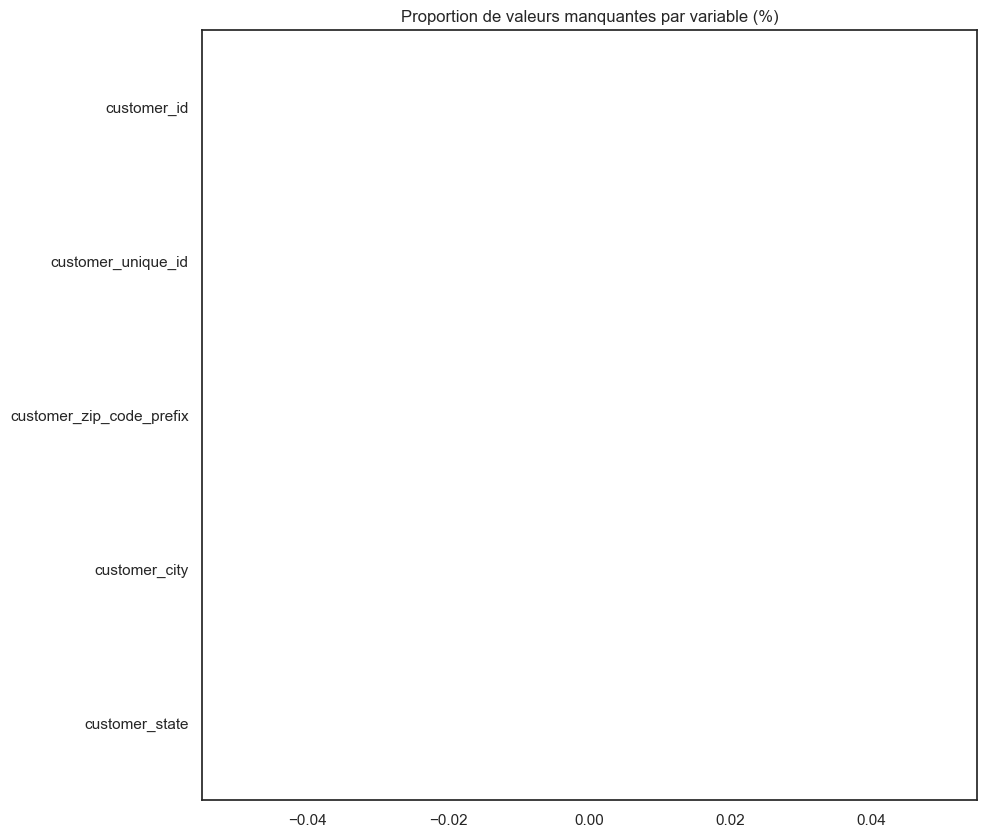

In [457]:
#Diagramme affichant la proportion de valeurs manquantes par variable
customers_nan = customers.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=customers_nan.values/customers.shape[0]*100, y=customers_nan.index)

Les variables importantes du dataset sont :

- customer_id : Clé dans le dataset des commandes
- customer_unique_id : Identifiant unique du client
- customer_state : Etat du client

La table des clients se compose de 99441 lignes et 5 colonnes sans doublons ni valeurs nulles.

Il est cependant observé qu'il y a une incompatibilité de type de données sur la colonne customer_zip_code_prefix. Il doit être stocké sous forme de chaîne et non d'entier car il contient les codes postaux uniques par ville.

Le code postal du client peut également être fusionné avec le code postal de géolocalisation pour extraire les valeurs de longitude et de latitude. 

Ceux-ci peuvent être utilisés pour créer une colonne de coordonnées pour calculer la distance entre les emplacements.

In [458]:
# Variables uniques par colonne
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Il y a des utilisateurs qui des customers id en double.

In [459]:
#Convert customer_zip_code_prefix column to string
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
customers.rename(columns = {"customer_zip_code_prefix" : "customer_zipcode"}, inplace=True)
#Confirm the data type and column name change
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_zipcode    99441 non-null  object
 3   customer_city       99441 non-null  object
 4   customer_state      99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [460]:
#Description des données 
customers.describe().T

,count,unique,top,freq
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17
customer_zipcode,99441,14994,22790,142
customer_city,99441,4119,sao paulo,15540
customer_state,99441,27,SP,41746


On a accès aux valeurs tops : client id , zipcode, cité : Sao Paolo, et state : SP. 

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


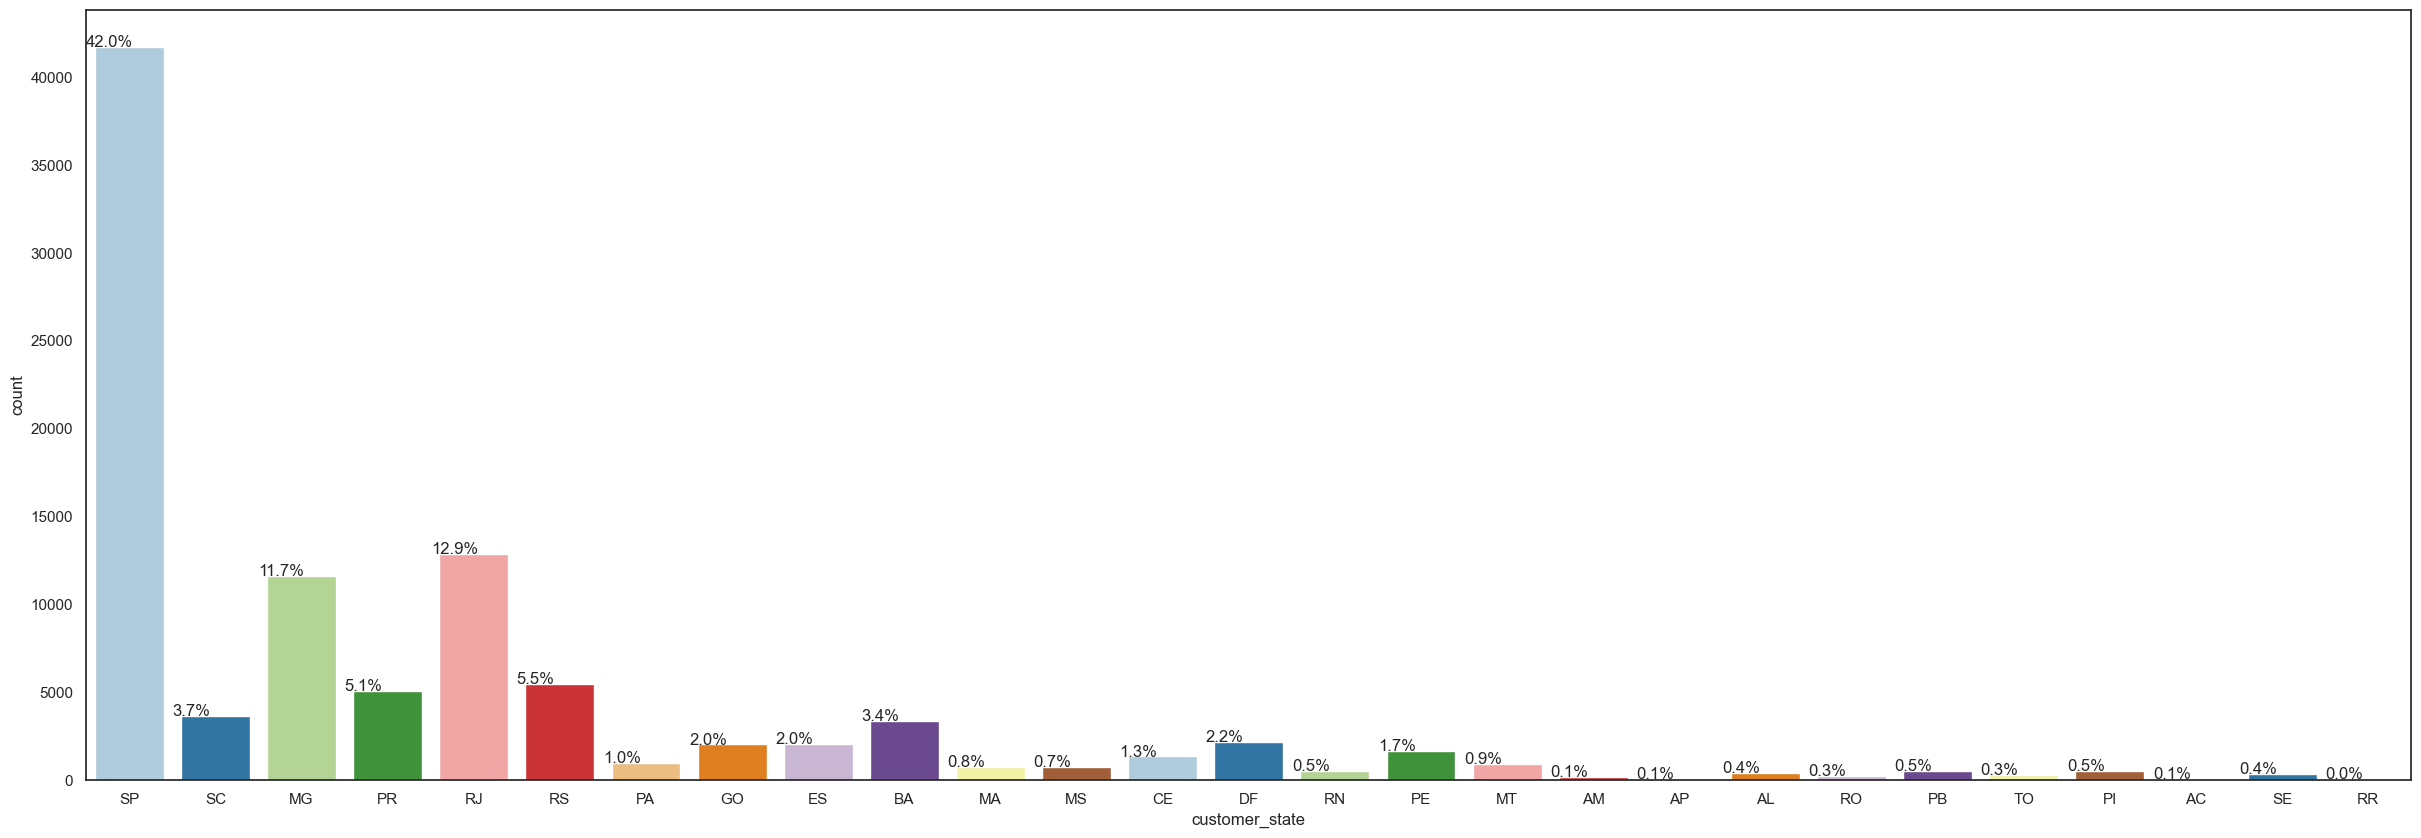

In [461]:
bar_perc(customers, 'customer_state',30,10)

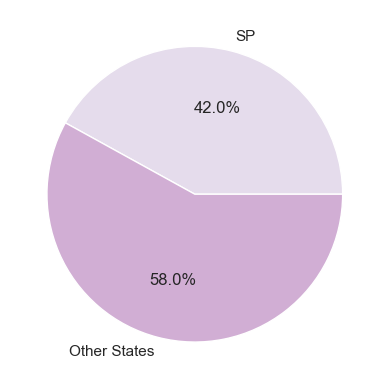

In [462]:
# plot des différents types de consommateurs

prop = customers["customer_state"].value_counts()["SP"]/len(customers)
y = [prop, 1 - prop]
plt.pie(y, labels=["SP", "Other States"], autopct='%1.1f%%')
plt.show()

42% des consommateurs sont de SP. 

<font color="#337da4"><h4>2.2 Données sur les vendeurs</h4><a class="anchor" id="section_2.2"></a></font>

In [463]:
vendeurs_fichier=pd.read_csv('olist_sellers_dataset.csv')
sellers=vendeurs_fichier.copy()

In [464]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [465]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [466]:
tableau_resume(sellers,"Vendeurs","seller_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Vendeurs,3095,4,100.0%,0


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

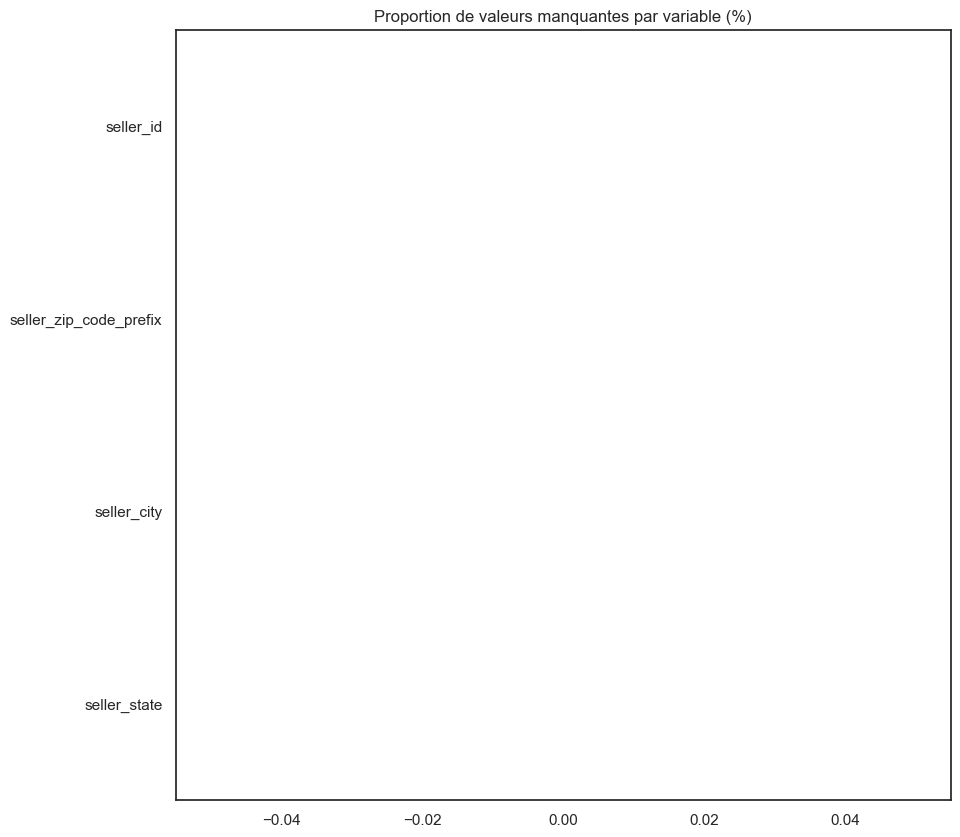

In [467]:
#Diagramme affichant la proportion de valeurs manquantes par variable
sellers_nan = sellers.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=sellers_nan.values/sellers.shape[0]*100, y=sellers_nan.index)

In [468]:
# Variables uniques par colonne
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [469]:
#Description des données 
sellers.describe().T

,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0


C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


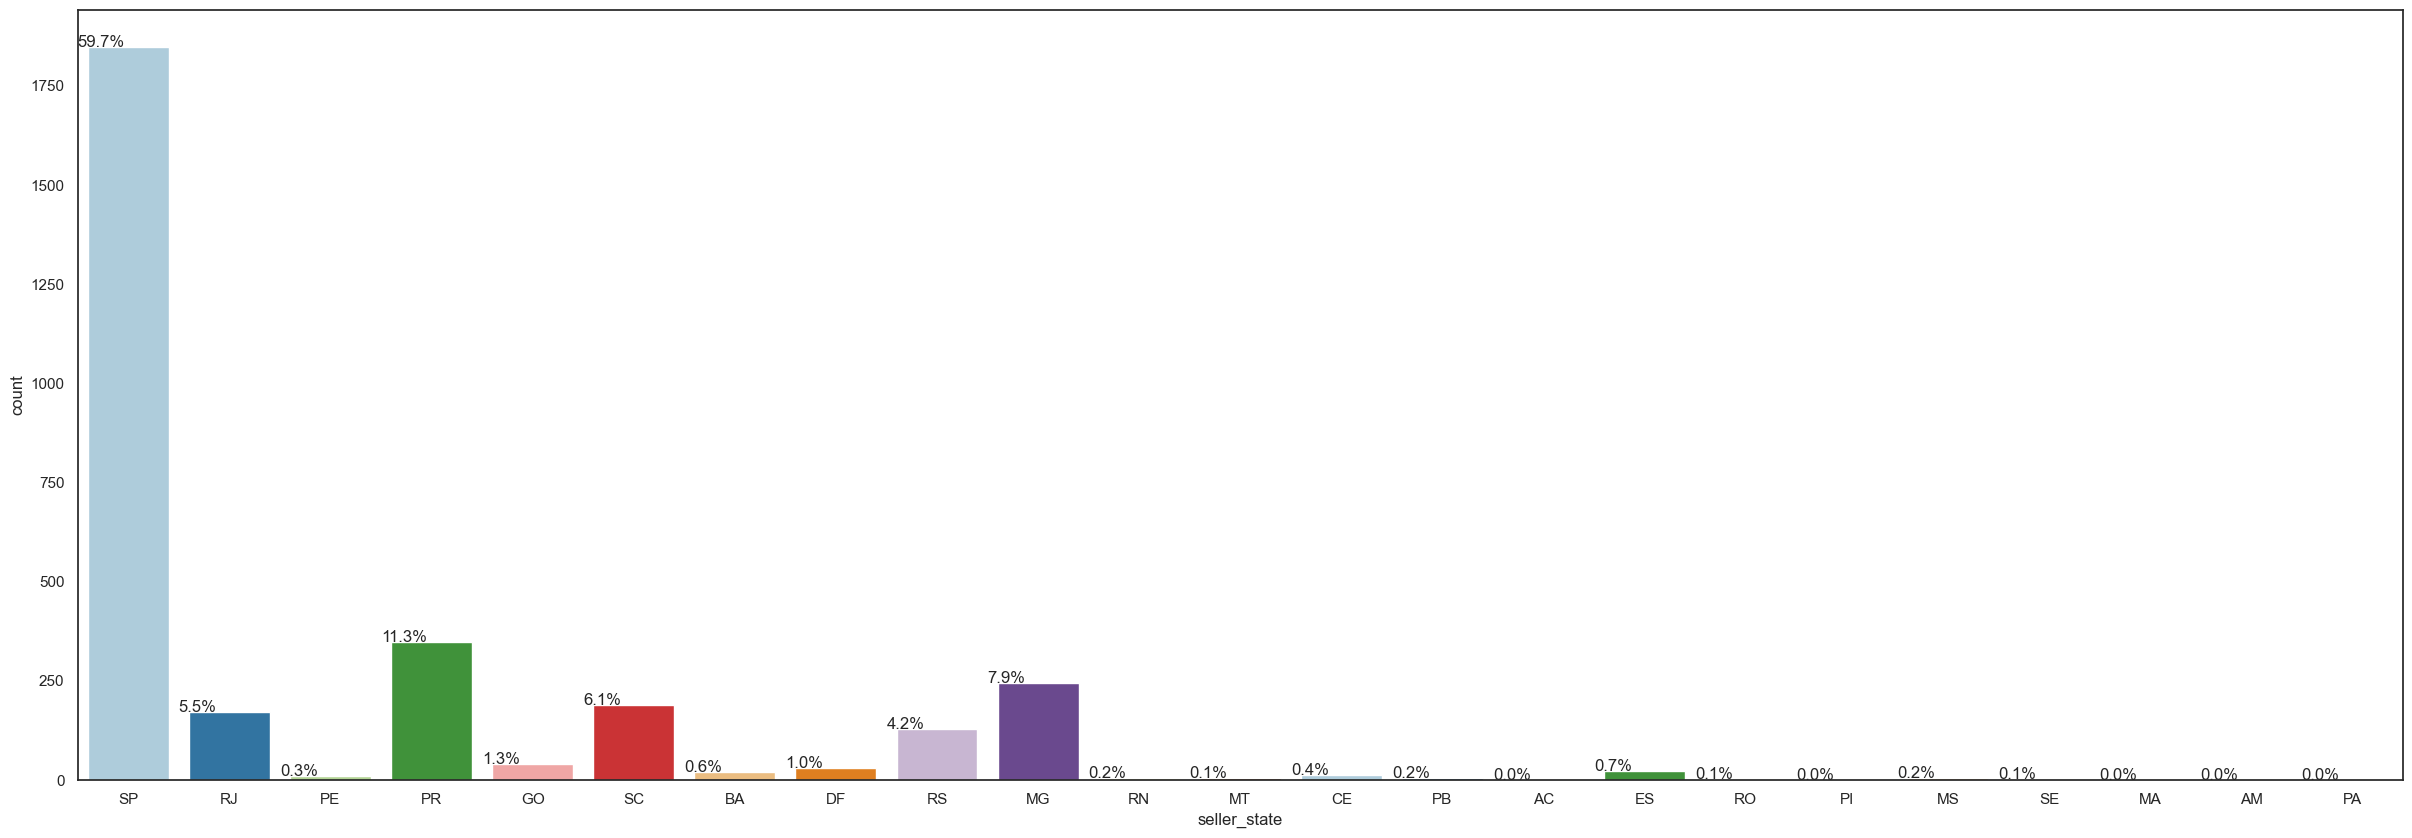

In [470]:
bar_perc(sellers, 'seller_state',30,10)

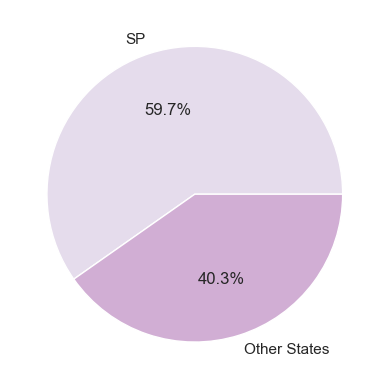

In [471]:
# plot des différents types de vendeurs

prop = sellers["seller_state"].value_counts()["SP"]/len(sellers)
y = [prop, 1 - prop]
plt.pie(y, labels=["SP", "Other States"], autopct='%1.1f%%')
plt.show()

- 59.7% des vendeurs sont de SP
- Le tableau des vendeurs contient 3095 lignes et 4 colonnes.
- Il ne contient aucune valeur en double ou nulle.
- Le type de données du seller_zip_code_prefix est un entier au lieu d'une chaîne de caractères.
- Le code postal du vendeur peut être fusionné avec le code postal de géolocalisation pour extraire les valeurs de longitude et de latitude. Ceux-ci peuvent être utilisés pour créer une colonne de coordonnées pour calculer la distance entre les emplacements. 

In [472]:
#Conversion zip code column à  string 
sellers["seller_zip_code_prefix"] = sellers["seller_zip_code_prefix"].astype('str')

#Enlever le préfixe de xip_code
sellers.rename(columns = {"seller_zip_code_prefix" : "seller_zipcode"}, inplace=True)

#Confirmation de la mise à jour
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seller_id       3095 non-null   object
 1   seller_zipcode  3095 non-null   object
 2   seller_city     3095 non-null   object
 3   seller_state    3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


<font color="#337da4"><h4>2.3 Données de géolocalisation</h4><a class="anchor" id="section_2.3"></a></font>

Ce jeu de données contient des informations sur les zip codes et les coordonées. Il sera utilisé pour calculer la distance entre les acheteurs et les vendeurs. 

In [473]:
geolocalisation_fichier=pd.read_csv('olist_geolocation_dataset.csv')
localisation=geolocalisation_fichier.copy()

In [474]:
localisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [475]:
localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [476]:
tableau_resume(localisation,"Géolocalisation","geolocation_lat")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Géolocalisation,1000163,5,100.0%,282803


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

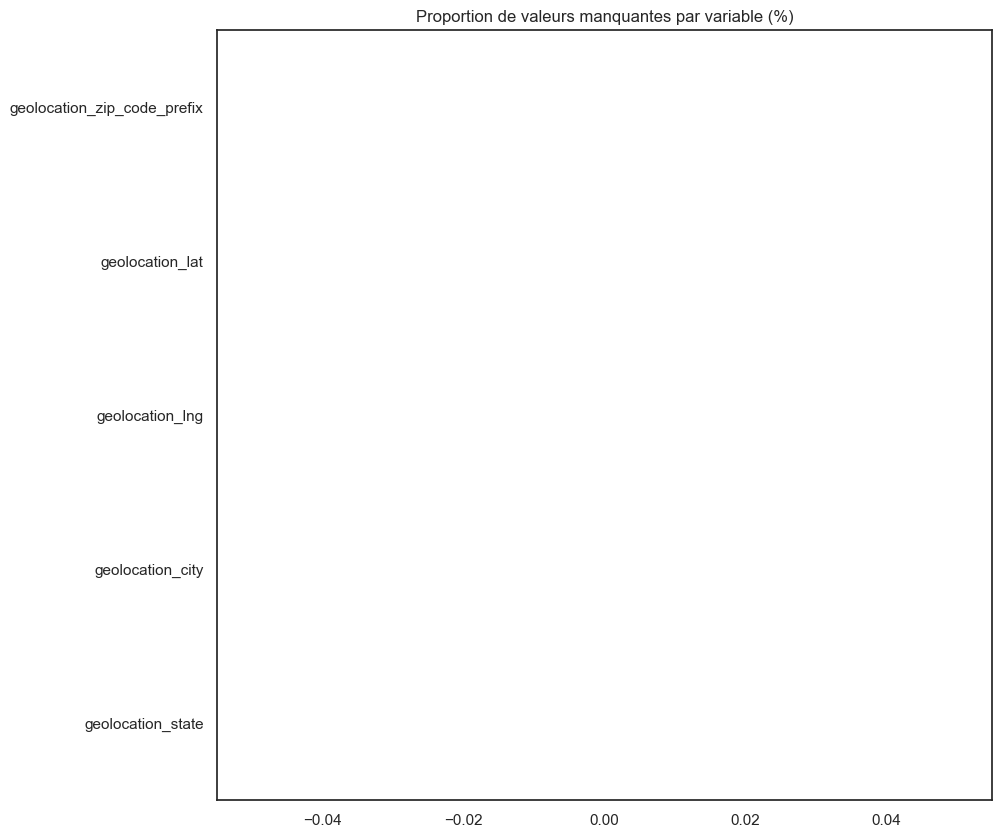

In [477]:
#Diagramme affichant la proportion de valeurs manquantes par variable
localisation_nan = localisation.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=localisation_nan.values/localisation.shape[0]*100, y=localisation_nan.index)

Le fichier compte plus d'un million de lignes et pas de valeurs nulles. Ce fichier est lié au fichier clients grâce à la clé geolocation_zip_code_prefix. Regardons la description du fichier pour avoir un aperçu des étendues de Latitudes et Longitudes :

In [478]:
#Description des données 
localisation.describe().T

,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394


In [479]:
# Variables uniques par colonne
localisation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


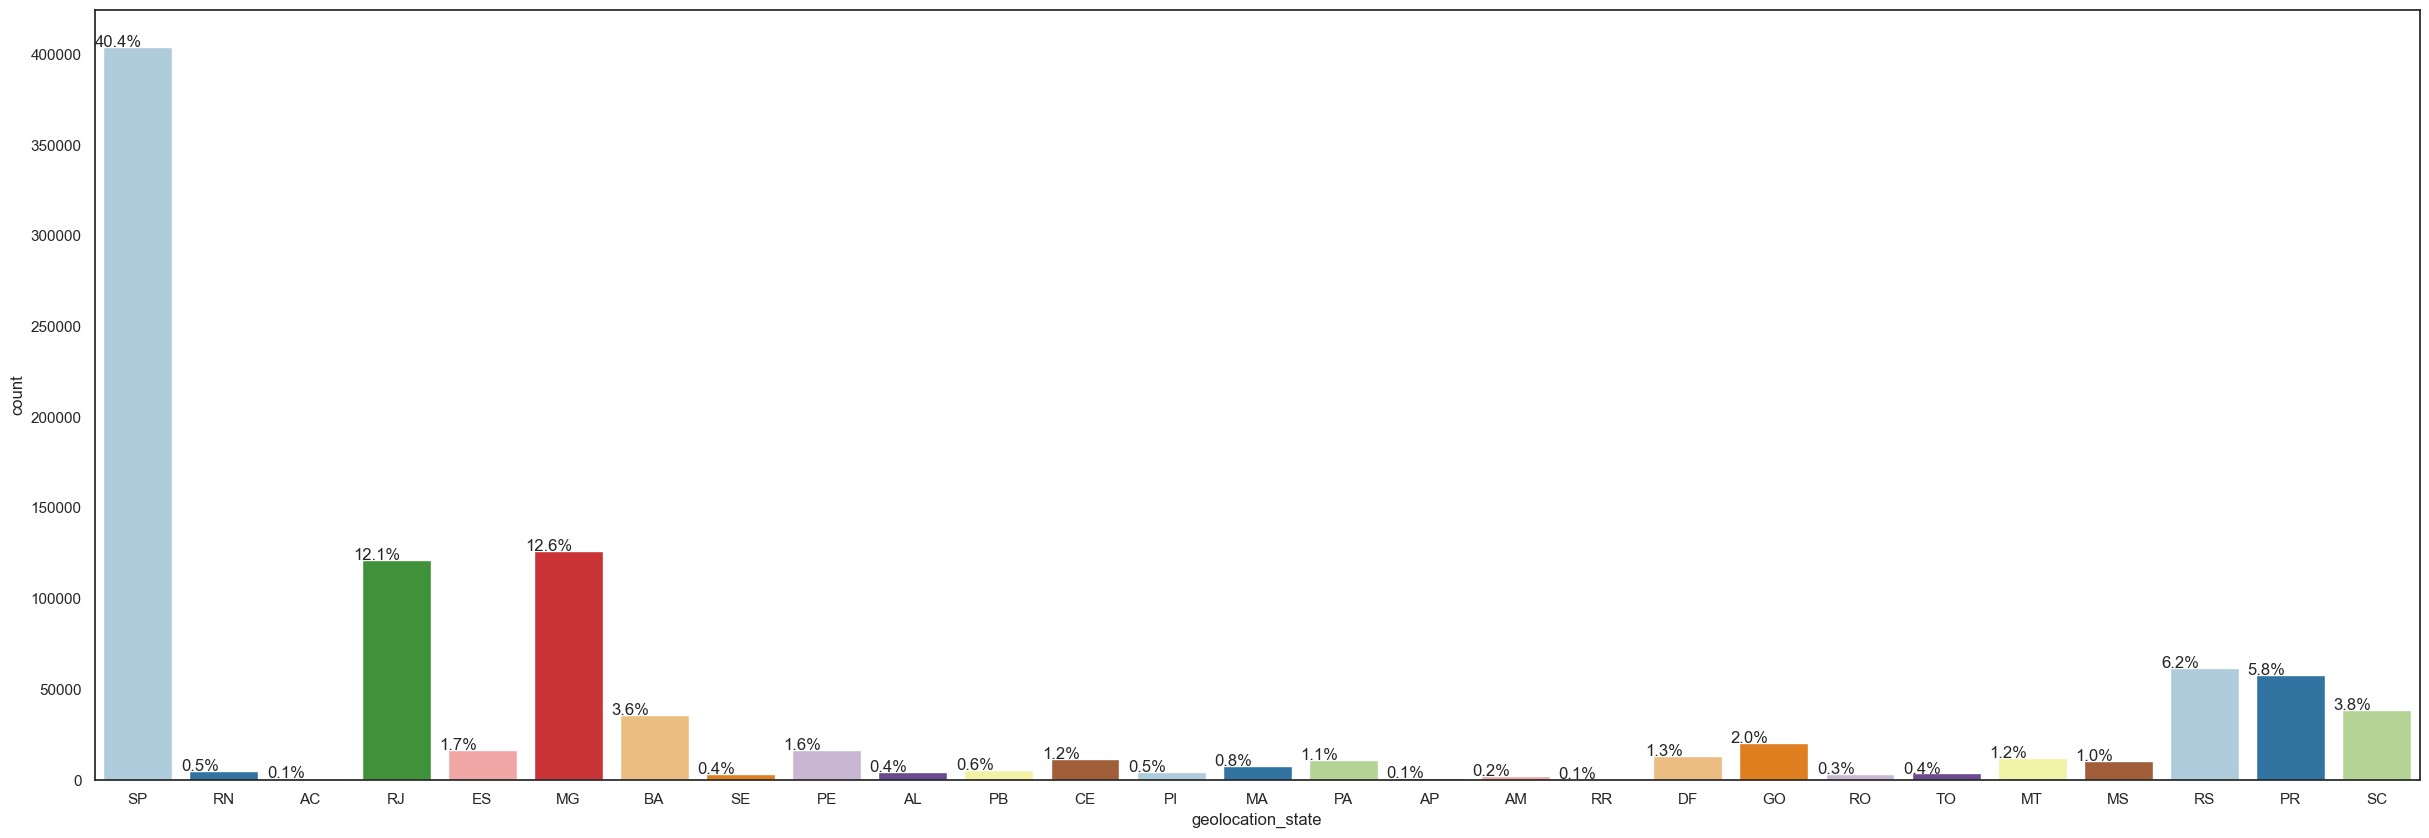

In [480]:
bar_perc(localisation, 'geolocation_state',30,10)

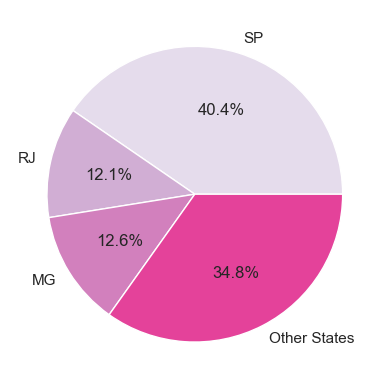

In [481]:
# plot des différents types de batîments

sp = localisation["geolocation_state"].value_counts()["SP"]/len(localisation)
rj = localisation["geolocation_state"].value_counts()["RJ"]/len(localisation)
mg = localisation["geolocation_state"].value_counts()["MG"]/len(localisation)
prop=sp+mg+rj
y = [sp,rj,mg, 1 - prop]
plt.pie(y, labels=["SP", "RJ","MG","Other States"], autopct='%1.1f%%')
plt.show()

- Le geolocation_zip_code_prefix est de type integer. On peut le convertir en 'str'.

In [482]:
#Conversion de la  geolocation_zip_code_prefix en str
localisation["geolocation_zip_code_prefix"] =  localisation["geolocation_zip_code_prefix"].astype('str')

#Renommer la colonne geolocation_zip_code_prefix
localisation.rename(columns={"geolocation_zip_code_prefix":"geolocation_zipcode"}, inplace=True)

#Confirmation de la mise à jour
localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   geolocation_zipcode  1000163 non-null  object 
 1   geolocation_lat      1000163 non-null  float64
 2   geolocation_lng      1000163 non-null  float64
 3   geolocation_city     1000163 non-null  object 
 4   geolocation_state    1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


### Fusion des fichier géolocation et sellers

In [483]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seller_id       3095 non-null   object
 1   seller_zipcode  3095 non-null   object
 2   seller_city     3095 non-null   object
 3   seller_state    3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [484]:
sellers['seller_zipcode'].nunique()

2246

In [485]:
localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   geolocation_zipcode  1000163 non-null  object 
 1   geolocation_lat      1000163 non-null  float64
 2   geolocation_lng      1000163 non-null  float64
 3   geolocation_city     1000163 non-null  object 
 4   geolocation_state    1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [486]:
localisation.head()

,geolocation_zipcode,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [487]:
localisation_final=localisation.copy()

In [488]:
localisation_final=localisation_final.groupby('geolocation_zipcode', as_index=False).mean()
localisation_final

,geolocation_zipcode,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [489]:
#Fusion de sellers et localisation
sellers_geo = sellers.merge(localisation_final, left_on=['seller_zipcode'], right_on = ['geolocation_zipcode'])

#Création d'une colonne de coordonnées avec la latitude et la longitude
sellers_geo["seller_coor"] = list(zip(sellers_geo["geolocation_lat"], sellers_geo["geolocation_lng"]))
sellers_geo.head()

,seller_id,seller_zipcode,seller_city,seller_state,geolocation_zipcode,geolocation_lat,geolocation_lng,seller_coor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.893848,-47.061337,"(-22.89384803253408, -47.06133702244195)"
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,13023,-22.893848,-47.061337,"(-22.89384803253408, -47.06133702244195)"
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,-22.383437,-46.947927,"(-22.38343651404282, -46.947926542619655)"
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,-22.909572,-43.177703,"(-22.909572437655488, -43.177703112986904)"
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,20031,-22.909572,-43.177703,"(-22.909572437655488, -43.177703112986904)"


In [490]:
sellers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3087
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seller_id            3088 non-null   object 
 1   seller_zipcode       3088 non-null   object 
 2   seller_city          3088 non-null   object 
 3   seller_state         3088 non-null   object 
 4   geolocation_zipcode  3088 non-null   object 
 5   geolocation_lat      3088 non-null   float64
 6   geolocation_lng      3088 non-null   float64
 7   seller_coor          3088 non-null   object 
dtypes: float64(2), object(6)
memory usage: 217.1+ KB


In [491]:
# Enlever les colonnes non utilisées
sellers_geo.drop(columns=["geolocation_zipcode","seller_coor"], inplace=True)
sellers_geo.head()

,seller_id,seller_zipcode,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.893848,-47.061337
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,-22.909572,-43.177703


In [492]:
#Confirmation de la mise à jour
sellers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3087
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seller_id        3088 non-null   object 
 1   seller_zipcode   3088 non-null   object 
 2   seller_city      3088 non-null   object 
 3   seller_state     3088 non-null   object 
 4   geolocation_lat  3088 non-null   float64
 5   geolocation_lng  3088 non-null   float64
dtypes: float64(2), object(4)
memory usage: 168.9+ KB


La trame de données géographiques des vendeurs est propre et contient maintenant les points de coordonnées pour les emplacements des vendeurs.

### Fusion des fichiers des consommateurs et de la localisation

In [493]:
#Fusion des fichiers customers et de la localisation
cus_geo = customers.merge(localisation_final, left_on=['customer_zipcode'], right_on = ['geolocation_zipcode'])

#Creation de la colonne des coordonnées pour avoir la latitude et la longitude
cus_geo["customer_coor"] = list(zip(cus_geo["geolocation_lat"], cus_geo["geolocation_lng"]))
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,geolocation_zipcode,geolocation_lat,geolocation_lng,customer_coor
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.498489,-47.396929,"(-20.498488755380297, -47.396929485900976)"


In [494]:
cus_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          99163 non-null  object 
 1   customer_unique_id   99163 non-null  object 
 2   customer_zipcode     99163 non-null  object 
 3   customer_city        99163 non-null  object 
 4   customer_state       99163 non-null  object 
 5   geolocation_zipcode  99163 non-null  object 
 6   geolocation_lat      99163 non-null  float64
 7   geolocation_lng      99163 non-null  float64
 8   customer_coor        99163 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


In [495]:
# Effacer les colonnes non utilisées
cus_geo.drop(columns=["geolocation_zipcode","customer_coor"], inplace=True)
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.498489,-47.396929
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.498489,-47.396929
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.498489,-47.396929
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.498489,-47.396929


L'ensemble de données géographiques du client est maintenant propre et complet avec les coordonnées du client.

<font color="#337da4"><h4>2.4 Données sur les commandes</h4><a class="anchor" id="section_2.4"></a></font>

Fichier général contenant des informations sur les commandes.

In [496]:
commandes_fichier=pd.read_csv('olist_orders_dataset.csv')
orders=commandes_fichier.copy()

In [497]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [498]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [499]:
tableau_resume(orders,"Commandes","order_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Commandes,99441,8,99.4%,0


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

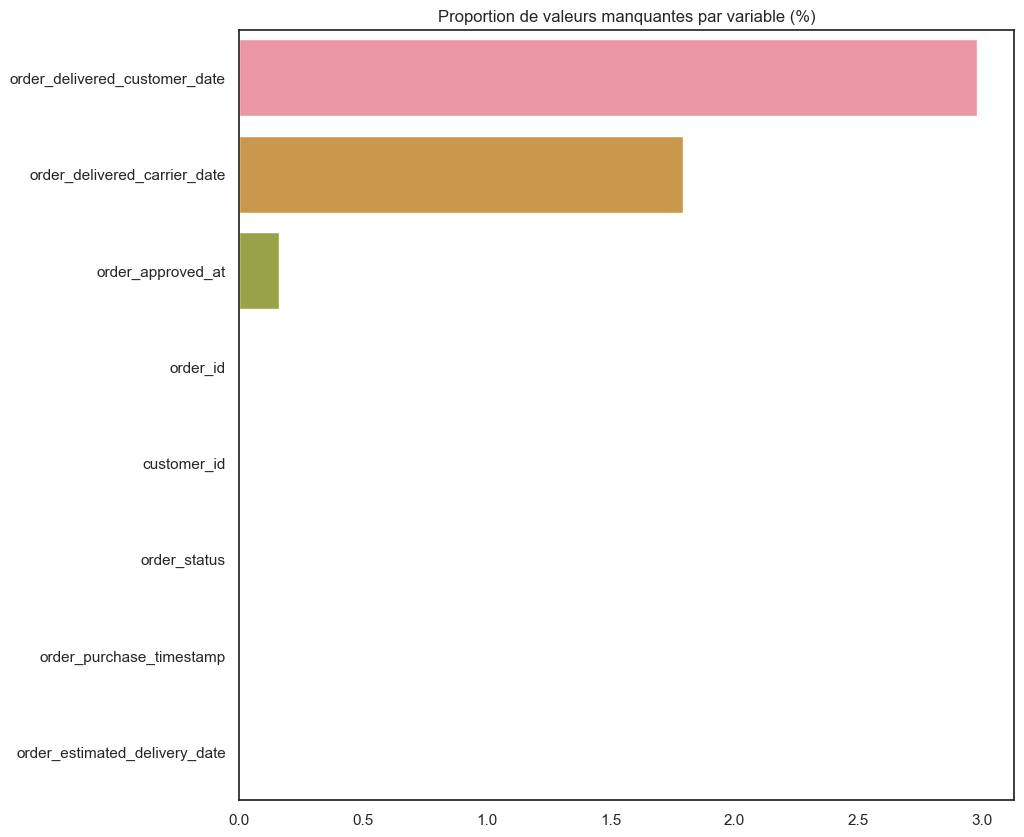

In [500]:
#Diagramme affichant la proportion de valeurs manquantes par variable
orders_nan = orders.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=orders_nan.values/orders.shape[0]*100, y=orders_nan.index)

In [501]:
#Application de la formule une première fois
missing(orders)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
order_delivered_customer_date,2.98,2965
order_delivered_carrier_date,1.79,1783
order_approved_at,0.16,160
order_id,0.00,0
customer_id,0.00,0
order_status,0.00,0
order_purchase_timestamp,0.00,0
order_estimated_delivery_date,0.00,0


Il y a des informations manquantes sur la date de livraison de certaines commandes. 

In [502]:
# Variables uniques par colonne
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [503]:
#Description des données 
orders.describe().T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


On a un aperçu sur les dates où il y a eu le plus d'achats. 

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


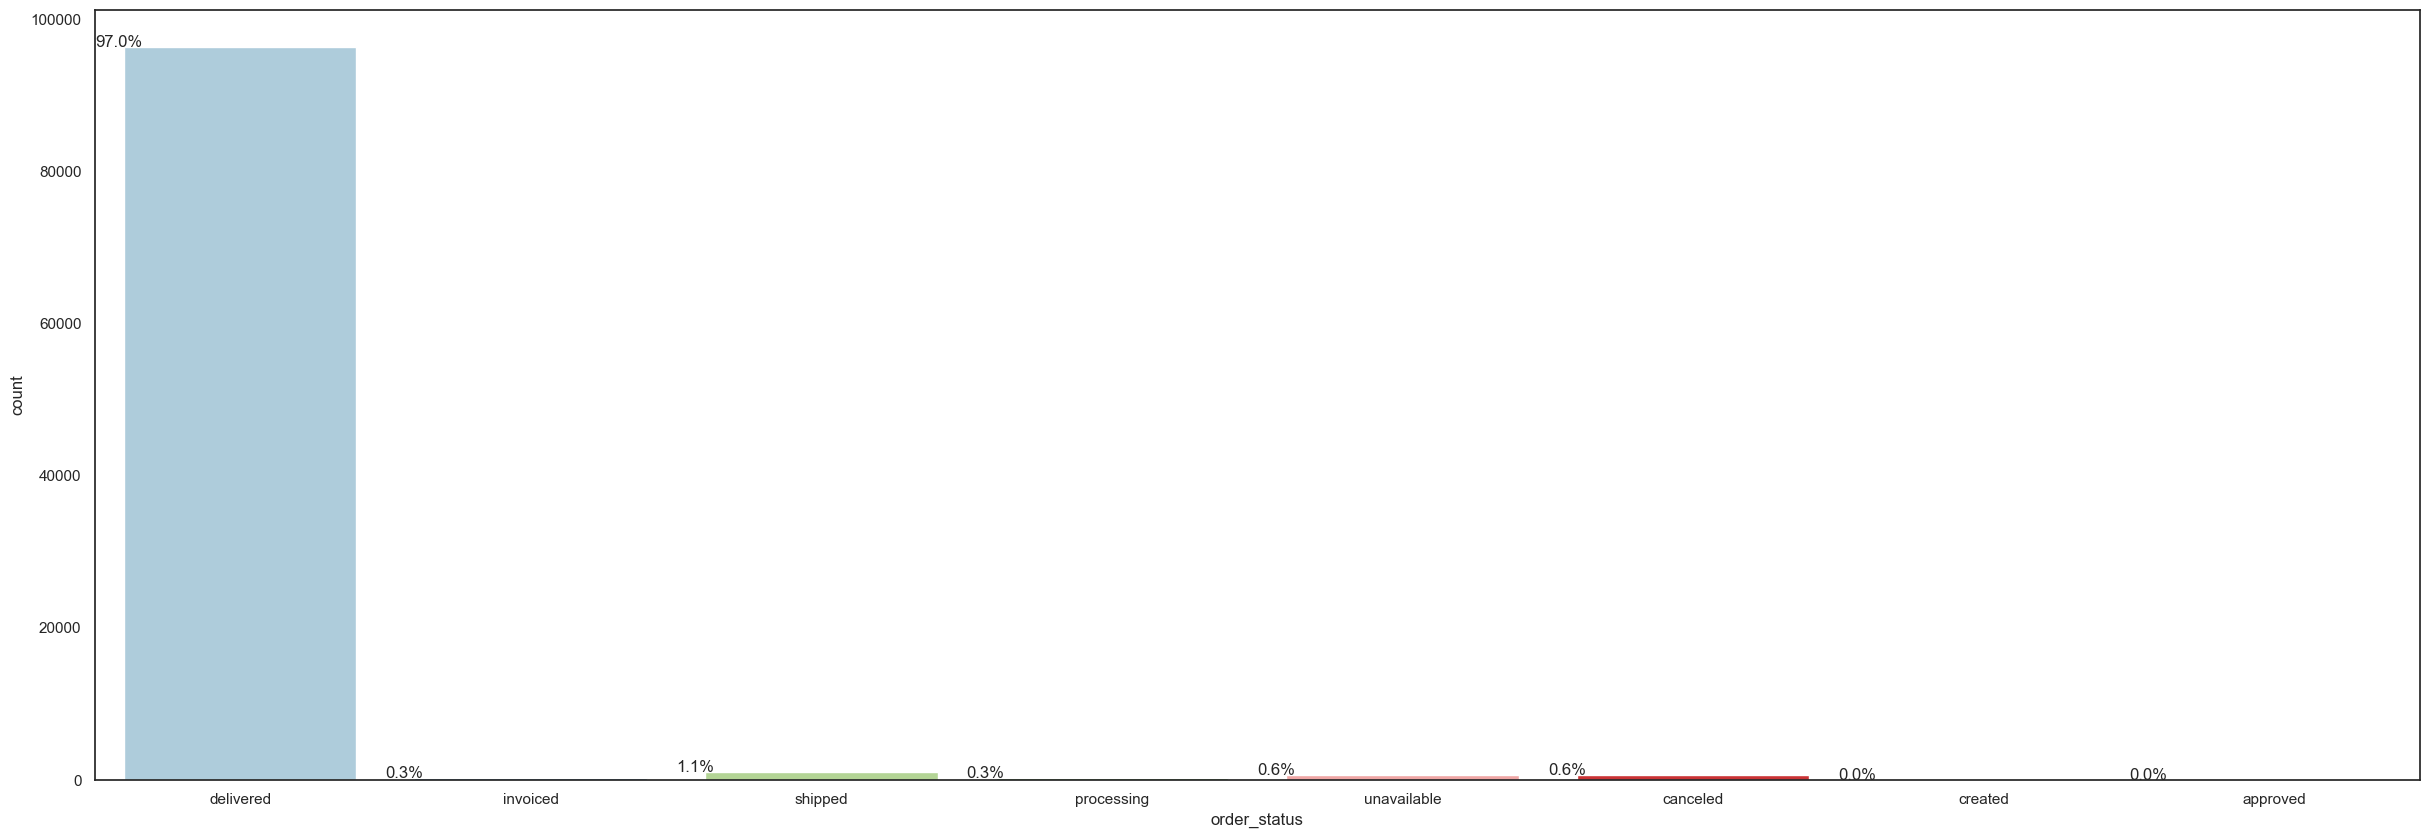

In [504]:
bar_perc(orders, 'order_status',30,10)

- Les commandes contiennent les détails du timestamp, du customer_id, du order_id et du order_status sur chaque commande effectuée.
- Il se compose de 94441 lignes et 8 colonnes sans doublons.
- Les colonnes de timestamp sont de type de données de chaîne d'objet au lieu de datetime.
- Certaines colonnes datetime contiennent des valeurs nulles.
- 97% des commandes ont été livrées. 

In [505]:
# Mise à jour de timestamp avec le datetype
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [506]:
#Confirmation du changement de datatype pour les colonnes timestamp
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Toutes les colonnes de timestamp ont maintenant été converties en date/heure.

In [507]:
#Revoir les lignes avec pas de dates acceptées
unapproved = orders[orders['order_approved_at'].isna()]
unapproved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [508]:
#Confirmation du statut de commandes des commandes sans date acceptées
unapproved.order_status.value_counts().reset_index()

,index,order_status
0,canceled,141
1,delivered,14
2,created,5


In [509]:
#Top 5 des commandes non approuvées
unapproved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


Pour les commandes sans date d'approbation, on observe que leur statut a été annulé, créé ou livré. Un grand nombre de ces commandes ont cependant été annulées ou simplement créées.


Pour les commandes livrées sans date d'approbation, on constate que :
- Le transporteur (enlèvement) et les dates de livraison ont été enregistrés.
- Ces commandes ont en fait été livrées avant la date de livraison estimée.
- L'absence de dates approuvées pour ces commandes peut être due à une erreur dans le processus de saisie des données.
- La date d'approbation des commandes livrées peut être temporairement fixée en supposant que les commandes ont été automatiquement approuvées au moment de l'achat.

In [510]:
#Extraction des commandes non acceptées mais livrées
unapproved_delivered = ((orders['order_approved_at'].isna()) & (orders['order_status'] == 'delivered'))

#Update approval time for delivered orders to purchase time.
orders.loc[unapproved_delivered, "order_approved_at"]= orders.loc[unapproved_delivered, "order_purchase_timestamp"]
orders.loc[unapproved_delivered,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [511]:
#Review rows with no carrier dates
non_carrier = orders[orders['order_delivered_carrier_date'].isna()]
non_carrier.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


In [512]:
#Confirming the order status of orders without carrier dates
non_carrier.order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

In [513]:
#Confirm delivery status of rows withou carrier dates
non_carrier.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


Pour les commandes sans dates de transporteur (enlèvement), il est observé que ;
- Le statut de la commande était indisponible, annulé, facturé, en cours de traitement, créé, approuvé ou livré.
- Un grand nombre de ces commandes étaient cependant indisponibles ou annulées.
Pour les commandes livrées sans dates de transporteur, il est constaté que ;
- Une seule commande a été livrée. Il a cependant été livré après la date de livraison estimée.
- La deuxième commande enregistrée comme livrée n'avait pas de date de livraison.
- La date du transporteur pour les commandes livrées peut également être temporairement fixée en l'assimilant au délai d'approbation de l'achat.

In [514]:
#Extract delivered orders without carrier dates
delivered_noncarrier = (orders['order_delivered_carrier_date'].isna()) & (orders['order_status'] == 'delivered')

#Update carrier time for delivered orders to purchase time
orders.loc[delivered_noncarrier, "order_delivered_carrier_date"] = orders.loc[delivered_noncarrier, "order_purchase_timestamp"]
orders.loc[delivered_noncarrier, :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-09-29 08:52:58,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23


In [515]:
##Review rows with no delivery dates
undelivered = orders[orders['order_delivered_customer_date'].isna()]
undelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [516]:
#Confirming the order status of orders without delivery dates
undelivered.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [517]:
undelivered.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


Pour les commandes sans date de livraison, il est observé que leur statut est enregistré comme expédié, traité, annulé, approuvé, créé et livré. Un grand nombre de ces commandes étaient cependant en cours d'expédition, facturées, traitées, annulées ou indisponibles. Pour les commandes livrées sans date de livraison, les dates peuvent être provisoirement imputées en ajoutant la durée moyenne de livraison au délai de livraison de ces commandes.

In [518]:
#Compute delivery time
avg_delivery_time= (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).mean()
avg_delivery_time

Timedelta('9 days 07:56:37.872558978')

In [519]:
#Extract delivered orders without delivery dates
delivered_nodelivery_date = (orders["order_delivered_customer_date"].isna() & (orders["order_status"] == 'delivered'))

In [520]:
#Replace non_delivery dates with a sum of the carrier date and the average delivery time
orders.loc[delivered_nodelivery_date,"order_delivered_customer_date"] = orders.loc[delivered_nodelivery_date,"order_delivered_carrier_date"] + avg_delivery_time
orders.loc[delivered_nodelivery_date,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:09:00.872558978,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:37.872558978,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:37.872558978,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,2017-06-04 07:19:20.872558978,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:37.872558978,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:37.872558978,2018-07-19


In [521]:
# Compute delivery duration in days and hours for all orders
import datetime as dt
orders["delivery_duration"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"])
orders["delivery_hours"] = orders["delivery_duration"]/ dt.timedelta(hours=1)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778


In [522]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99295 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97660 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96484 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   delivery_duration              96484 non-null  timedelta64[ns]
 9   delivery_hours                 96484 non-null  float64        
dtypes: datetime64[ns](5), float64(1), object(3), timedelta64[ns](1)
memory

In [523]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
delivery_duration                2957
delivery_hours                   2957
dtype: int64

Le traitement des valeurs manquantes s'effectuera par la suite. 

<font color="#337da4"><h4>2.5 Données sur les articles achetés</h4><a class="anchor" id="section_2.5"></a></font>



In [524]:
articles_fichier=pd.read_csv('olist_order_items_dataset.csv')
order_items=articles_fichier.copy()

In [525]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [526]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Variables importantes du dataset regroupant les lignes de commande :

- order_id : Identifiant unique de la commande
- order_item_id : Identifiant séquentiel des items d'une même commande (lignes de commande)
- product_id : Identifiant unique du produit
- seller_id : Identifiant unique du vendeur
- price : Prix de la ligne de commande
- freight_value : Coût de fret de la ligne (Si plusieurs lignes, le coût de fret est réparti entre toutes les lignes)

In [527]:
tableau_resume(order_items,"Articles achetés","order_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Articles achetés,112650,7,100.0%,13984


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

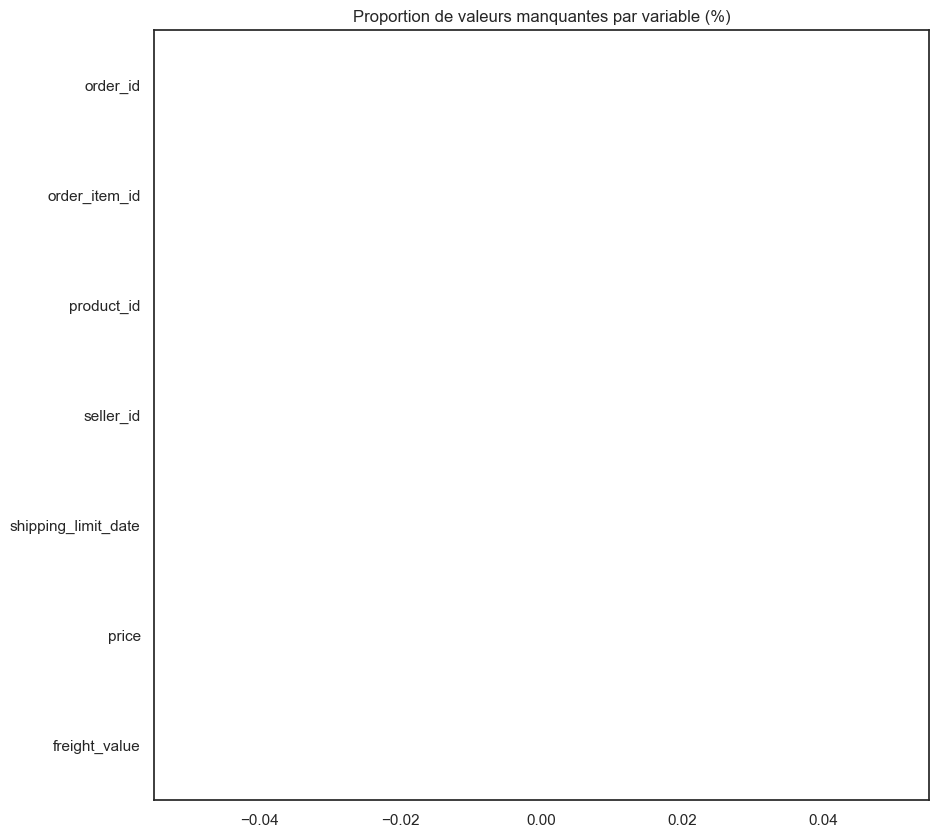

In [528]:
#Diagramme affichant la proportion de valeurs manquantes par variable
order_items_nan = order_items.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=order_items_nan.values/order_items.shape[0]*100, y=order_items_nan.index)

In [529]:
# Variables uniques par colonne
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [530]:
#Description des données 
order_items.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


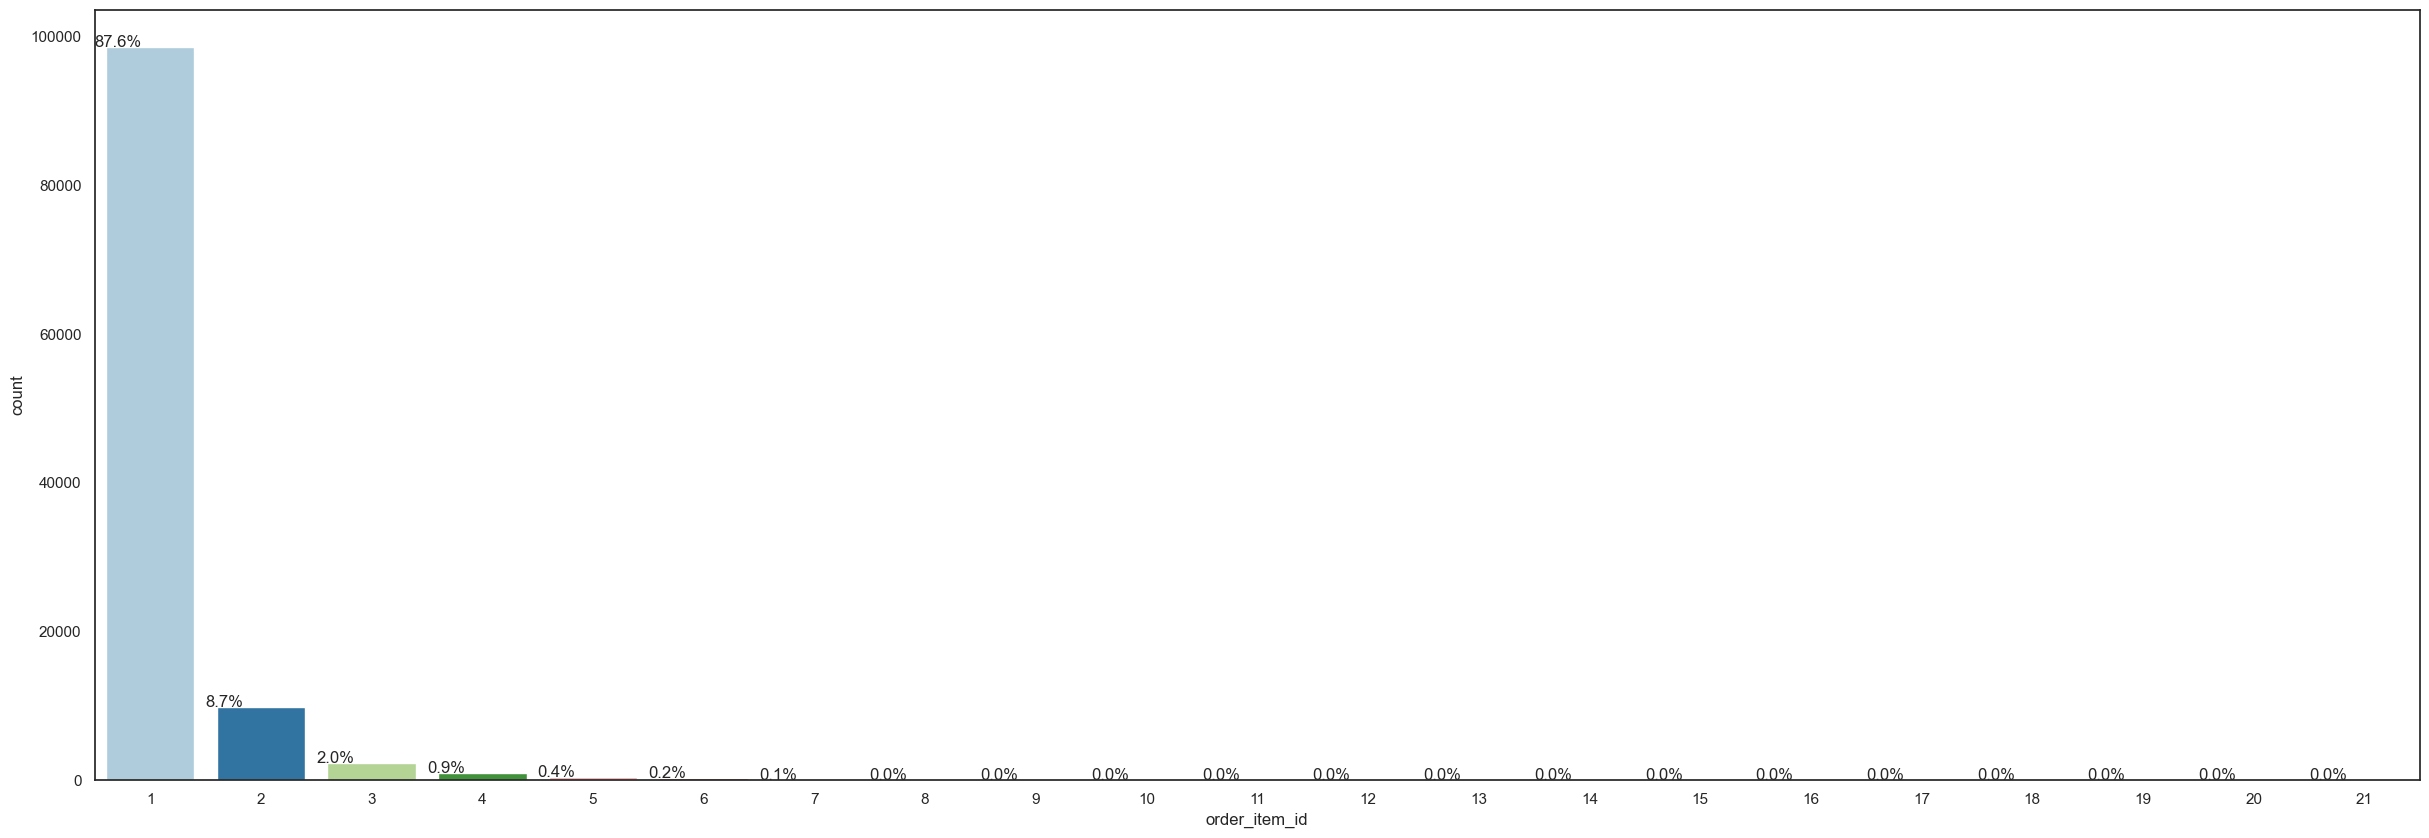

In [531]:
bar_perc(order_items, 'order_item_id',30,10)

- 87,6% de commandes ont qu'un article. 
- La table order_items se compose de 112650 lignes et 7 colonnes sans valeurs nulles.
- Il est cependant observé qu'il existe une incompatibilité de type de données sur les colonnes shipping_limit_date et order_item_id.
- La colonne shipping limit_date doit être stockée en tant que colonne datetime
- La colonne order_item_id doit être stockée sous forme de chaîne et non d'entier, car elle contient l'identifiant unique par article de commande.

In [532]:
#Convert order_item_id to string object
order_items["order_item_id"] = order_items['order_item_id'].astype('str')
#Convert shipping_limit_date to datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
#Confirm the datatype change
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


<font color="#337da4"><h4>2.6 Données sur les produits</h4><a class="anchor" id="section_2.6"></a></font>

In [533]:
produits_fichier=pd.read_csv('olist_products_dataset.csv')
products=produits_fichier.copy()

In [534]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [535]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [536]:
tableau_resume(products,"Produits","product_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Produits,32951,9,99.2%,0


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

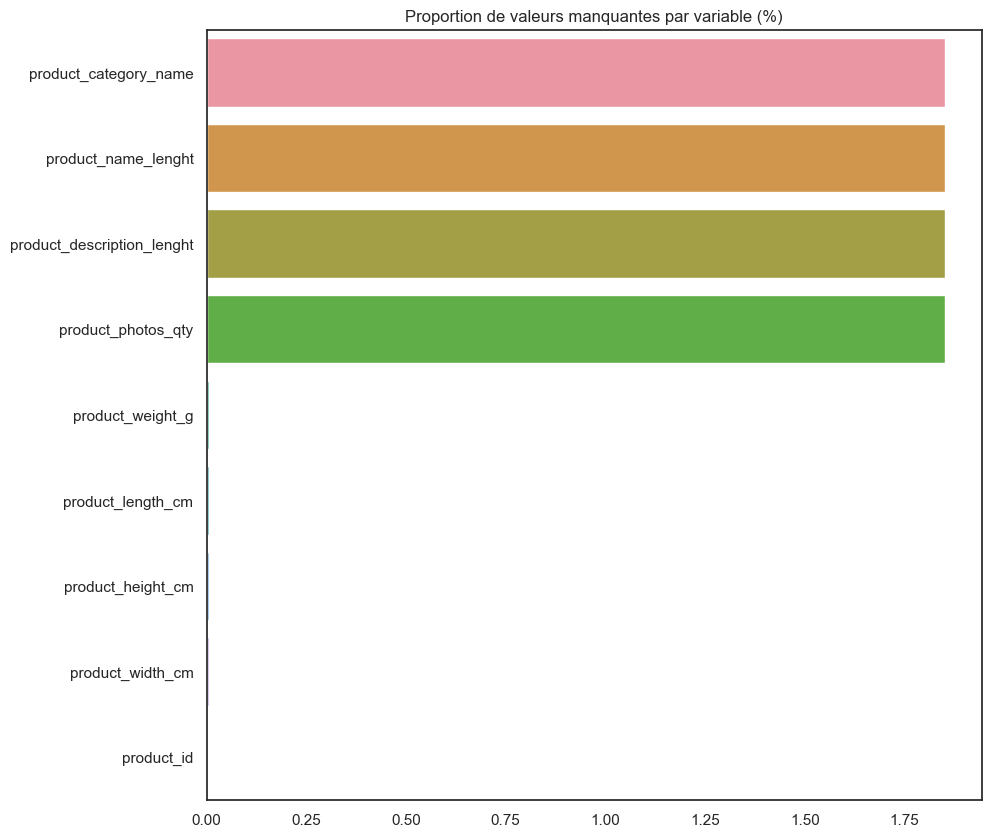

In [537]:
#Diagramme affichant la proportion de valeurs manquantes par variable
products_nan = products.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=products_nan.values/products.shape[0]*100, y=products_nan.index)

In [538]:
missing(products)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
product_category_name,1.85,610
product_name_lenght,1.85,610
product_description_lenght,1.85,610
product_photos_qty,1.85,610
product_weight_g,0.01,2
product_length_cm,0.01,2
product_height_cm,0.01,2
product_width_cm,0.01,2
product_id,0.00,0


Il y a des informations manquantes dans la catégorie de produit, la longueur du nom de produit, la decription et la photo du produit. On traitera également plus tard ces valeurs manquantes. 

In [539]:
# Variables uniques par colonne
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [540]:
#Description des données 
products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [541]:
products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


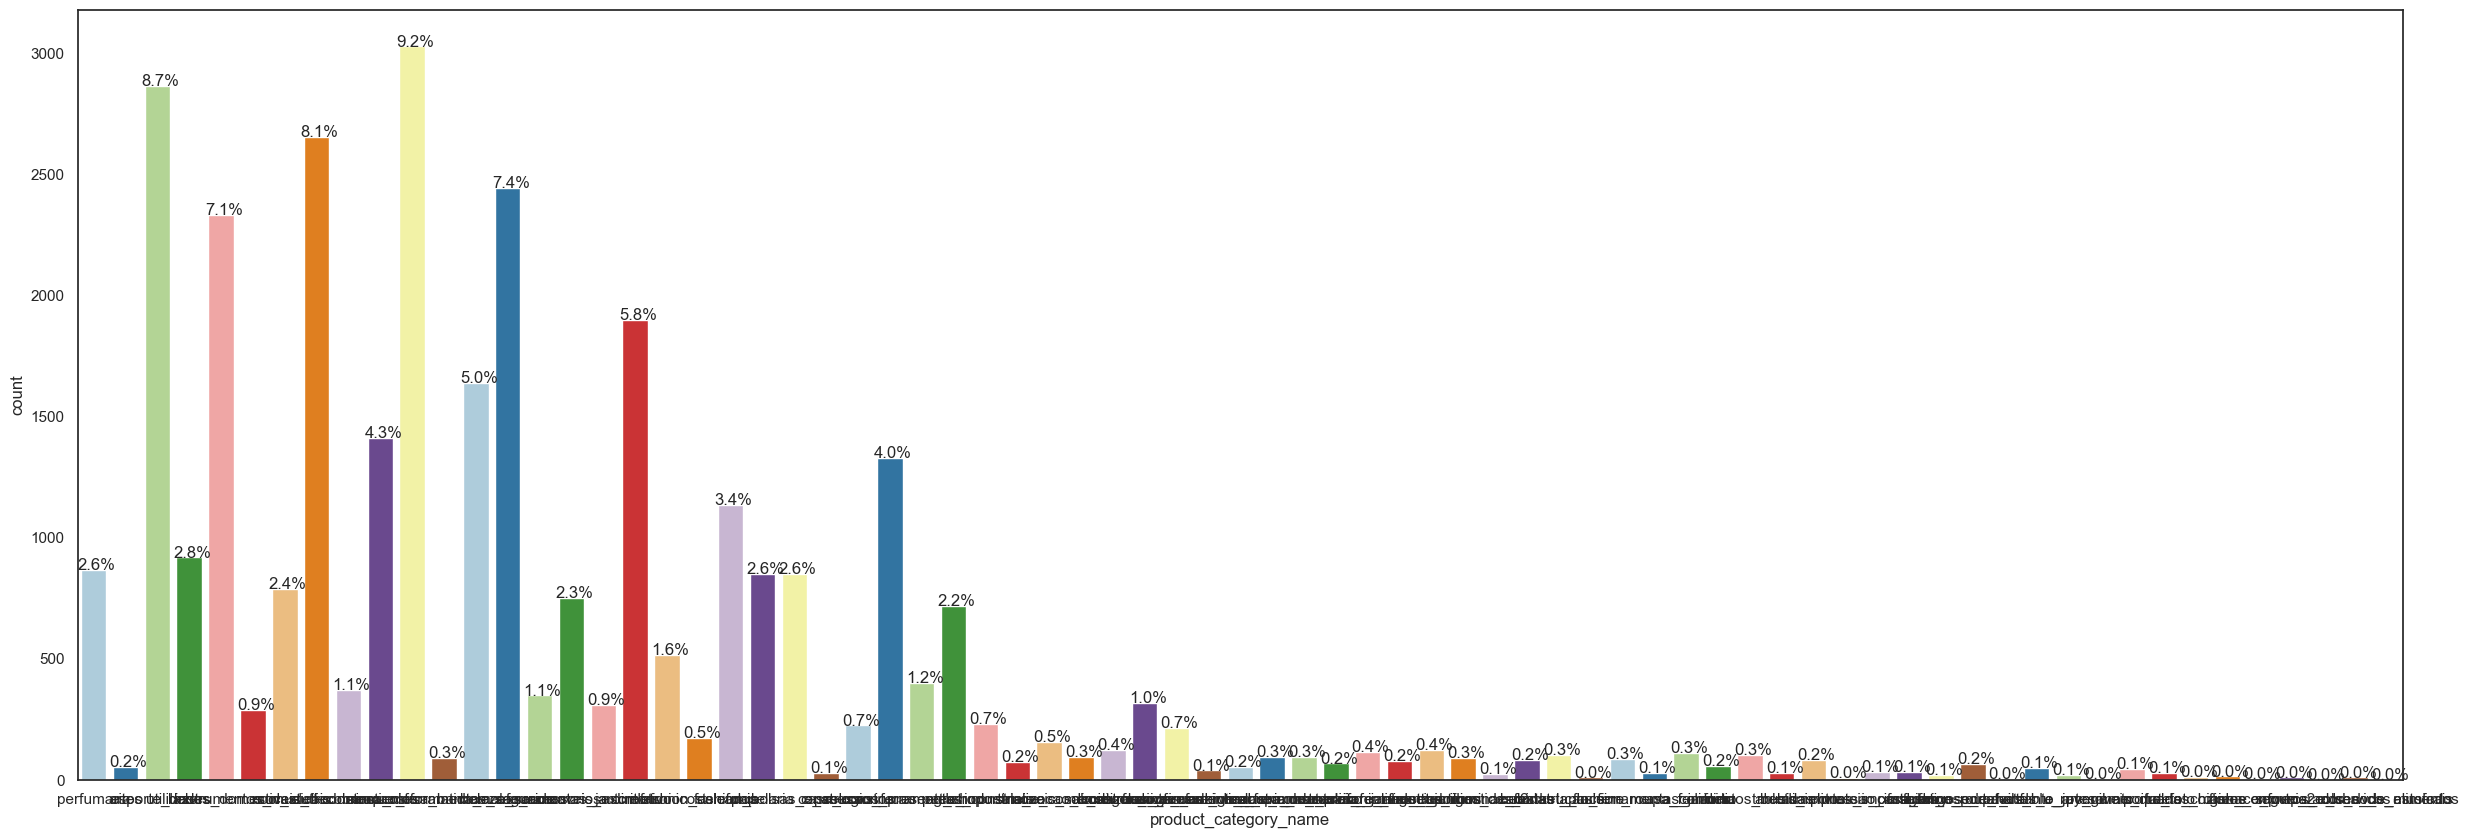

In [542]:
bar_perc(products, 'product_category_name',30,10)

- La colonne produit contient 32951 lignes et 9 colonnes dont 7 colonnes sont des objets flottants.
- Il y a des valeurs nulles dans les 8 colonnes en plus du product_id.
- Le product_name_lenght et le product_description_lenght sont mal orthographiés et seront renommés.

In [543]:
#Renaming the product_name_lenght and product_description_lenght columns
products.rename(columns={"product_name_lenght":"product_name_length", "product_description_lenght":"product_description_length"}, inplace=True)
products.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [544]:
#Descriptive analytics of Products table
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Remplacement des valeurs manquantes pour 'products'

In [545]:
#Define a function to replace missing rows in columns
def replace_null(df, col):
    if df[col].dtypes == "object":
        df[col] = np.where(df[col].isnull(), "unknown", df[col]) #replace missing rows in a categorical column with unkownn
    else:
        median = df[col].median()
        df.loc[df[col].isnull(), col] = median #missing rows in a numerical column with the median values
    return df

In [546]:
#Create a list of column names
col_null_values = ["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

#Apply replace null function
for c in col_null_values:
    replace_null(products, c)

<font color="#337da4"><h4>2.7 Données sur la traduction des noms de produits en anglais</h4><a class="anchor" id="section_2.7"></a></font>

In [547]:
nom_produit_fichier=pd.read_csv('product_category_name_translation.csv')
products_name=nom_produit_fichier.copy()

In [548]:
products_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [549]:
tableau_resume(products_name,"Noms des produits","product_category_name")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Noms des produits,71,2,100.0%,0


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

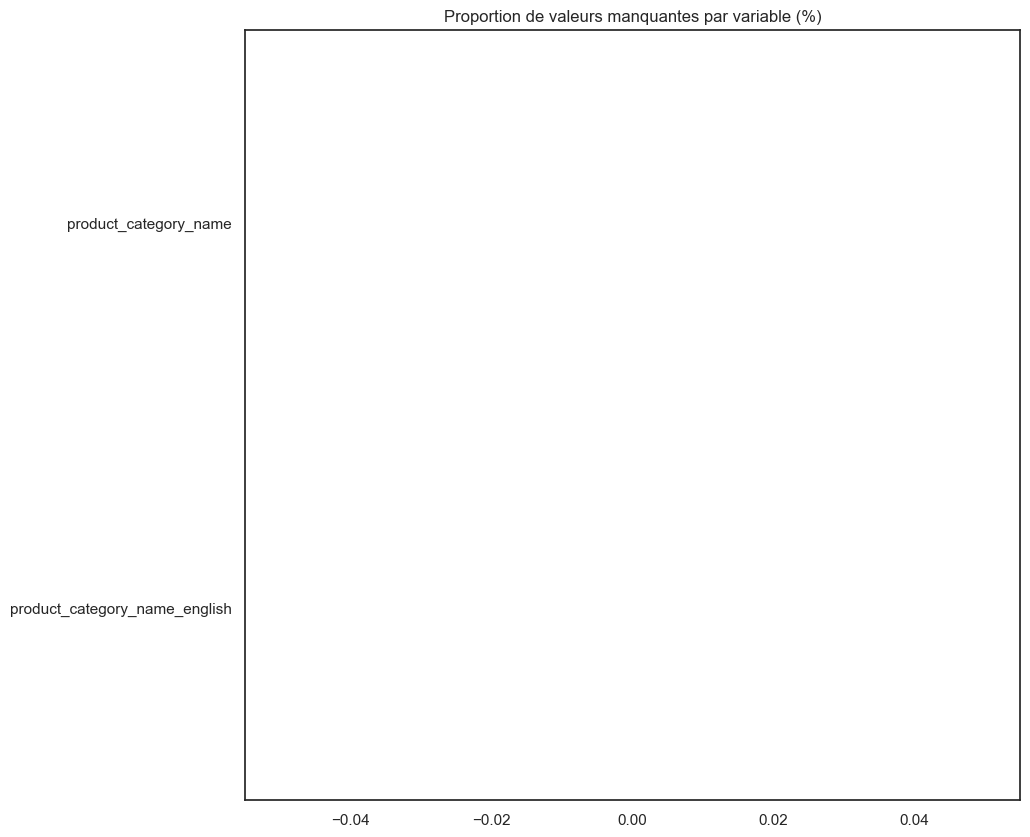

In [550]:
#Diagramme affichant la proportion de valeurs manquantes par variable
products_name_nan = products_name.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=products_name_nan.values/products_name.shape[0]*100, y=products_name_nan.index)

In [551]:
# Variables uniques par colonne
products_name.nunique()

product_category_name            71
product_category_name_english    71
dtype: int64

- Le dataframe de la catégorie de produit contient 71 lignes et 2 colonnes avec le type de données correct pour chaque colonne.
- Chaque colonne parle de la catégorie de produit en portugais et en anglais.
- La trame de données contient des valeurs en double ou nulles.

In [552]:
#Rename the product_category_name_english column
product_cat=products_name.copy()
product_cat.rename(columns = {"product_category_name_english":"product_category"}, inplace=True)

#Confirm the change in the column name
product_cat.columns

Index(['product_category_name', 'product_category'], dtype='object')

- La colonne du nom de la catégorie de produits en portugais est supprimée.
- La colonne de catégorie de produits nommée en anglais est renommée pour être plus descriptive.

### Fusion dataset catégorie de produit et produits

In [553]:
#Create master products dataframe with products and product_cat
products_df = products.merge(product_cat, on="product_category_name")
products_df.sample(10)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
2377,c1254983bd81d72b96867b6838582cf5,esporte_lazer,46.0,565.0,3.0,2050.0,20.0,20.0,20.0,sports_leisure
28383,3af5874bd2429ed183a5445d1432fcde,construcao_ferramentas_construcao,51.0,150.0,2.0,100.0,17.0,5.0,13.0,construction_tools_construction
7383,f5c0451a8329bdf130172a733eb5d60e,cool_stuff,50.0,330.0,1.0,1700.0,33.0,44.0,19.0,cool_stuff
18697,7e53a61dd91122cf3f80674ab5068403,beleza_saude,52.0,1219.0,1.0,950.0,20.0,10.0,40.0,health_beauty
31637,12fd8665371236b5b586ea4e448902c8,casa_conforto,61.0,292.0,1.0,4050.0,45.0,15.0,35.0,home_confort
18188,176b54e1ca47c0ec2bc2e298a76adf9a,beleza_saude,56.0,1000.0,2.0,200.0,20.0,5.0,15.0,health_beauty
25822,5f96ea82b7c80d875fd5337033db3b6e,fashion_bolsas_e_acessorios,57.0,382.0,6.0,200.0,16.0,9.0,11.0,fashion_bags_accessories
24009,854f1672c41eaa84b3e3a79e06146f63,telefonia,59.0,777.0,6.0,350.0,17.0,4.0,12.0,telephony
6864,9d91da41ef1f568f2a03332a42ca5fa8,utilidades_domesticas,52.0,1812.0,1.0,13600.0,35.0,100.0,35.0,housewares
30956,d87a746a8c32da19aabdddac8b632877,telefonia_fixa,42.0,309.0,3.0,100.0,19.0,3.0,11.0,fixed_telephony


In [554]:
#Drop unnecessary columns from products_df
products_df.drop(columns=["product_category_name"], inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32328 non-null  object 
 1   product_name_length         32328 non-null  float64
 2   product_description_length  32328 non-null  float64
 3   product_photos_qty          32328 non-null  float64
 4   product_weight_g            32328 non-null  float64
 5   product_length_cm           32328 non-null  float64
 6   product_height_cm           32328 non-null  float64
 7   product_width_cm            32328 non-null  float64
 8   product_category            32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


<font color="#337da4"><h4>2.8 Données des options de paiement / règlement </h4><a class="anchor" id="section_2.8"></a></font>

In [555]:
payment_fichier=pd.read_csv('olist_order_payments_dataset.csv')
payments=payment_fichier.copy()

In [556]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [557]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [558]:
tableau_resume(payments,"Moyen de paiement","order_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Moyen de paiement,103886,5,100.0%,4446


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

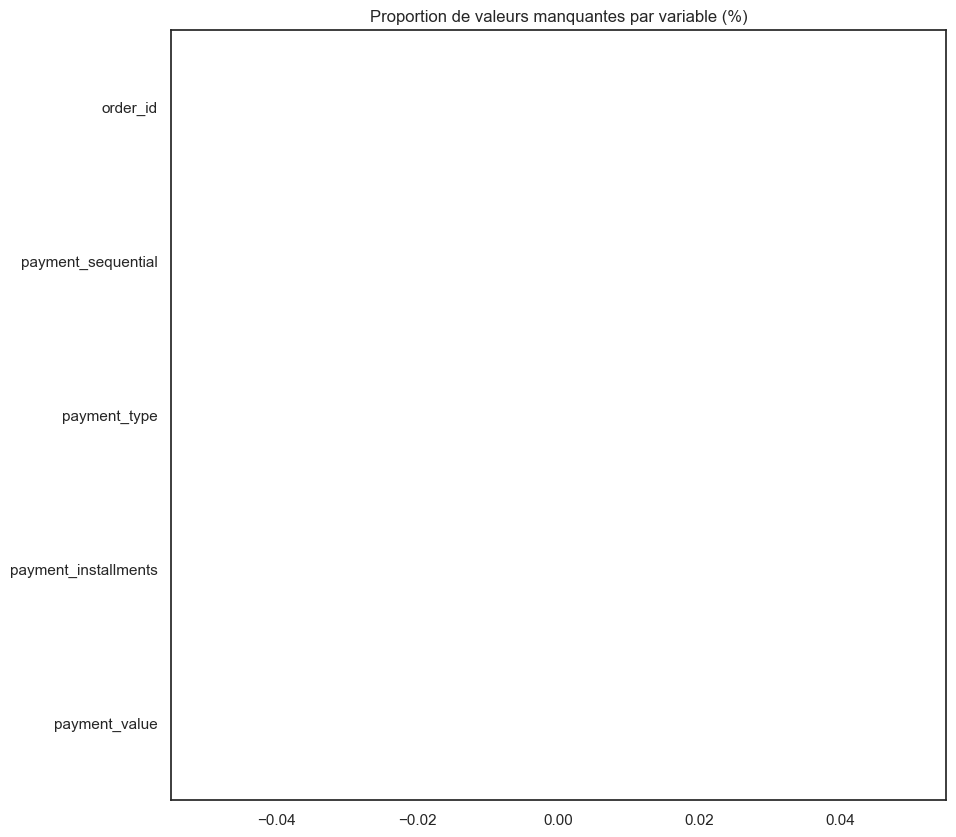

In [559]:
#Diagramme affichant la proportion de valeurs manquantes par variable
payments_nan = payments.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=payments_nan.values/payments.shape[0]*100, y=payments_nan.index)

- payment_sequential : Si plusieurs méthodes de paiement appliquées, une ligne est crée par moyen utilisé.
- payment_installments : Nombre de versements choisis

Il n'y a pas de valeurs manquantes dans les données. 

C:\Users\kherm\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


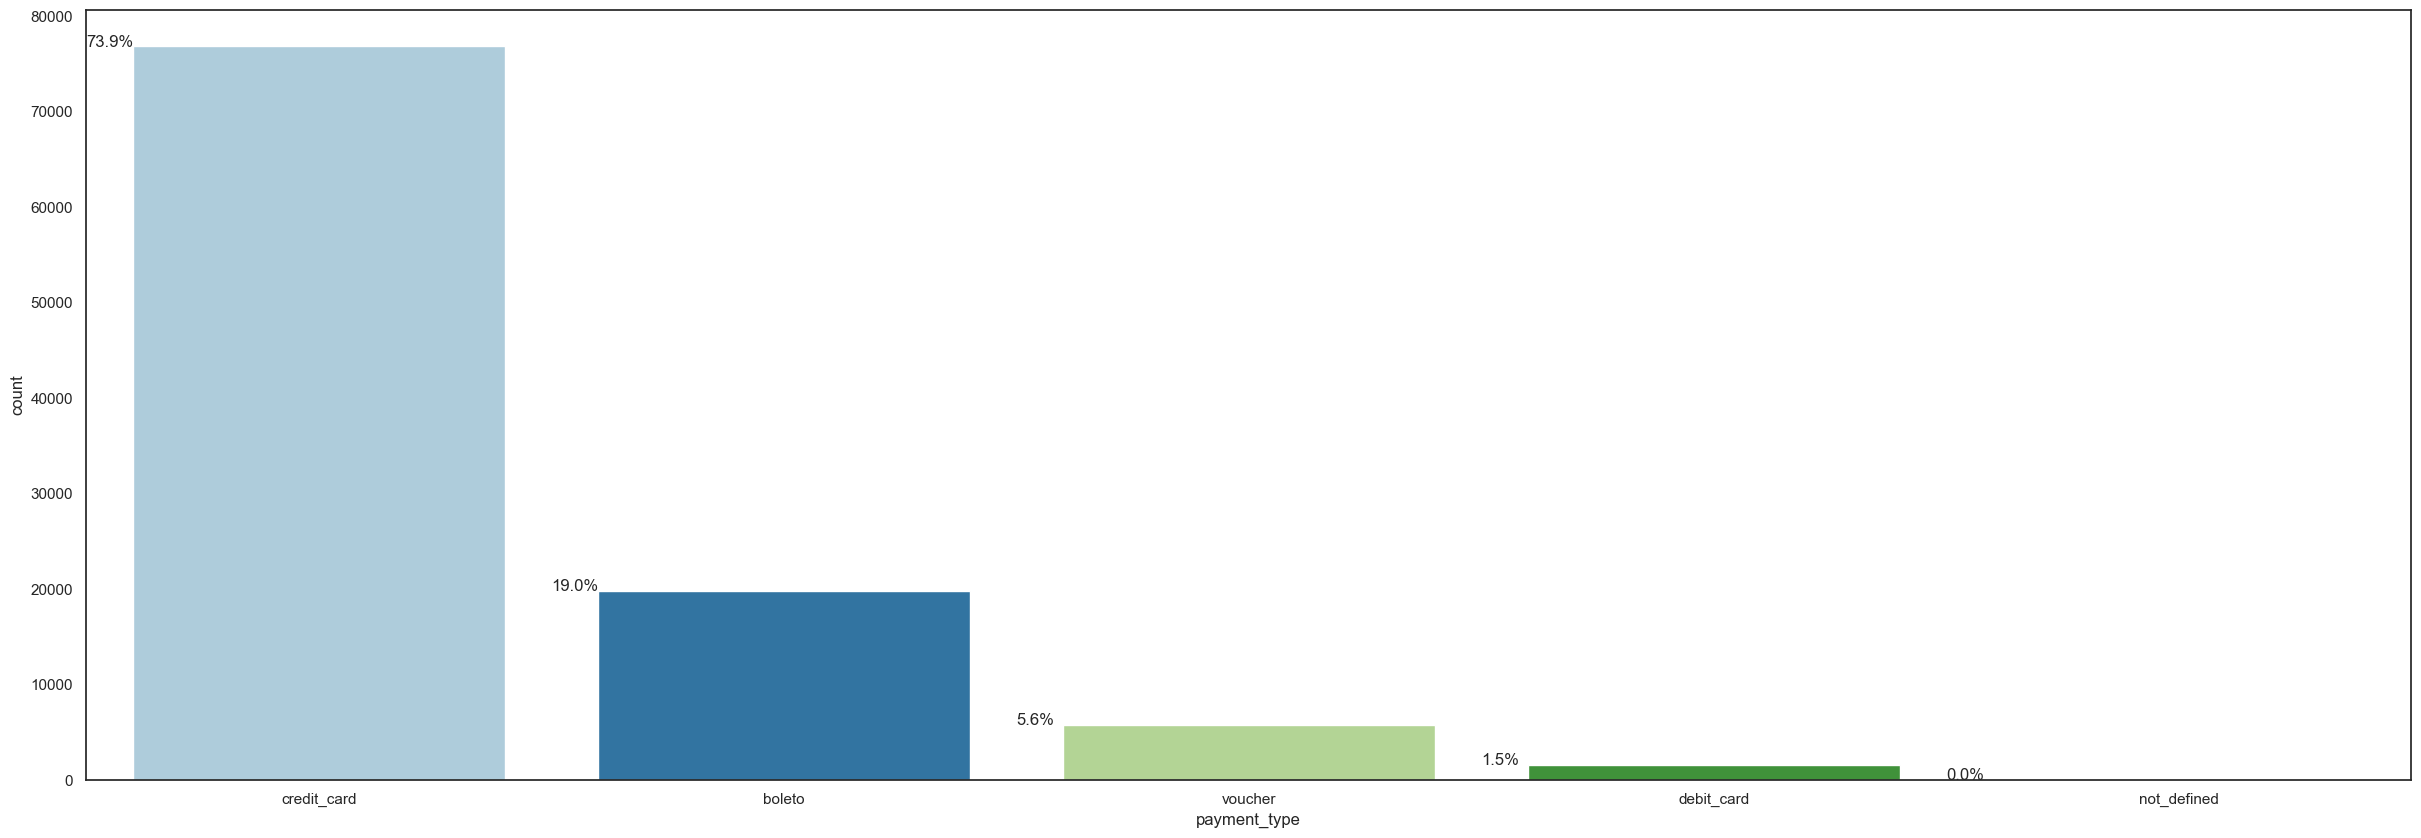

In [560]:
bar_perc(payments, 'payment_type',30,10)

<font color="#337da4"><h4>2.9 Données sur les avis clients</h4><a class="anchor" id="section_2.9"></a></font>

In [561]:
review_fichier=pd.read_csv('olist_order_reviews_dataset.csv')
reviews=review_fichier.copy()

In [562]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [563]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [564]:
tableau_resume(reviews,"Avis des clients","review_id")

,Nombre lignes,Nombre colonnes,Taux remplissage moyen,Doublons
Avis des clients,99224,7,79.0%,814


<AxesSubplot:title={'center':'Proportion de valeurs manquantes par variable (%)'}>

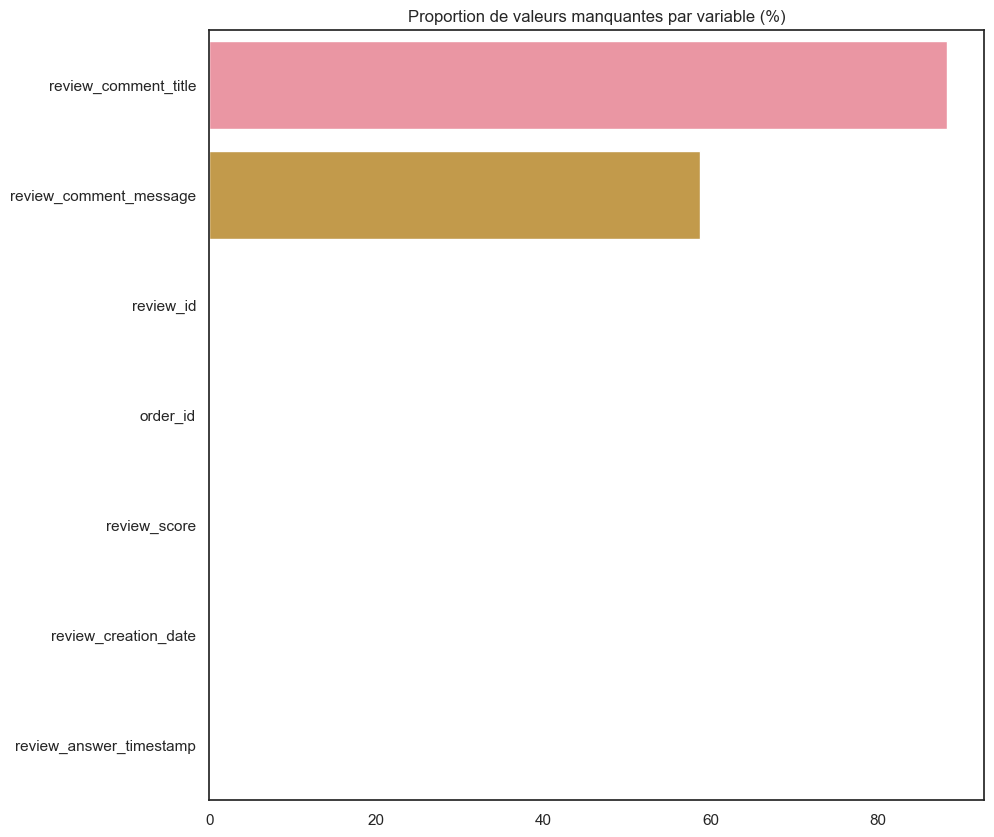

In [565]:
#Diagramme affichant la proportion de valeurs manquantes par variable
reviews_nan = reviews.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Proportion de valeurs manquantes par variable (%)')
sns.barplot(x=reviews_nan.values/reviews.shape[0]*100, y=reviews_nan.index)

In [566]:
missing(reviews)

,Pourcentage Valeurs Manquantes,Nombre de valeurs manquantes
review_comment_title,88.34,87656
review_comment_message,58.70,58247
review_id,0.00,0
order_id,0.00,0
review_score,0.00,0
review_creation_date,0.00,0
review_answer_timestamp,0.00,0


Les données manquantes concernent les commantaires descriptifs. 

In [567]:
# Variables uniques par colonne
reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [568]:
#Description des données 
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


- Le tableau des avis contient 99224 lignes et 7 colonnes.
- Les colonnes review_creation_date et review_answer_timestamp sont enregistrées en tant qu'objets chaîne.
- Ceux-ci seront convertis en objets datetime.
- Il y a des valeurs nulles dans les colonnes review_comment_title et review_comment_message.
- Les valeurs nulles dans les deux colonnes seront examinées.

In [569]:
#Convert review_creation_date and review_answer_timestamp to datetime objects
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"])
reviews["review_creation_date"] = pd.to_datetime(reviews["review_creation_date"])

In [570]:
#Confirm the updated datetype
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [571]:
#Review null rows for review_comment_title and review_comment_message columns
reviews_null = reviews[reviews["review_comment_title"].isna() & reviews["review_comment_message"].isna()]
reviews_null.shape

(56518, 7)

In [572]:
#Review rows with at least a null row in either review_comment_title or review_comment_message columns
reviews_ornull = (reviews[reviews["review_comment_title"].isna() | reviews["review_comment_message"].isna()])
reviews_ornull.shape

(89385, 7)

- Il y a plus de 50 000 lignes sans titre de commentaire de révision ni message de révision. C'est plus de 50 % de la base de données des avis
- Il y a cependant plus de 89385 lignes avec soit un titre de commentaire de révision, soit un message. Les lignes sont trop nombreuses pour être supprimées pour le moment, elles seront donc conservées.

Voici les titres de commentaires les plus courants : 

In [573]:
reviews.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [574]:
#Keep rows with either a review message comment or title.
reviews1 = reviews_ornull.copy()
reviews1["review_comment_title"].value_counts()

recomendo                    75
Recomendo                    69
Bom                          65
Ótimo                        58
super recomendo              57
Muito bom                    55
Ótimo                        47
Excelente                    45
10                           43
Otimo                        41
Super recomendo              33
Boa                          28
otimo                        24
bom                          24
Excelente                    22
Muito bom                    19
Ótima                        18
muito bom                    16
Bom                          16
Ótima                        14
excelente                    12
Recomendo                    11
*****                        11
Muito boa                    10
super recomendado            10
RECOMENDO                    10
9                             9
Entrega rápida                8
8                             8
recomendado                   7
ótimo                         7
otima   

In [575]:
reviews.shape

(99224, 7)

### Fusion fichier article + avis client

In [576]:
#Create master orders_df
orders_df = orders.merge(order_items, on="order_id") \
    .merge(reviews, on="order_id")

#Review orders dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17,2018-02-18 13:02:51


<font color="#337da4"><h2>3.  Création des Datasets Étendus et Analyse exploratoire</h2><a class="anchor" id="section_3"></a></font>

### Produits et catégories de produits 

Nous allons à présent créer des dataset plus complets en réalisant des jointures sur les produits

et catégories dans un premier temps, tout en supprimant les variables qui seront inutiles dans

notre RFM :

In [577]:
products_final=products_df.copy()

Voici les catégories de produits les plus représentées : 

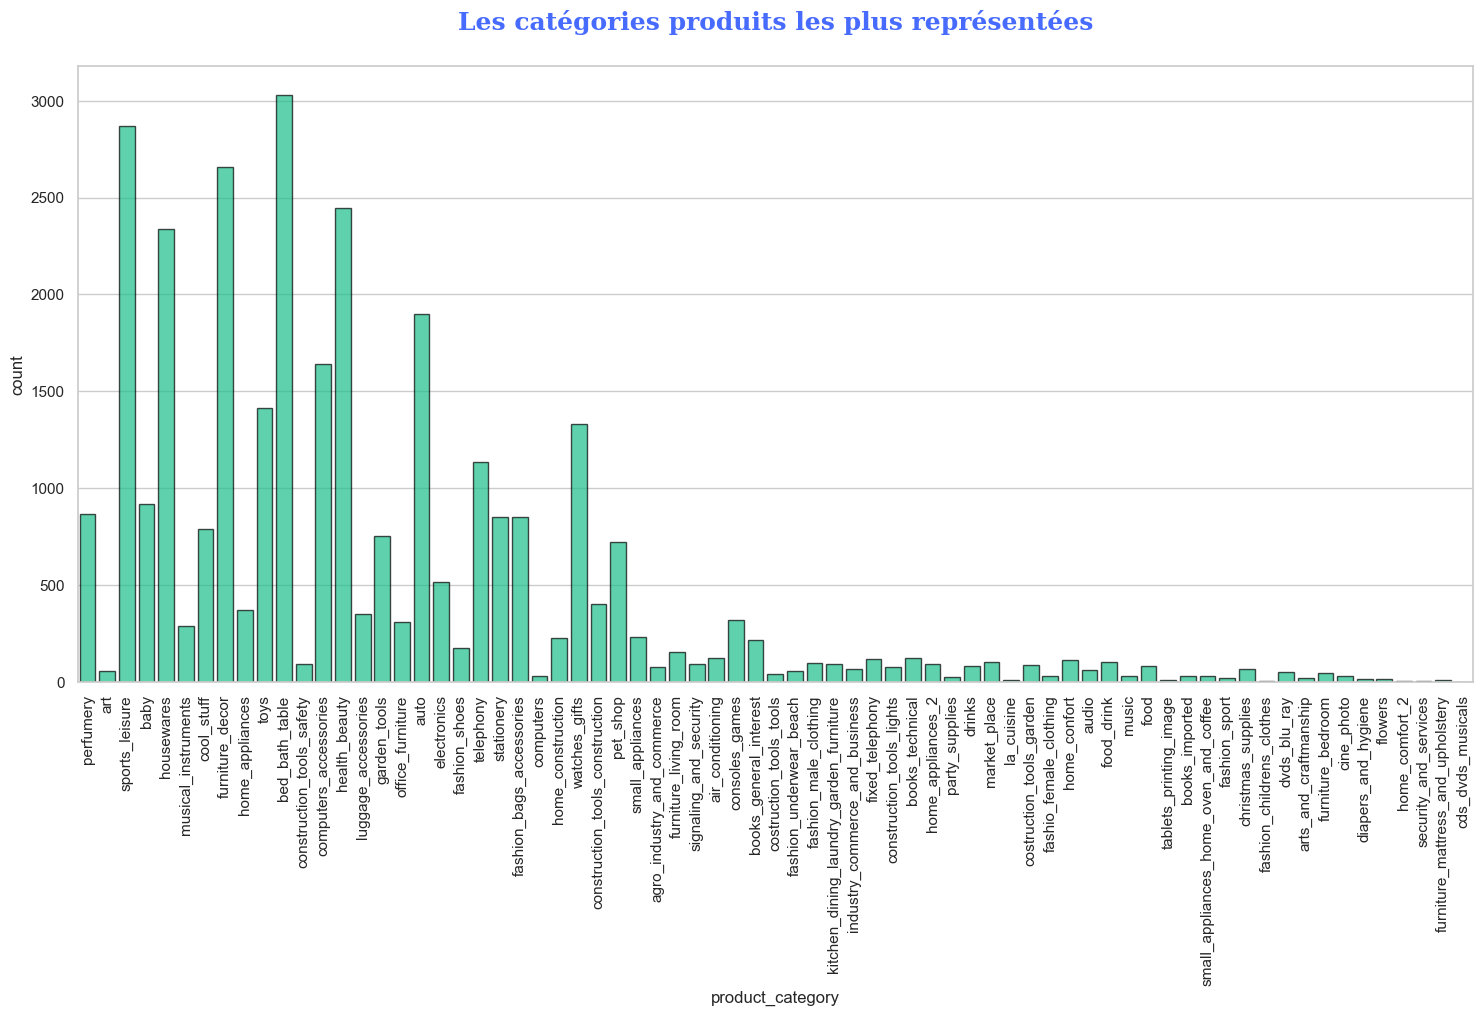

In [578]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=products_final, x="product_category",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, products_final["product_category"].nunique()),
           products_final["product_category"].unique(),
           rotation=90)
plt.title(f"Les catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

### Commandes et Vendeurs

Nous allons regrouper les données de lignes de commandes, d'entêtes de commandes et de données clients dans un unique dataframe.

In [579]:
order_items_final = pd.merge(order_items, orders,
                       how="left",
                       on="order_id")

del_features_list = [ "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
order_items_final.drop(del_features_list,
                 axis=1,
                 inplace=True)
order_items_final.head(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444


In [580]:
order_items_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       112650 non-null  object         
 1   order_item_id                  112650 non-null  object         
 2   product_id                     112650 non-null  object         
 3   seller_id                      112650 non-null  object         
 4   price                          112650 non-null  float64        
 5   freight_value                  112650 non-null  float64        
 6   customer_id                    112650 non-null  object         
 7   order_status                   112650 non-null  object         
 8   order_purchase_timestamp       112650 non-null  datetime64[ns] 
 9   order_delivered_customer_date  110204 non-null  datetime64[ns] 
 10  delivery_duration              110204 non-null  timedelt

In [581]:
sellers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3087
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seller_id        3088 non-null   object 
 1   seller_zipcode   3088 non-null   object 
 2   seller_city      3088 non-null   object 
 3   seller_state     3088 non-null   object 
 4   geolocation_lat  3088 non-null   float64
 5   geolocation_lng  3088 non-null   float64
dtypes: float64(2), object(4)
memory usage: 168.9+ KB


In [582]:
sellers_geo=sellers_geo.rename(columns={"geolocation_lat": "seller_lat", "geolocation_lng": "seller_lon"})

In [583]:
cus_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         99163 non-null  object 
 1   customer_unique_id  99163 non-null  object 
 2   customer_zipcode    99163 non-null  object 
 3   customer_city       99163 non-null  object 
 4   customer_state      99163 non-null  object 
 5   geolocation_lat     99163 non-null  float64
 6   geolocation_lng     99163 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.1+ MB


In [584]:
cus_geo=cus_geo.rename(columns={"geolocation_lat": "cus_lat", "geolocation_lng": "cus_lon"})

In [585]:
cus_geo.nunique()

customer_id           99163
customer_unique_id    95828
customer_zipcode      14837
customer_city          4074
customer_state           27
cus_lat               14837
cus_lon               14837
dtype: int64

In [586]:
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,cus_lat,cus_lon
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.498489,-47.396929
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.498489,-47.396929
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.498489,-47.396929
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.498489,-47.396929


In [587]:
order_items_final = pd.merge(order_items_final, sellers_geo,
                       how="left",
                       on="seller_id")

del_features_list = ["seller_zipcode","seller_city"]
order_items_final.drop(del_features_list,
                 axis=1,
                 inplace=True)
order_items_final.head(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873


In [588]:
order_items_final = pd.merge(order_items_final, cus_geo,
                       how="left",
                       on="customer_id")

del_features_list = ["customer_zipcode","customer_city"]
order_items_final.drop(del_features_list,
                 axis=1,
                 inplace=True)
order_items_final.head(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id,customer_state,cus_lat,cus_lon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492,871766c5855e863f6eccc05f988b23cb,RJ,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565,eb28e67c4c0b83846050ddfb8a35d051,SP,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124,3818d81c6709e39d06b2738a8d3a2474,MG,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359,af861d436cfc08b2c2ddefd0ba074622,SP,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873,64b576fb70d441e8f1b2d7d446e483c5,SP,-23.243402,-46.827614


In [589]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [590]:
order_items_final['distance_seller_customer'] = \
    np.concatenate(order_items_final.groupby('order_id')
                     .apply(lambda x: haversine(x['seller_lat'], x['seller_lon'], x['cus_lat'], x['cus_lon'])).values)

In [591]:
order_items_final.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id,customer_state,cus_lat,cus_lon,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492,871766c5855e863f6eccc05f988b23cb,RJ,-21.762775,-41.309633,301.504681
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565,eb28e67c4c0b83846050ddfb8a35d051,SP,-20.220527,-50.903424,585.563937
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124,3818d81c6709e39d06b2738a8d3a2474,MG,-19.870305,-44.593326,312.343511
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359,af861d436cfc08b2c2ddefd0ba074622,SP,-23.089925,-46.611654,293.168420
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873,64b576fb70d441e8f1b2d7d446e483c5,SP,-23.243402,-46.827614,646.163463


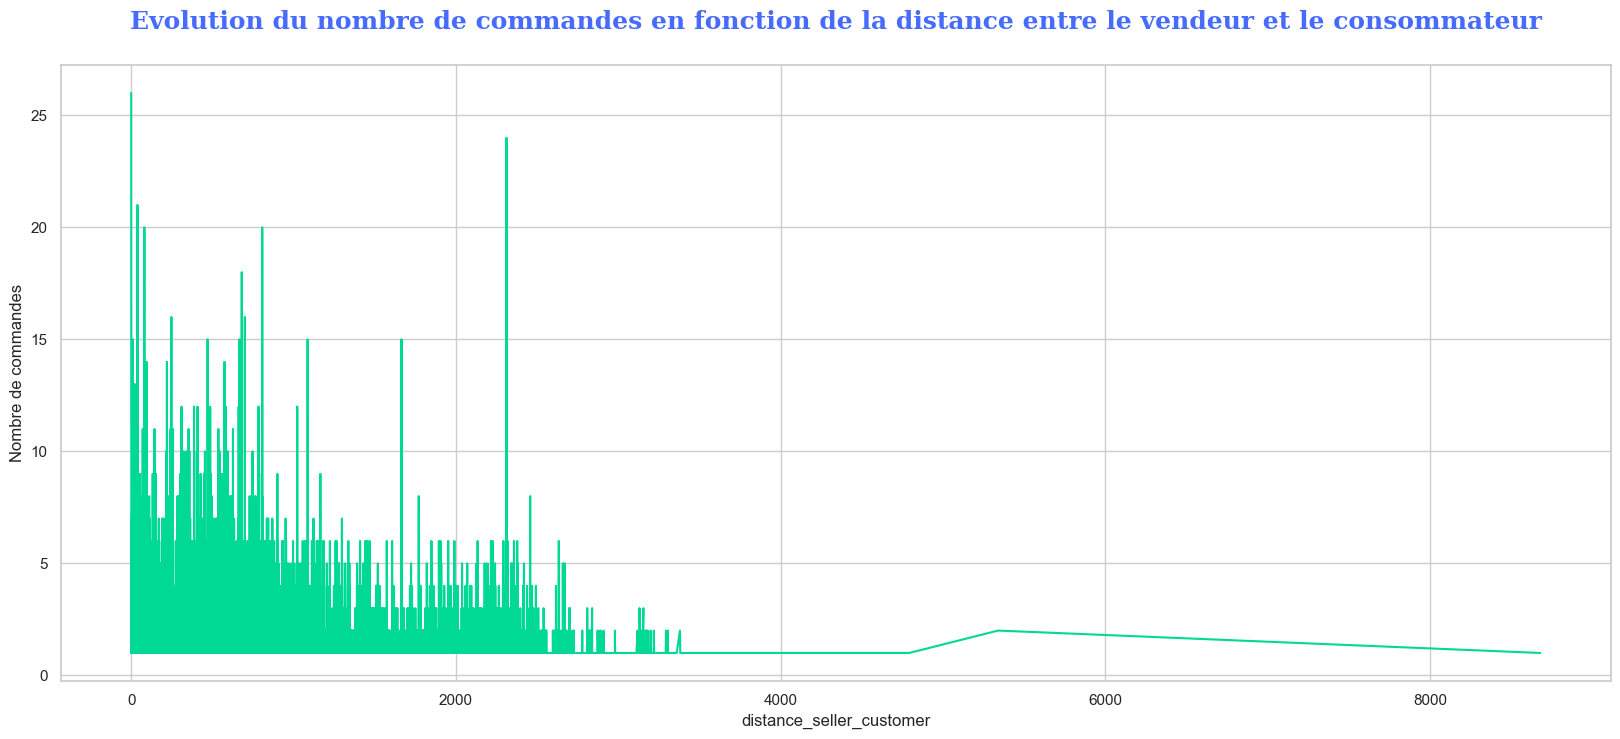

In [592]:
orders_by_distance = order_items_final.groupby(order_items_final["distance_seller_customer"]\
                                               .astype('float64'))\
                                               .count()["order_id"]


                                               
fig=plt.figure(figsize=(20, 8))
ax = orders_by_distance.plot(color="#00d994")
ax.set_ylabel("Nombre de commandes")
plt.title(f"Evolution du nombre de commandes en fonction de la distance entre le vendeur et le consommateur\n",
          fontdict=font_title)
plt.show()                        

Regardons les différents statuts de commande pour ne conserver que les commandes qui ne sont pas "en cours". 

In [593]:
order_items_final = order_items_final[order_items_final["order_status"] == "delivered"]

Nous pouvons également vérifier l'évolution du nombre de commandes passées par jour sur le site E-Commerce :

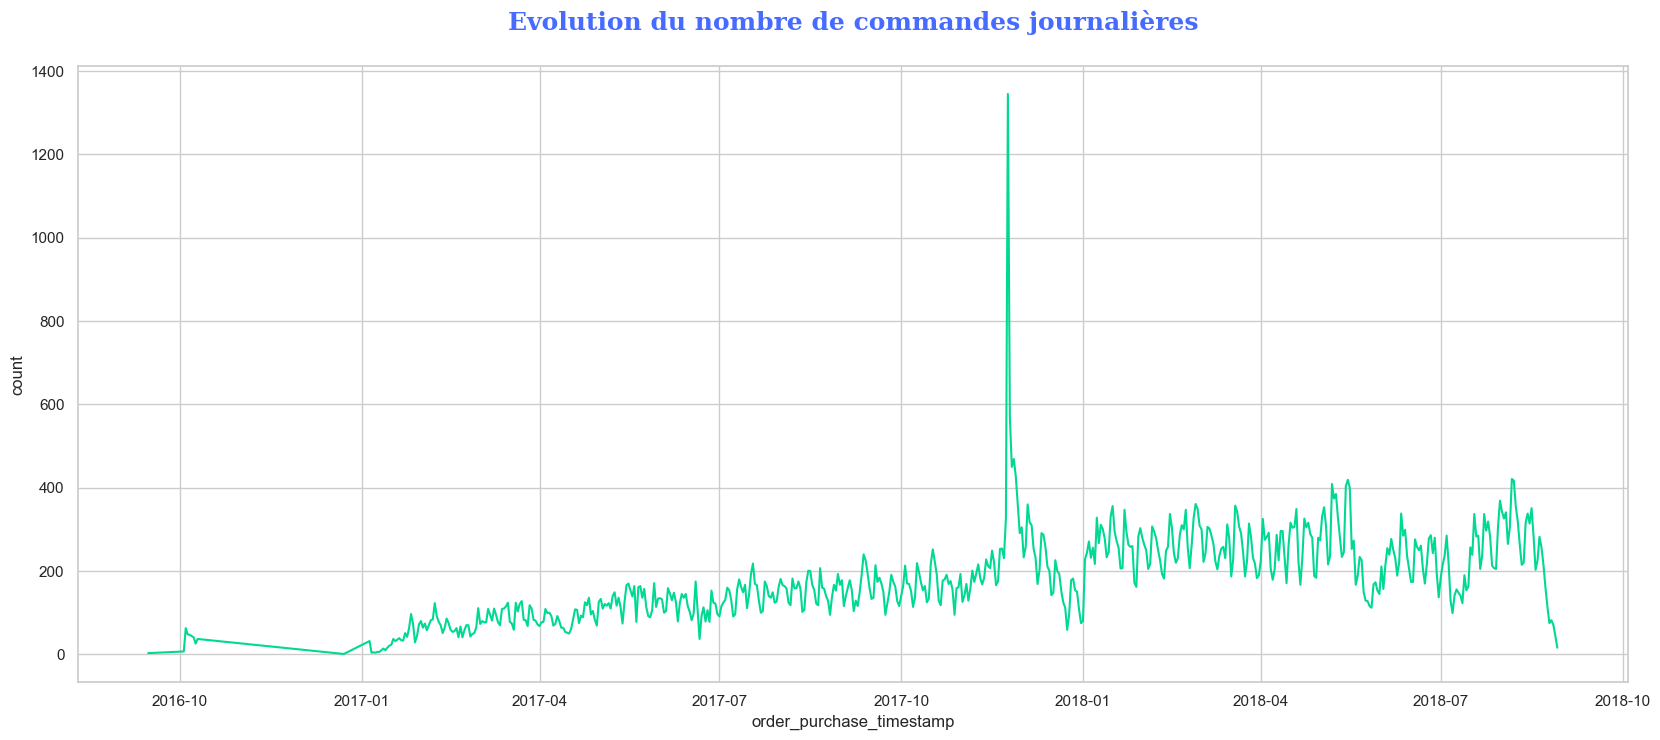

In [594]:
orders_per_days = order_items_final.groupby(order_items_final["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontdict=font_title)
plt.show()

On remarque un pic anormal autour de Novembre / Décembre 2017 (ce qui peut être un pic correspondant aux cadeaux de fin d'année) ainsi qu'un plateau sans commandes entre Octobre 2016 et Janvier 2017.

In [595]:
order_items_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110197 non-null  object         
 1   order_item_id                  110197 non-null  object         
 2   product_id                     110197 non-null  object         
 3   seller_id                      110197 non-null  object         
 4   price                          110197 non-null  float64        
 5   freight_value                  110197 non-null  float64        
 6   customer_id                    110197 non-null  object         
 7   order_status                   110197 non-null  object         
 8   order_purchase_timestamp       110197 non-null  datetime64[ns] 
 9   order_delivered_customer_date  110197 non-null  datetime64[ns] 
 10  delivery_duration              110197 non-null  timedelt

Nous pouvons également regarder la répartition du nombre de commandes par mois, jour de la semaine ou heure de la journée :

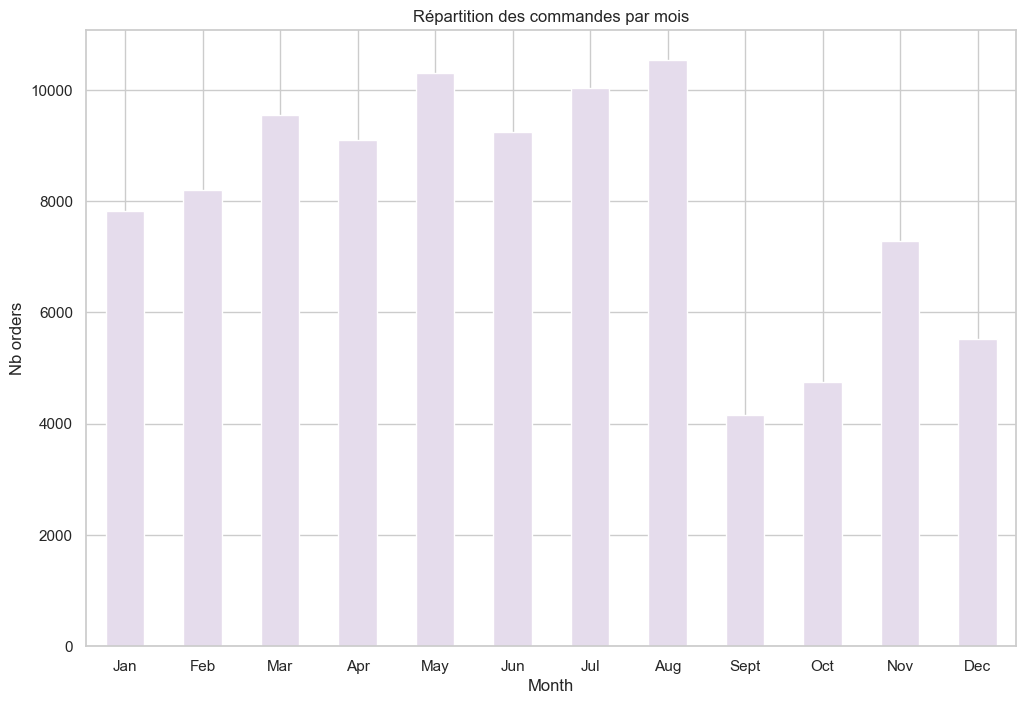

In [596]:
order_items_final.groupby(order_items_final['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par mois",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

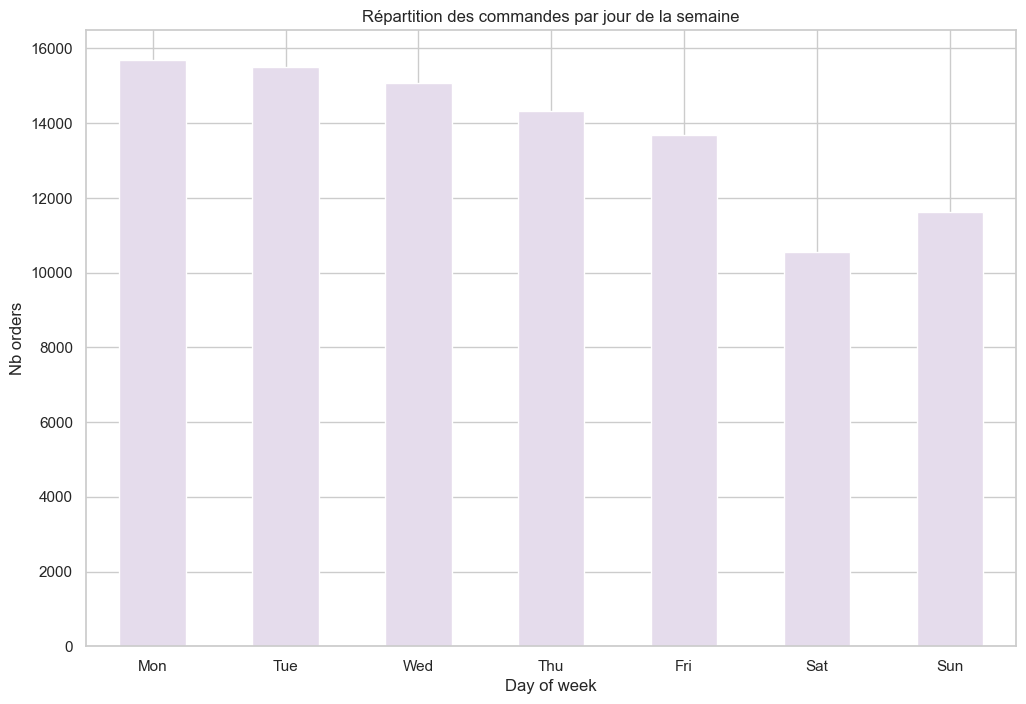

In [597]:
order_items_final.groupby(order_items_final['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          ylabel="Nb orders",
          xlabel="Day of week",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.show()

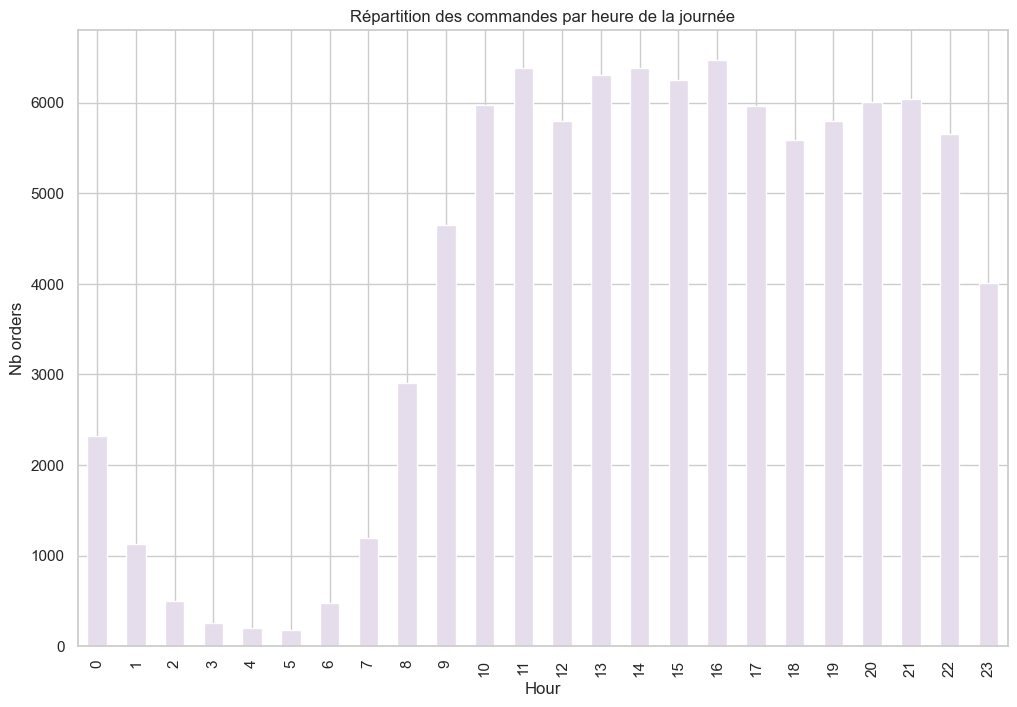

In [598]:
order_items_final.groupby(order_items_final['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          ylabel="Nb orders",
          xlabel="Hour",
          legend=False)
plt.show()

On remarque les plus gros écart sur les données mensuelles. Vérifions les variances de chiffre d'affaire sur les mois de l'années

In [599]:
order_items_final["sale_month"] = order_items_final['order_purchase_timestamp'].dt.month

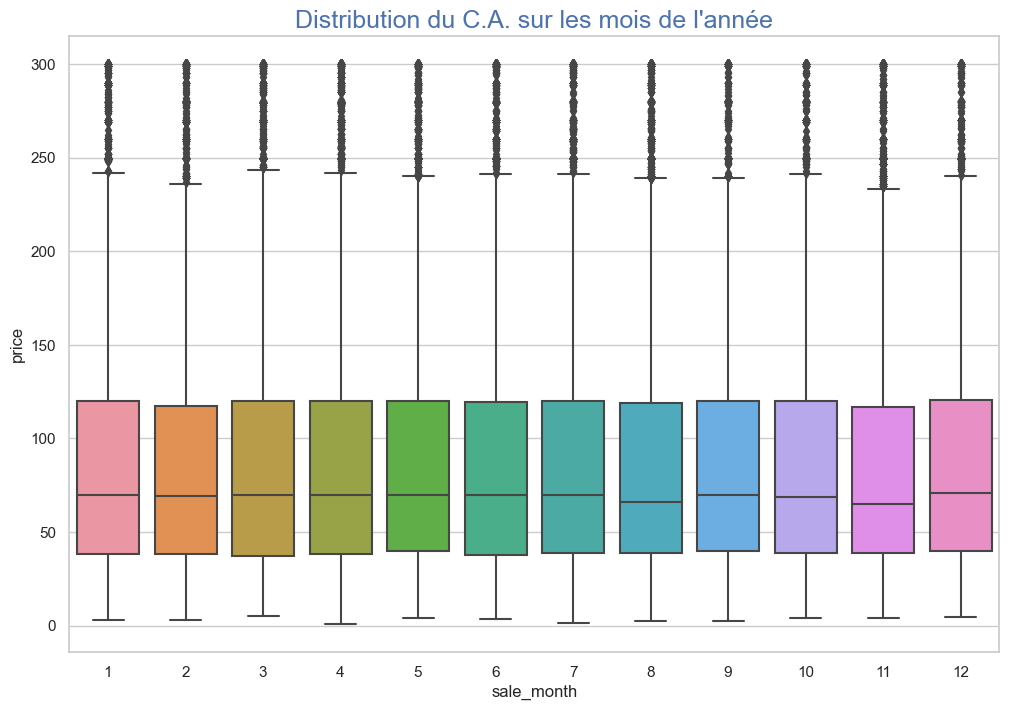

In [600]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items_final[order_items_final.price < 300], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

Les médianes et variances restent très proche sur les différents mois de l'année. Nous intégrerons tout de même cette donnée pour le moment mais il sera judicieux de regarder l'évolution de cette distribution pour l'intégrer dans le cadre du contrat de maintenance.

Pour le dataset des paiements, vous allons créer de nouvelles variables à savoir :

- Le nombre de moyens de paiement différents utilisés sur la commande.
- Le nombre d'échéances totales de la commande.

In [601]:
group_payments = payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_value":'mean',
     "payment_installments": 'sum'})

payment_types=payments[['order_id','payment_type']]

order_items_final = pd.merge(order_items_final, group_payments,
                       how="left",
                       on="order_id")

order_items_final = order_items_final.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})

order_items_final = pd.merge(order_items_final, payment_types,
                       how="left",
                       on="order_id")

order_items_final.head(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id,customer_state,cus_lat,cus_lon,distance_seller_customer,sale_month,nb_payment_sequential,payment_value,sum_payment_installments,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492,871766c5855e863f6eccc05f988b23cb,RJ,-21.762775,-41.309633,301.504681,9,1.0,72.19,2.0,credit_card
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565,eb28e67c4c0b83846050ddfb8a35d051,SP,-20.220527,-50.903424,585.563937,4,1.0,259.83,3.0,credit_card
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124,3818d81c6709e39d06b2738a8d3a2474,MG,-19.870305,-44.593326,312.343511,1,1.0,216.87,5.0,credit_card
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359,af861d436cfc08b2c2ddefd0ba074622,SP,-23.089925,-46.611654,293.168420,8,1.0,25.78,2.0,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873,64b576fb70d441e8f1b2d7d446e483c5,SP,-23.243402,-46.827614,646.163463,2,1.0,218.04,3.0,credit_card


Nous allons également vérifier la répartition des moyens de paiement utilisés pour décider si cette information est importante ou non dans les analyses :

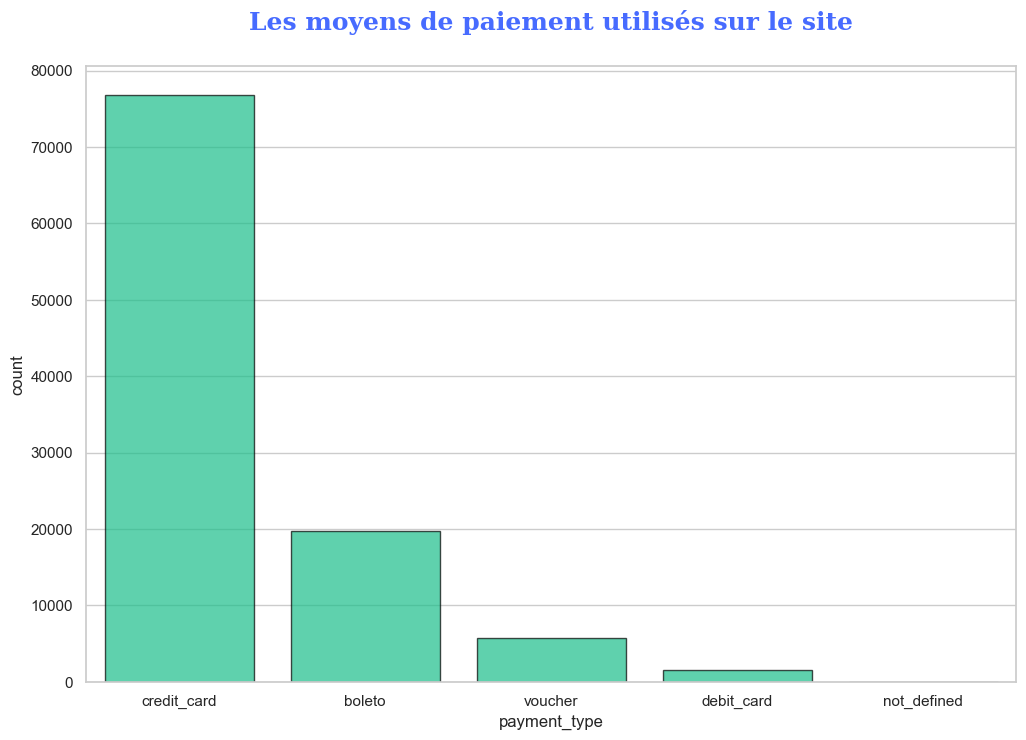

In [602]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=payments, x="payment_type",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.title(f"Les moyens de paiement utilisés sur le site\n",
          fontdict=font_title)
plt.show()

On remarque que 80% des paiements environ sont réalisés en carte bancaire. 

Pour les avis clients, nous allons également créer une nouvelle variable qui indiquera seulement si oui ou non la commande a été notée (True or False) et une seconde variable qui reprendra la note attribuée.

In [603]:
group_reviews = reviews.groupby("order_id").agg({
    "review_id": "count",
    "review_score": "mean"})

order_items_final = pd.merge(order_items_final, group_reviews,
                       how="left",
                       on="order_id")
order_items_final = order_items_final.rename(columns={
    "review_id": "is_reviewed"})
order_items_final.head(5)

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id,customer_state,cus_lat,cus_lon,distance_seller_customer,sale_month,nb_payment_sequential,payment_value,sum_payment_installments,payment_type,is_reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492,871766c5855e863f6eccc05f988b23cb,RJ,-21.762775,-41.309633,301.504681,9,1.0,72.19,2.0,credit_card,1.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565,eb28e67c4c0b83846050ddfb8a35d051,SP,-20.220527,-50.903424,585.563937,4,1.0,259.83,3.0,credit_card,1.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124,3818d81c6709e39d06b2738a8d3a2474,MG,-19.870305,-44.593326,312.343511,1,1.0,216.87,5.0,credit_card,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359,af861d436cfc08b2c2ddefd0ba074622,SP,-23.089925,-46.611654,293.168420,8,1.0,25.78,2.0,credit_card,1.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873,64b576fb70d441e8f1b2d7d446e483c5,SP,-23.243402,-46.827614,646.163463,2,1.0,218.04,3.0,credit_card,1.0,5.0


In [604]:
order_items_final["is_reviewed"] = np.where(order_items_final["is_reviewed"] == 1,
                                      True, False)

Nous pouvons à présent projeter la répartion des notes attribuées aux commandes du site :

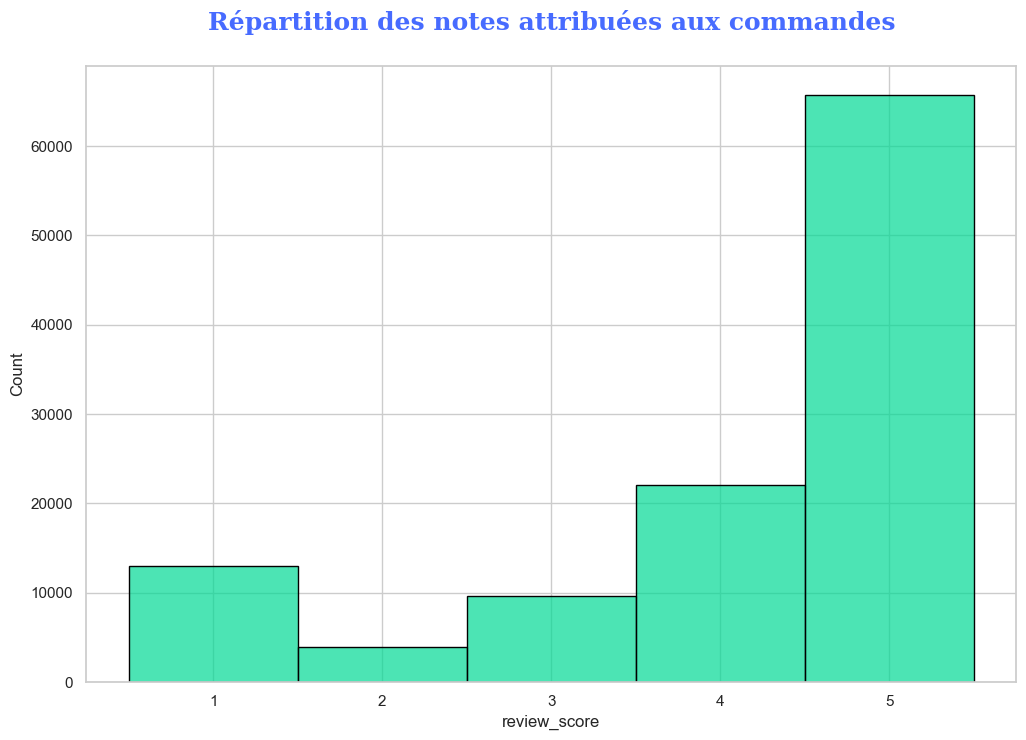

In [605]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=order_items_final, x="review_score", 
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.title(f"Répartition des notes attribuées aux commandes\n",
          fontdict=font_title)
plt.show()

### Fusion avec le fichier client 

In [606]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_zipcode    99441 non-null  object
 3   customer_city       99441 non-null  object
 4   customer_state      99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [607]:
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,cus_lat,cus_lon
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.498489,-47.396929
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.498489,-47.396929
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.498489,-47.396929
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.498489,-47.396929


In [608]:
cus_geo_2=cus_geo.copy()
cus_geo_2=cus_geo_2.drop(columns=['customer_unique_id', 'customer_zipcode','customer_state','cus_lat','cus_lon'])

In [609]:
order_items_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 115037
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       115038 non-null  object         
 1   order_item_id                  115038 non-null  object         
 2   product_id                     115038 non-null  object         
 3   seller_id                      115038 non-null  object         
 4   price                          115038 non-null  float64        
 5   freight_value                  115038 non-null  float64        
 6   customer_id                    115038 non-null  object         
 7   order_status                   115038 non-null  object         
 8   order_purchase_timestamp       115038 non-null  datetime64[ns] 
 9   order_delivered_customer_date  115038 non-null  datetime64[ns] 
 10  delivery_duration              115038 non-null  timedelt

In [610]:
order_items_final_2 = pd.merge(order_items_final, cus_geo_2,
               how="left",
               on="customer_id")
order_items_final_2.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id,customer_state,cus_lat,cus_lon,distance_seller_customer,sale_month,nb_payment_sequential,payment_value,sum_payment_installments,payment_type,is_reviewed,review_score,customer_city
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492,871766c5855e863f6eccc05f988b23cb,RJ,-21.762775,-41.309633,301.504681,9,1.0,72.19,2.0,credit_card,True,5.0,campos dos goytacazes
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565,eb28e67c4c0b83846050ddfb8a35d051,SP,-20.220527,-50.903424,585.563937,4,1.0,259.83,3.0,credit_card,True,4.0,santa fe do sul
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124,3818d81c6709e39d06b2738a8d3a2474,MG,-19.870305,-44.593326,312.343511,1,1.0,216.87,5.0,credit_card,True,5.0,para de minas
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359,af861d436cfc08b2c2ddefd0ba074622,SP,-23.089925,-46.611654,293.168420,8,1.0,25.78,2.0,credit_card,True,4.0,atibaia
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873,64b576fb70d441e8f1b2d7d446e483c5,SP,-23.243402,-46.827614,646.163463,2,1.0,218.04,3.0,credit_card,True,5.0,varzea paulista


In [611]:
products_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32328 non-null  object 
 1   product_name_length         32328 non-null  float64
 2   product_description_length  32328 non-null  float64
 3   product_photos_qty          32328 non-null  float64
 4   product_weight_g            32328 non-null  float64
 5   product_length_cm           32328 non-null  float64
 6   product_height_cm           32328 non-null  float64
 7   product_width_cm            32328 non-null  float64
 8   product_category            32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


### Fusion avec produits et catégories de produits pour créer le dataset final

In [612]:
data = pd.merge(order_items_final_2, products_final,
               how="left",
               on="product_id")
data.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id,customer_state,cus_lat,cus_lon,distance_seller_customer,sale_month,nb_payment_sequential,payment_value,sum_payment_installments,payment_type,is_reviewed,review_score,customer_city,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1 days 05:09:32,29.158889,SP,-22.496953,-44.127492,871766c5855e863f6eccc05f988b23cb,RJ,-21.762775,-41.309633,301.504681,9,1.0,72.19,2.0,credit_card,True,5.0,campos dos goytacazes,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,8 days 01:29:24,193.490000,SP,-23.565096,-46.518565,eb28e67c4c0b83846050ddfb8a35d051,SP,-20.220527,-50.903424,585.563937,4,1.0,259.83,3.0,credit_card,True,4.0,santa fe do sul,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,6 days 00:42:28,144.707778,MG,-22.262584,-46.171124,3818d81c6709e39d06b2738a8d3a2474,MG,-19.870305,-44.593326,312.343511,1,1.0,216.87,5.0,credit_card,True,5.0,para de minas,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,4 days 00:04:39,96.077500,SP,-20.553624,-47.387359,af861d436cfc08b2c2ddefd0ba074622,SP,-23.089925,-46.611654,293.168420,8,1.0,25.78,2.0,credit_card,True,4.0,atibaia,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,13 days 06:56:22,318.939444,PR,-22.929384,-53.135873,64b576fb70d441e8f1b2d7d446e483c5,SP,-23.243402,-46.827614,646.163463,2,1.0,218.04,3.0,credit_card,True,5.0,varzea paulista,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115038 entries, 0 to 115037
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       115038 non-null  object         
 1   order_item_id                  115038 non-null  object         
 2   product_id                     115038 non-null  object         
 3   seller_id                      115038 non-null  object         
 4   price                          115038 non-null  float64        
 5   freight_value                  115038 non-null  float64        
 6   customer_id                    115038 non-null  object         
 7   order_status                   115038 non-null  object         
 8   order_purchase_timestamp       115038 non-null  datetime64[ns] 
 9   order_delivered_customer_date  115038 non-null  datetime64[ns] 
 10  delivery_duration              115038 non-null  timedelt

# Exploration par catégorie

## 1. Localisation

In [614]:
#Ventes par état
TopSales_state = data.groupby(["customer_state"]).agg({"payment_value":"sum"})
TopSales_state.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,payment_value
0,SP,7401815.59
1,RJ,2686903.46
2,MG,2280281.16
3,RS,1110662.75
4,PR,1029946.16
5,BA,770176.03
6,SC,767093.97
7,GO,492353.52
8,ES,397845.02
9,DF,388960.35


On observe que l'État SP a réalisé les ventes totales les plus élevées de 7 502 926,95 \\$, suivi de près par l'État RJ avec des ventes totales de 2 708 839,33 \\$.

In [615]:
# Ventes par état et par cité

TopSales_city = data.groupby(["customer_state", "customer_city"]).agg({"payment_value":"sum"})
TopSales_city.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,customer_city,payment_value
0,SP,sao paulo,2755424.93
1,RJ,rio de janeiro,1520550.72
2,MG,belo horizonte,489662.49
3,DF,brasilia,386836.05
4,PR,curitiba,322336.65
5,RS,porto alegre,295816.05
6,BA,salvador,277021.57
7,SP,campinas,262276.44
8,SP,guarulhos,199320.12
9,GO,goiania,194628.01


Sao Paulo et Rio de Janeiro et Belo Horizonte sont les cités qui ont les ventes les plus élevées. 

In [616]:
#Ventes par produit par catégorie et par cité et état.
TopProduct_city = data.groupby(["customer_state", "customer_city", "product_category"]).agg({"payment_value":"sum", "order_item_id":"count"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category,payment_value,order_item_id
0,SP,sao paulo,computers_accessories,281213.35,1222
1,SP,sao paulo,bed_bath_table,280868.11,2111
2,SP,sao paulo,health_beauty,258538.63,1766
3,SP,sao paulo,watches_gifts,188758.91,846
4,SP,sao paulo,furniture_decor,188471.51,1333
5,SP,sao paulo,sports_leisure,187031.26,1413
6,SP,sao paulo,housewares,164425.90,1368
7,RJ,rio de janeiro,bed_bath_table,123553.72,881
8,RJ,rio de janeiro,fixed_telephony,112460.61,23
9,RJ,rio de janeiro,sports_leisure,106060.76,587


Text(0, 0.5, 'Ventes')

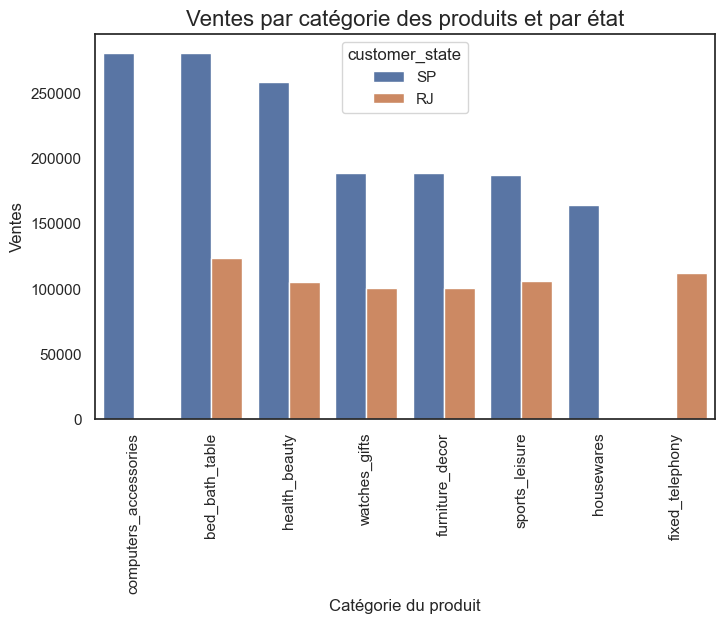

In [617]:
#Plot des top ventes par état et par catégorie des produits
plt.figure(figsize=(8,5))

#style
sns.set(style='white')

#bar chart
sns.barplot(x="product_category", y='payment_value', hue = "customer_state", data=TopProduct_city)

#Rotate x_axis labels
plt.xticks(rotation=90)

#Titre
plt.title('Ventes par catégorie des produits et par état', fontsize=16)

#Labels
plt.xlabel('Catégorie du produit')
plt.ylabel('Ventes')

Sao paolo est la ville où il y a le plus de ventes. Les catégories de produits les plus vendues sont les produits de meubles de chambre et de salle de bain, d'accessoires d'ordinateurs et de produits de beauté et de santé.

Text(0, 0.5, 'Commandes')

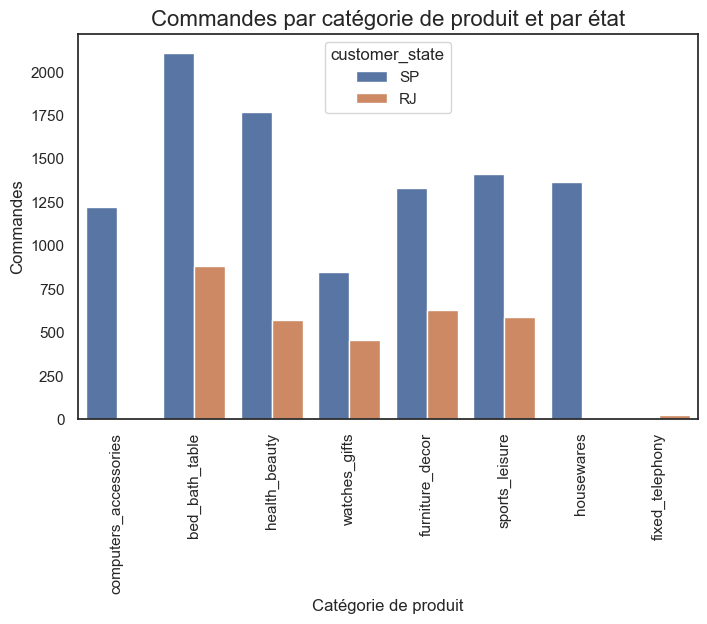

In [618]:
#Plot des top commandes par état et par catégorie des produits
plt.figure(figsize=(8,5))

#Style
sns.set(style='white')

#Bar plot
sns.barplot(x="product_category", y='order_item_id', hue = "customer_state", data=TopProduct_city)

#Rotatation x_axis 
plt.xticks(rotation=90)

#titre
plt.title('Commandes par catégorie de produit et par état', fontsize=16)

#labels
plt.xlabel('Catégorie de produit')
plt.ylabel('Commandes')

**Observations**:
- On observe que la ville de Sao Paulo dans l'État de SP a réalisé les ventes totales les plus élevées de 2 807 526,03 \\$, suivie de près par la ville de Rio De Janeiro dans le RJ avec des ventes totales de 1 536 347,93.
- Campinas et Guarulhos sont deux autres villes de l'État de SP avec des ventes totales importantes de 262 096,32 \\$ et 199 503,82 \\$
- On peut voir que les États SP et RJ sont en tête avec des ventes importantes dans plus d'une ville.
- Les États SP et RJ ont des commandes et des ventes élevées dans des catégories similaires telles que :
-- bed_bath_table
-- ordinateurs_accessoires
-- sports_loisirs
-- Santé & Beauté
-- montres_cadeaux
- Cependant, dans l'état RJ, la catégorie de produits téléphonie_fixe a la deuxième valeur la plus élevée en termes de ventes et de commandes totales.
- Dans l'état SP, la catégorie de produits ordinateurs_accessoires a la deuxième valeur la plus élevée en termes de ventes et de commandes totales.

## 2. Consommateurs

In [619]:
# Nombre de consommateurs total par état et par cité
TotCus_city = data.groupby(["customer_state", "customer_city"]).agg({"customer_id":"count"})
TotCus_city = TotCus_city.sort_values(ascending=False, by="customer_id")[:10].reset_index()
TotCus_city

,customer_state,customer_city,customer_id
0,SP,sao paulo,18160
1,RJ,rio de janeiro,7950
2,MG,belo horizonte,3188
3,DF,brasilia,2219
4,PR,curitiba,1785
5,SP,campinas,1707
6,RS,porto alegre,1615
7,BA,salvador,1466
8,SP,guarulhos,1364
9,SP,sao bernardo do campo,1093


On observe que l'État SP a le plus grand nombre de clients dans plusieurs villes comme :
- São Paulo
- Campinas
- Guarulhos
- São Bernardo do Campo. 

In [620]:
# Top consommateurs par items commandés

TopOrders_customer = data.groupby(["customer_id", "customer_state", "customer_city"]).agg({"order_item_id":"count"})
Top_buying_customers = TopOrders_customer.sort_values(ascending=False, by="order_item_id")[:10].reset_index()
Top_buying_customers

,customer_id,customer_state,customer_city,order_item_id
0,270c23a11d024a44c896d1894b261a83,SP,sao paulo,63
1,13aa59158da63ba0e93ec6ac2c07aacb,RJ,rio de janeiro,38
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,SP,sao paulo,26
3,6ee2f17e3b6c33d6a9557f280edd2925,SP,guarulhos,24
4,86cc80fef09f7f39df4b0dbce48e81cb,RS,itaqui,24
5,63b964e79dee32a3587651701a2b8dbf,SP,atibaia,24
6,d22f25a9fadfb1abbc2e29395b1239f4,MT,sinop,24
7,b246eeed30b362c09d867b9e598bee51,SP,tupa,22
8,50920f8cd0681fd86ebe93670c8fe52e,RS,ijui,21
9,fc3d1daec319d62d49bfb5e1f83123e9,SP,sao paulo,21


Sur la base du nombre total d'articles commandés, la plupart des clients ayant des commandes importantes résident dans plusieurs villes des États SP et MT. 

In [621]:
# Top consommateurs en fonction de l'argent dépensé
Top_buying_customers = data.groupby(["customer_id", "customer_city", "customer_state"]).agg({"payment_value":"sum", "order_item_id":"count"})
Top_buying_customers = Top_buying_customers.sort_values(ascending=False, by="payment_value")[:10].reset_index()
Top_buying_customers

,customer_id,customer_city,customer_state,payment_value,order_item_id
0,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,109312.64,8
1,bd5d39761aa56689a265d95d8d32b8be,goiania,GO,45256.00,20
2,be1b70680b9f9694d8c70f41fa3dc92b,sao paulo,SP,44048.00,20
3,05455dfa7cd02f13d132aa7a6a9729c6,divinopolis,MG,36489.24,6
4,1ff773612ab8934db89fd5afa8afe506,rio de janeiro,RJ,30186.00,10
5,ec5b2ba62e574342386871631fafd3fc,vila velha,ES,29099.52,4
6,e7d6802668de6e74d0d6c56565bf2a24,sao paulo,SP,22346.60,10
7,8c20d9bfbc96c5d39025d77a3ba83d7f,cicero dantas,BA,21874.05,11
8,f7622098214b4634b7fe7eee269b5426,campo novo do parecis,MT,19457.04,6
9,71901689c5f3e5adc27b1dd16b33f0b8,sao luis,MA,19174.38,6


- Bien que SP ait la plus grande clientèle et le plus grand nombre d'articles commandés dans plusieurs villes, le principal client acheteur réside en fait dans la ville de Rio De Daneiro, dans l'État de RJ.
- Il est d'autant plus intéressant que ce client qui achète le plus ne dispose que de 8 articles de commande au total.

In [622]:
# Catégorie des produits achetés par le top customer 1617b1357756262bfa56ab541c47bc16 dans l'état de RJ
TopRJ_customer = data.query("customer_id == '1617b1357756262bfa56ab541c47bc16'")
TopRJ_customer.product_category.value_counts()

fixed_telephony    8
Name: product_category, dtype: int64

In [623]:
# Confirmation du prix et du freight value des items achetés par le top customer 1617b1357756262bfa56ab541c47bc16 dans l'état de RJ
TopRJ_customer[["price", "freight_value"]].value_counts()

price   freight_value
1680.0  28.01            8
dtype: int64

In [624]:
# Catégorie des produits achetés par le top customer be1b70680b9f9694d8c70f41fa3dc92b dans l'état de SP
TopSP_customer = data.query("customer_id == 'be1b70680b9f9694d8c70f41fa3dc92b'")
TopSP_customer["product_category"].value_counts()

computers_accessories    20
Name: product_category, dtype: int64

In [625]:
#Confirmation du prix et du freight value des items achetés par le top customer dans l'état de RJ
TopSP_customer[["price", "freight_value"]].value_counts()

price  freight_value
100.0  10.12            20
dtype: int64

On observe que le prix et la valeur du fret des articles achetés par le premier client dans l'état RJ sont plus chers que ceux achetés par le premier client dans l'état SP malgré un numéro de commande inférieur. Cela explique le pouvoir d'achat plus élevé du meilleur client 1617b1357756262bfa56ab541c47bc16 de l'état RJ.

## Produits

In [626]:
# Top 10 produits par le nombre total de ventes et de commandes
Top10_products = data.groupby("product_category").agg({"payment_value":"sum", "order_id":"nunique", "order_item_id":"count"})
Top10_products = Top10_products.sort_values(ascending=False, by=["payment_value", "order_id"])[:10].reset_index()
Top10_products

,product_category,payment_value,order_id,order_item_id
0,bed_bath_table,1692714.28,9272,11650
1,health_beauty,1620684.04,8647,9762
2,computers_accessories,1549372.59,6530,7898
3,furniture_decor,1394466.93,6307,8557
4,watches_gifts,1387362.45,5495,6065
5,sports_leisure,1349446.93,7530,8733
6,housewares,1069787.97,5743,7172
7,auto,833745.67,3810,4284
8,garden_tools,810614.93,3448,4464
9,cool_stuff,744649.32,3559,3907


Text(0, 0.5, 'Commandes')

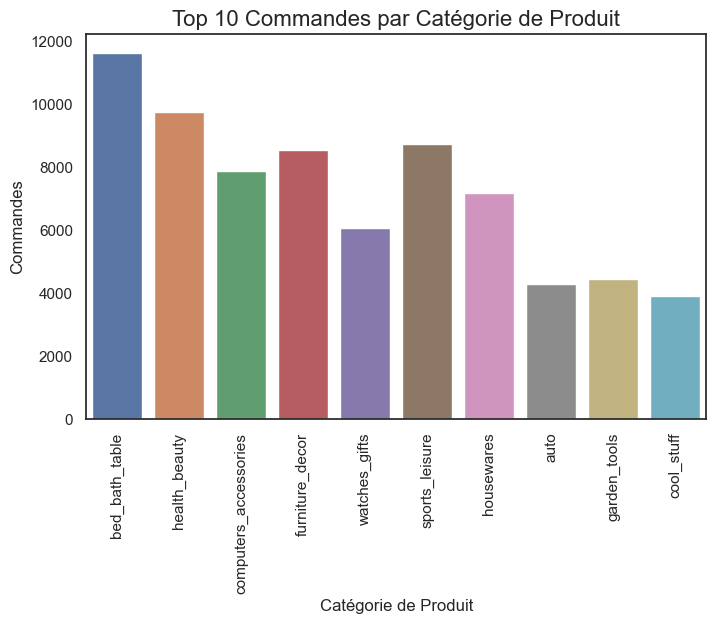

In [627]:
#Plot top commandes par état et par catégorie de produit
plt.figure(figsize=(8,5))

#style
sns.set(style='white')

# bar chart
sns.barplot(x="product_category", y='order_item_id', data=Top10_products)

#Rotation x_axis 
plt.xticks(rotation=90)

#titre
plt.title('Top 10 Commandes par Catégorie de Produit', fontsize=16)

#labels
plt.xlabel('Catégorie de Produit')
plt.ylabel('Commandes')

Les catégories les plus commandés sont bed_bath_table, health_beauty et computers_accessories. 

Text(0, 0.5, 'Ventes')

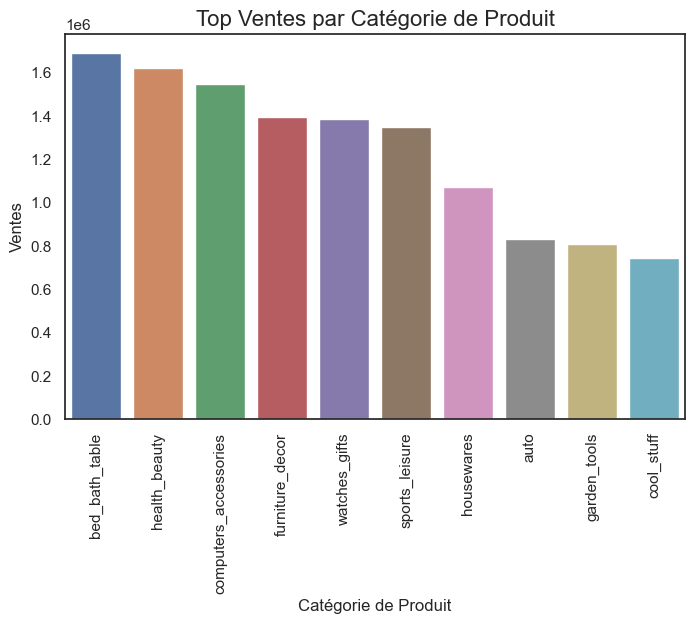

In [628]:
#Plot top commandes par état et par catégorie de produit
plt.figure(figsize=(8,5))

#style
sns.set(style='white')

#bar chart
sns.barplot(x="product_category", y='payment_value', data=Top10_products)

#Rotatation x_axis 
plt.xticks(rotation=90)

#titre
plt.title('Top Ventes par Catégorie de Produit', fontsize=16)

#add axis titles
plt.xlabel('Catégorie de Produit')
plt.ylabel('Ventes')

Les catégories les plus vendus sont bed_bath_table, health_beauty et computers_accessories.

In [629]:
#Top 10 produits par ventes et coommandes moyennes 
Avg10_products = data.groupby("product_category").agg({"payment_value":"mean", "order_item_id":"count"})
Avg10_products = Avg10_products.sort_values(ascending=False, by="payment_value")[:10].reset_index()
Avg10_products

,product_category,payment_value,order_item_id
0,computers,1271.629074,216
1,fixed_telephony,736.928697,261
2,small_appliances_home_oven_and_coffee,670.422000,75
3,agro_industry_and_commerce,470.049756,246
4,home_appliances_2,455.379540,261
5,office_furniture,362.877855,1753
6,signaling_and_security,343.033116,199
7,construction_tools_safety,325.839947,187
8,musical_instruments,321.392674,688
9,small_appliances,319.152971,680


In [630]:
#Confirmation du prix moyen et du fret par catégorie du produit 
MeanSales_cat = data.groupby(["product_category"]).agg({"price":"mean", "freight_value":"mean"})
MeanSales_cat = MeanSales_cat.sort_values(ascending=False, by="price")[:10].reset_index()
MeanSales_cat

,product_category,price,freight_value
0,computers,1104.317685,48.111667
1,small_appliances_home_oven_and_coffee,641.194133,37.241867
2,home_appliances_2,451.729962,46.098314
3,agro_industry_and_commerce,332.835691,27.481382
4,musical_instruments,296.108561,27.382442
5,small_appliances,283.856176,23.641735
6,fixed_telephony,214.687663,17.640383
7,construction_tools_safety,213.188824,20.272032
8,watches_gifts,200.072679,16.799550
9,air_conditioning,184.561156,22.551905


Text(0, 0.5, 'Valeur du Fret')

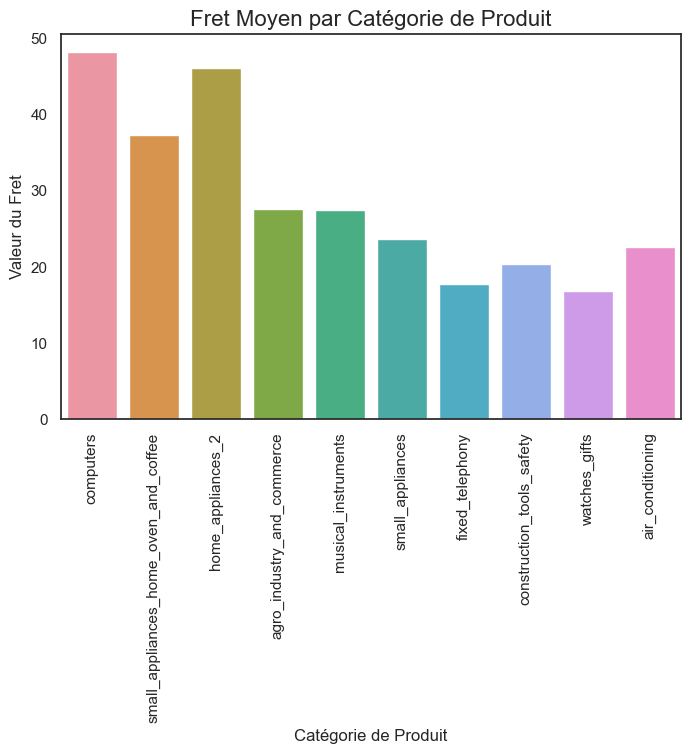

In [631]:
#Plot du fret moyen par catégorie de produit
plt.figure(figsize=(8,5))

#style
sns.set(style='white')
sns.set_palette("PuRd")

#bar chart
sns.barplot(x="product_category", y='freight_value', data=MeanSales_cat)

#Rotation x_axis 
plt.xticks(rotation=90)

#titre
plt.title('Fret Moyen par Catégorie de Produit', fontsize=16)

#label
plt.xlabel('Catégorie de Produit')
plt.ylabel('Valeur du Fret')

Text(0, 0.5, 'Prix')

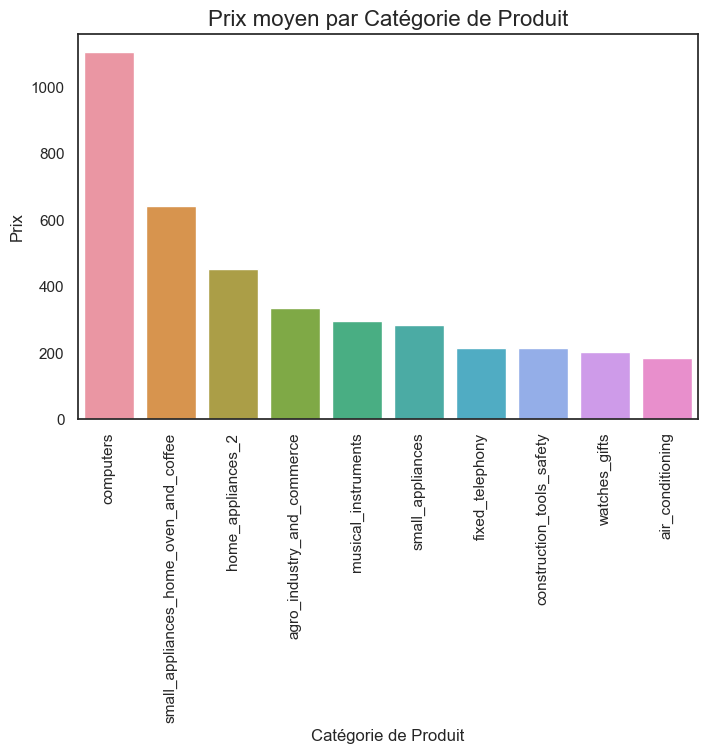

In [632]:
#Plot 
plt.figure(figsize=(8,5))

#style
sns.set(style='white')
sns.set_palette("PuRd")

#bar chart
sns.barplot(x="product_category", y='price', data=MeanSales_cat)

#Rotation x_axis 
plt.xticks(rotation=90)

#titre
plt.title('Prix moyen par Catégorie de Produit', fontsize=16)

#labels
plt.xlabel('Catégorie de Produit')
plt.ylabel('Prix')

La catégorie de produits bed_bath_table a le total des ventes et des commandes les plus élevées, suivie de près par health_beauty et computer_accessories. 

Cependant, des commandes importantes ne garantissent pas automatiquement des ventes élevées, comme on peut le voir dans les catégories de produits meubles_décor et sports_loisirs.

Les prix moyens et la valeur du fret des catégories de produits comme les ordinateurs,small_appliances_home_oven_and_coffee et home_appliances_2 sont assez chers par rapport aux autres catégories. La commande d'articles dans ces catégories semble également tomber en dessous de 300.

In [633]:
#Top 10 meilleurs revues par ctégorie de produit
Toprev_products = data.groupby("product_category").agg({"review_score":"mean", "price":"mean", "order_item_id":"count"})
Toprev_products = Toprev_products.sort_values(ascending=False, by="review_score")[:10].reset_index()
Toprev_products

,product_category,review_score,price,order_item_id
0,fashion_childrens_clothes,5.000000,74.278571,7
1,cds_dvds_musicals,4.642857,52.142857,14
2,books_imported,4.525424,78.489153,59
3,books_general_interest,4.502752,84.959417,549
4,small_appliances_home_oven_and_coffee,4.453333,641.194133,75
5,flowers,4.419355,33.637576,33
6,costruction_tools_tools,4.415842,153.075238,105
7,books_technical,4.396226,70.966466,266
8,food_drink,4.385305,57.773943,279
9,fashion_sport,4.344828,72.224828,29


Text(0, 0.5, 'Review Score moyen')

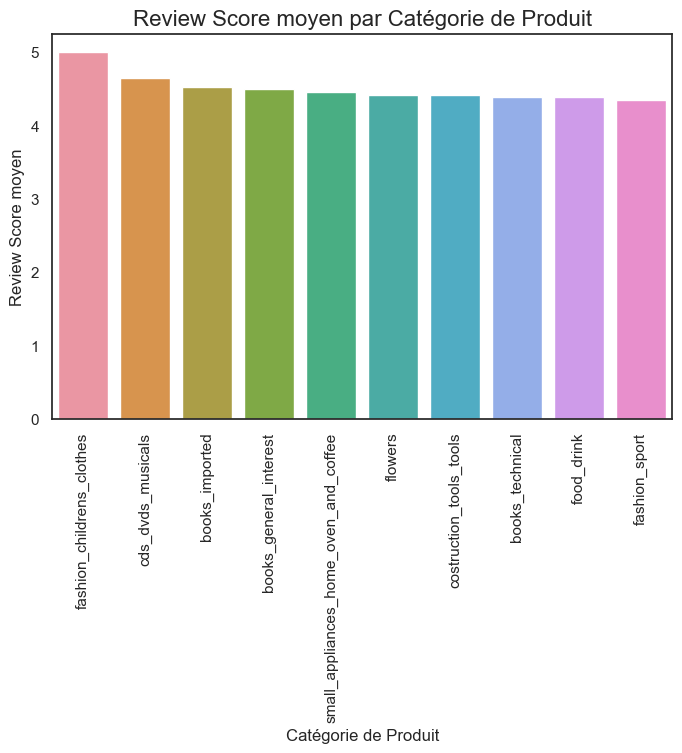

In [634]:
#Plot 
plt.figure(figsize=(8,5))

#style
sns.set(style='white')
sns.set_palette("PuRd")

#bar chart
sns.barplot(x="product_category", y='review_score', data=Toprev_products)

#Rotation x_axis 
plt.xticks(rotation=90)

#titre
plt.title('Review Score moyen par Catégorie de Produit', fontsize=16)

#labels
plt.xlabel('Catégorie de Produit')
plt.ylabel('Review Score moyen')

In [635]:
#Top produits avec le plus petit delivery time
Topdel_products = data.groupby("product_category").agg({"review_score":"mean", "price":"mean", "order_item_id":"count", "delivery_duration":"mean", "delivery_hours":"mean"})
Topdel_products = Topdel_products.sort_values(ascending=True, by="delivery_duration")[:10].reset_index()
Topdel_products

,product_category,review_score,price,order_item_id,delivery_duration,delivery_hours
0,arts_and_craftmanship,4.125000,75.583750,24,3 days 14:03:54.166666666,86.065046
1,books_imported,4.525424,78.489153,59,5 days 14:10:06.372881355,134.168437
2,la_cuisine,4.133333,143.998750,16,6 days 07:31:09.812500,151.519392
3,construction_tools_lights,4.093023,131.019032,310,6 days 09:35:57.574193548,153.599326
4,diapers_and_hygiene,3.378378,40.561892,37,6 days 15:59:04.540540540,159.984595
5,party_supplies,3.911111,105.226444,45,6 days 20:04:38.133333333,164.077259
6,fashion_childrens_clothes,5.000000,74.278571,7,6 days 22:50:01,166.833611
7,small_appliances_home_oven_and_coffee,4.453333,641.194133,75,7 days 02:02:57.200000,170.049222
8,drinks,4.122616,59.525095,367,7 days 03:45:59.204359673,171.766446
9,fashio_female_clothing,3.933333,58.554222,45,7 days 04:14:05.177777777,172.234772


Les catégories de produits avec le Review Score Moyen le plus élevé et le délai de livraison le plus bas semblent avoir de faibles commandes, à l'exception de construction_tools_lights et des boissons.

Ces catégories de produits semblent tourner autour de la mode, de l'art, des livres, des outils et des appareils électroménagers.

La durée de livraison pour les boissons product_category de 7 jours ou 170 heures semble être assez élevée même si elle a un score d'examen plus élevé que les catégories party_supplies et diapers_and_hygiene.

In [636]:
# Revue des top  catégorie de produits par vendeurs et par consommateurs
Top_sellersproduct = data.groupby("product_category").agg({"seller_id":"nunique", "customer_id":"nunique"})
Top_sellersproduct.reset_index().sort_values(by="seller_id", ascending=False)[:20]

,product_category,seller_id,customer_id
43,health_beauty,479,8647
65,sports_leisure,466,7530
49,housewares,452,5743
5,auto,371,3810
39,furniture_decor,352,6307
15,computers_accessories,279,6530
20,cool_stuff,259,3559
69,toys,242,3804
6,baby,240,2809
42,garden_tools,227,3448


In [637]:
# Revue des vendeurs total et des consommateurs spécifiquement pour les boissons
drinks = data.query("product_category == 'drinks'")
drinks.groupby("product_category").agg({"seller_id":"nunique", "customer_id":"nunique"})

,seller_id,customer_id
product_category,,
drinks,36,287


In [638]:
# Lets compare the location/ cities of sellers to buyers of the drinks category
drinks.groupby(["product_category", "seller_state", "customer_state"]).agg({"seller_id":"nunique", "customer_id":"nunique"})

seller_id  customer_id
product_category seller_state customer_state                        
drinks           BA           BA                      1            1
                 DF           SP                      1            1
                 GO           GO                      1            1
                              MG                      1            1
                              SP                      1            2
                 MG           GO                      1            1
                              MG                      2            2
                              RJ                      1            1
                              SP                      2            5
                 PR           MG                      1            1
                              PR                      2            2
                              RJ                      1            2
                              RS                      2            2
                              SC                      1            1
                              SP                      3            6
                 RS           DF                      1            1
                              ES                      1            1
                              MG                      1            1
                              RJ                      1            1
                              SC                      1            1
                              SP                      1            2
                 SC           SP                      2            2
                 SP           AL                      1            1
                              AM                      1            1
                              BA                      3            4
                              CE                      1            2
                              DF                      1            4
                              ES                      2            2
                              GO                      1            2
                              MG                      2           14
                              MS                      1            4
                              MT                      1            1
                              PA                      1            1
                              PI                      1            1
                              PR                      4            8
                              RJ                      8           36
                              RS                      5           11
                              SC                      2           12
                              SP                     15          145

On observe que la marge des vendeurs aux clients pour la catégorie des boissons est assez large.
On observe que la plupart des vendeurs de la catégorie des boissons ont un pourcentage énorme de leurs clients dans d'autres États que le leur. Essayons de calculer la distance entre les vendeurs et les acheteurs dans ce cas.

In [639]:
#Compute the distance between sellers and buyers by merging with the sellers geo and cus_geo datasets
drinks_cat = drinks.merge(cus_geo, on="customer_id")

In [640]:
drinks_cat.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_duration,delivery_hours,seller_state,seller_lat,seller_lon,customer_unique_id_x,customer_state_x,cus_lat_x,cus_lon_x,distance_seller_customer,sale_month,nb_payment_sequential,payment_value,sum_payment_installments,payment_type,is_reviewed,review_score,customer_city_x,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,customer_unique_id_y,customer_zipcode,customer_city_y,customer_state_y,cus_lat_y,cus_lon_y
0,01bae920aea13b891b50bc1543634a65,1,cd48f265a63e13b762601f5f794c5fca,e9779976487b77c6d4ac45f75ec7afe9,57.49,9.94,57a5790d63d19ab68c8eb882a24cff8e,delivered,2017-12-21 20:04:26,2017-12-26 20:09:59,4 days 02:06:39,98.110833,SP,-24.008923,-46.419125,2dc7f51f05ba1b1a92608e45e55d1fe1,SP,-23.639408,-46.714500,50.901531,12,1.0,67.43,1.0,credit_card,True,4.0,sao paulo,48.0,859.0,3.0,175.0,23.0,21.0,21.0,drinks,2dc7f51f05ba1b1a92608e45e55d1fe1,4728,sao paulo,SP,-23.639408,-46.714500
1,025fe62703ce31742dc8bbe8b1a99b56,1,e61b1e021d5ed7e513da1851597760cc,e9779976487b77c6d4ac45f75ec7afe9,45.49,9.94,fc217359526d7fceb4f1b3b7756dcd56,delivered,2017-12-16 12:44:51,2017-12-20 20:43:43,0 days 21:38:56,21.648889,SP,-24.008923,-46.419125,508a6e712f9de578cd0f8314f9e19a79,SP,-23.460297,-46.565827,62.805420,12,1.0,55.43,1.0,boleto,True,5.0,guarulhos,60.0,879.0,2.0,569.0,20.0,16.0,16.0,drinks,508a6e712f9de578cd0f8314f9e19a79,7056,guarulhos,SP,-23.460297,-46.565827
2,030106c028266ae3345eb9bf6dd790c1,1,cd48f265a63e13b762601f5f794c5fca,e9779976487b77c6d4ac45f75ec7afe9,57.49,16.16,7a4d4a91643c3ed808af700c41364e3e,delivered,2017-12-24 17:00:47,2018-01-05 00:58:53,7 days 07:22:02,175.367222,SP,-24.008923,-46.419125,d3fc984c5a92922652079a947bcdd508,RJ,-22.922201,-43.200156,349.848622,12,1.0,73.65,1.0,credit_card,True,5.0,rio de janeiro,48.0,859.0,3.0,175.0,23.0,21.0,21.0,drinks,d3fc984c5a92922652079a947bcdd508,20251,rio de janeiro,RJ,-22.922201,-43.200156
3,0830fb3429c4807bd185a32fe5241b8a,1,17da5d80ea0eeabd565083183027d588,e9779976487b77c6d4ac45f75ec7afe9,51.49,9.94,2e5a6dab193ae7e25a8fffde134d7035,delivered,2017-12-12 20:21:26,2017-12-30 09:37:18,16 days 15:18:19,399.305278,SP,-24.008923,-46.419125,c8f5a894f02efdbc00a61cb31570cbaa,SP,-22.977745,-47.104153,134.265321,12,1.0,61.43,1.0,credit_card,True,3.0,campinas,59.0,879.0,1.0,700.0,20.0,20.0,20.0,drinks,c8f5a894f02efdbc00a61cb31570cbaa,13052,campinas,SP,-22.977745,-47.104153
4,0849024969adbd058756b6d843f3c1c5,1,17da5d80ea0eeabd565083183027d588,e9779976487b77c6d4ac45f75ec7afe9,51.49,16.12,3eacf2c45f37d4d63636fe8505c6a0b5,delivered,2017-12-17 20:04:57,2017-12-22 19:05:05,3 days 21:23:01,93.383611,SP,-24.008923,-46.419125,b74e968d385e7016de503ca976a21a60,MG,-19.802374,-43.967066,531.730433,12,1.0,67.61,1.0,credit_card,True,5.0,belo horizonte,59.0,879.0,1.0,700.0,20.0,20.0,20.0,drinks,b74e968d385e7016de503ca976a21a60,31620,belo horizonte,MG,-19.802374,-43.967066


In [641]:
#check the shape of drinks category
drinks_cat.shape

(367, 42)

In [642]:
#Check for duplicate values
drinks_cat.duplicated().sum()

#Drop duplicates if any
drinks_cat.drop_duplicates(inplace=True)

In [643]:
#Confirm the shape and datatype of drinks_cat
drinks_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       367 non-null    object         
 1   order_item_id                  367 non-null    object         
 2   product_id                     367 non-null    object         
 3   seller_id                      367 non-null    object         
 4   price                          367 non-null    float64        
 5   freight_value                  367 non-null    float64        
 6   customer_id                    367 non-null    object         
 7   order_status                   367 non-null    object         
 8   order_purchase_timestamp       367 non-null    datetime64[ns] 
 9   order_delivered_customer_date  367 non-null    datetime64[ns] 
 10  delivery_duration              367 non-null    timedelta64[ns]
 11  delive

## Feature engineering en fonction du client
Maintenant que nous avons notre dataset étendu, nous allons centrer les données obtenues sur le client et non sur les commandes en créant de nouvelles variables. Comme nous l'avons vu précédement, l'identifiant unique du client est contenu dans la variable customer_unique_id.

Commençons par créer une variable contenant le délai le livraison de chaque commande (et suppression de la variable order_delivered_customer_date) :

In [644]:
data.to_csv("Olistdata.csv",index=False)

In [1]:
import pandas as pd
data=pd.read_csv("Olistdata.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115038 non-null  object 
 1   order_item_id                  115038 non-null  int64  
 2   product_id                     115038 non-null  object 
 3   seller_id                      115038 non-null  object 
 4   price                          115038 non-null  float64
 5   freight_value                  115038 non-null  float64
 6   customer_id                    115038 non-null  object 
 7   order_status                   115038 non-null  object 
 8   order_purchase_timestamp       115038 non-null  object 
 9   order_delivered_customer_date  115038 non-null  object 
 10  delivery_duration              115038 non-null  object 
 11  delivery_hours                 115038 non-null  float64
 12  seller_state                  

In [5]:
# products volume = height*lenght*width
data["product_volume_cm3"] = data["product_length_cm"] \
                               * data["product_height_cm"] \
                               * data["product_width_cm"]

In [6]:
#data.order_delivered_customer_date - data.order_purchase_timestamp

#Convert date timestamp to datetime objects
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])

In [7]:
data["delivery_delta_days"] = (data.order_delivered_customer_date
                               - data.order_purchase_timestamp)\
                              .dt.round('1d').dt.days
data.drop("order_delivered_customer_date", axis=1, inplace=True)

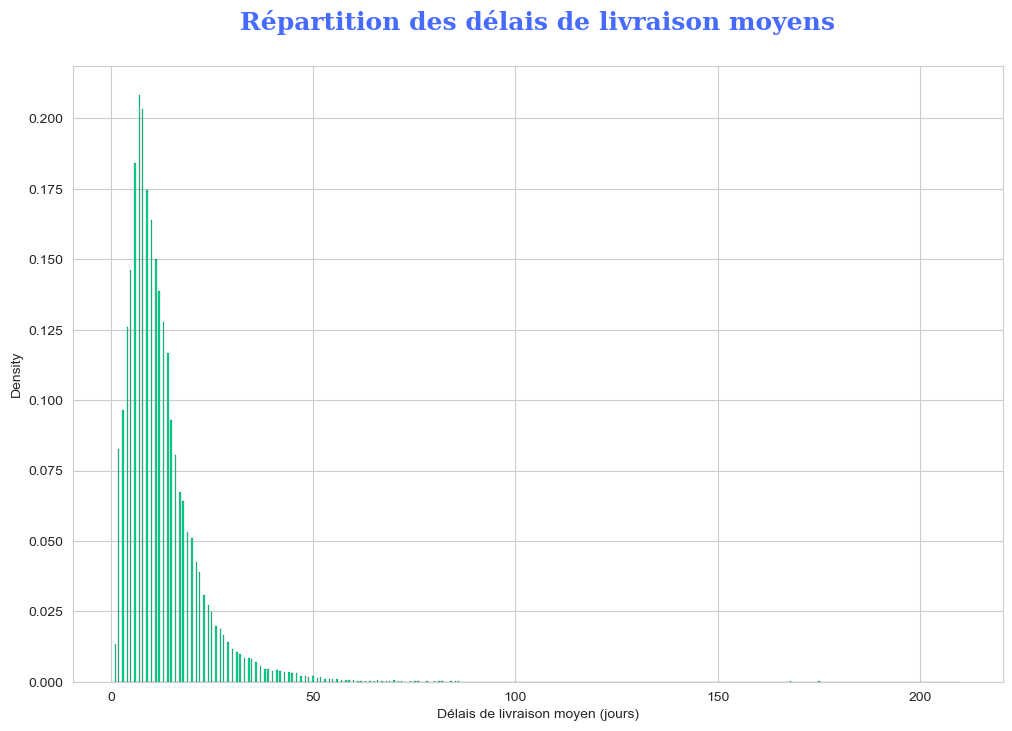

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="delivery_delta_days",
             stat="density",
             edgecolor="black",
             color="#00d994", alpha=1)
plt.xlabel("Délais de livraison moyen (jours)")
plt.title(f"Répartition des délais de livraison moyens\n",
          fontdict=font_title)
plt.show()

Autre variable à créer, la catégorie de produit de niveau 1. En effet, le jeu de données compte plus de 70 catégories différentes (ce qui peut poser problème pour un encodage lors des preprocessing). Nous allons donc devoir regrouper plusieurs de ces catégorie dans une catégorie de niveau supérieur.

Pour cela, nous allons nous baser sur les catégories principales des sites de vente en ligne en 2017, disponibles sur le site http://statista.com :

- Fashion, clothing and accessories
- Health and Beauty
- Toys and baby equipment
- Books, CDs and other physical media
- Groceries, food and drink
- Technology (including phones and computers)
- Home and furniture
- Flowers and gifts
- Other

et nous ajoutons la catégorie sport 

Nous allons devoir les attribuer manuellement :

In [9]:
import numpy as np
data['product_categories'] = np.where((data['product_category'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((data['product_category'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data['product_category'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data['product_category'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((data['product_category'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data['product_category'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((data['product_category'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((data['product_category'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data['product_category'].str.contains("sport")==True),
                                     'sport',
                                    'other')))))))))

In [10]:
# drop product_category_name column
data.drop("product_category", axis=1, inplace=True)

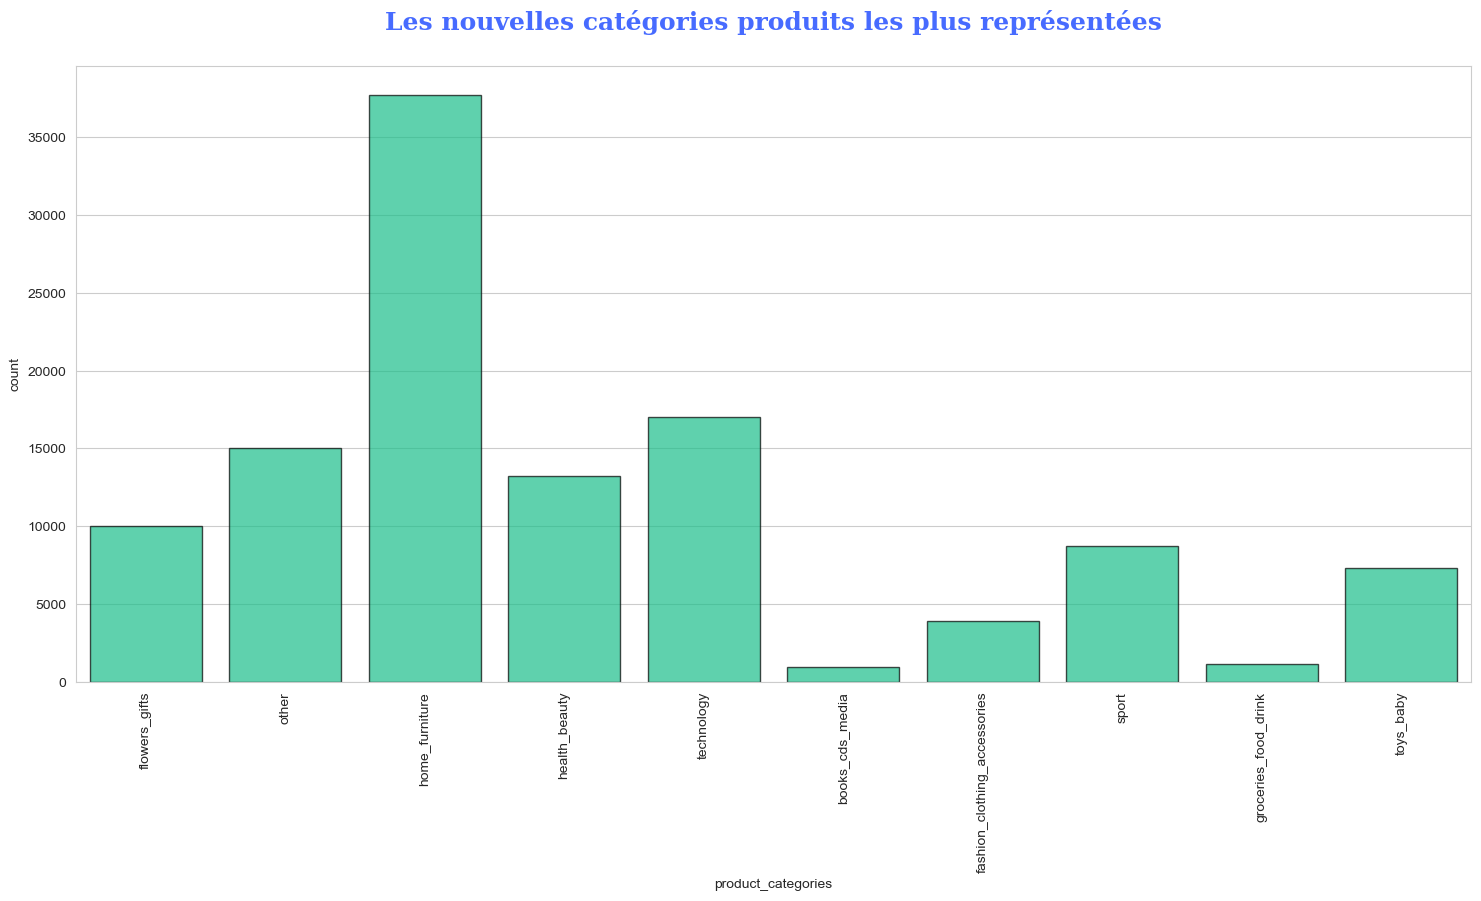

In [11]:
# Plot categories count in dataset
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data, x="product_categories",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data["product_categories"].nunique()),
           data["product_categories"].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories produits les plus représentées\n",
          fontdict=font_title)
plt.show()

##### A présent, nous pouvons regarder la répartition du nombre de commandes moyen par client :

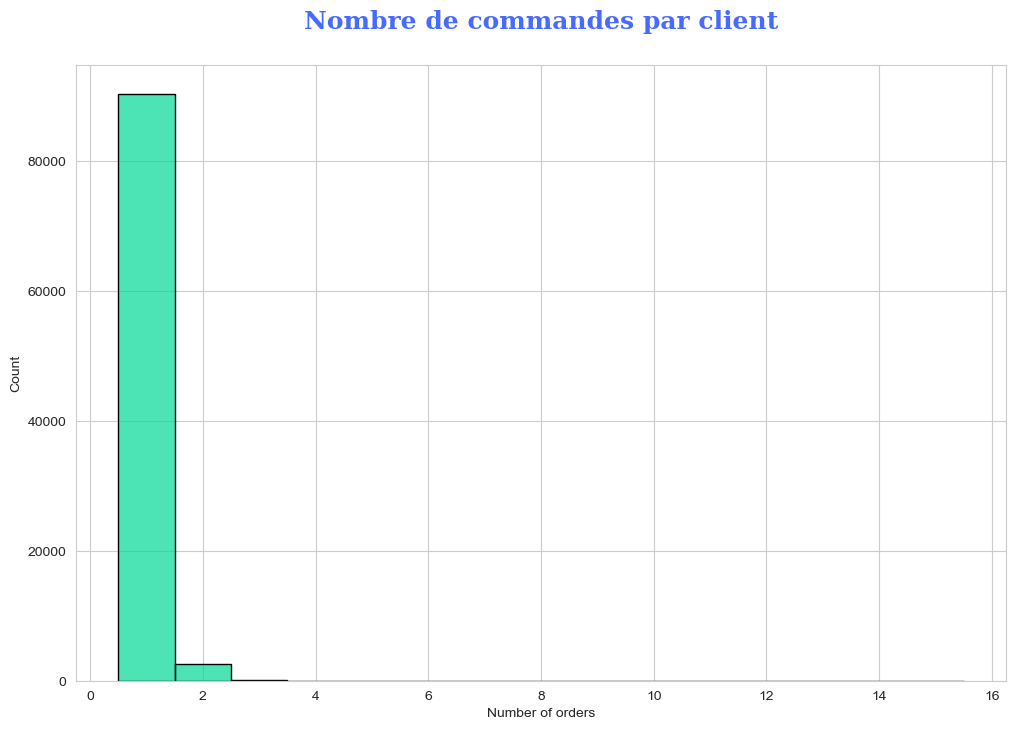

In [12]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id",
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n",
          fontdict=font_title)
plt.show()

La majeure partie des clients n'ont passé qu'une seule commande. Il sera donc compliqué d'établir un classement de leur catégorie produit préférée. Nous allons donc créer une variable par catégorie produit pour y dispatcher le nombre de produits achetés sur les commandes passées. Ensuite, nous calculerons le ratio du nombre de produits par catégorie sur le nombre de produits total acheté par le client.

In [13]:
categories_customers = data.groupby(["customer_unique_id", "product_categories"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

# ratio of total items
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(5)

product_categories,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


A présent, nous allons calculer le nombre de jours écoulés entre la première et la dernière commande. Nous ramènerons ensuite ce délai au nombre de commande du client.

In [37]:
recurencies = data.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})
recurencies.columns = recurencies.columns.droplevel(0)

# Max date in dataset
max_date = data["order_purchase_timestamp"].max()

# Delay from the last order
recurencies["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in recurencies.iterrows()]
recurencies.drop(["min", "max"], axis=1, inplace=True)
recurencies.head(5)

,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288


# Création du dataset clients

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    115038 non-null  object        
 1   order_item_id               115038 non-null  int64         
 2   product_id                  115038 non-null  object        
 3   seller_id                   115038 non-null  object        
 4   price                       115038 non-null  float64       
 5   freight_value               115038 non-null  float64       
 6   customer_id                 115038 non-null  object        
 7   order_status                115038 non-null  object        
 8   order_purchase_timestamp    115038 non-null  datetime64[ns]
 9   delivery_duration           115038 non-null  object        
 10  delivery_hours              115038 non-null  float64       
 11  seller_state                114781 non-

In [16]:
data.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,delivery_duration,...,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,delivery_delta_days,product_categories
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,1 days 05:09:32,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,3528.0,8,flowers_gifts
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,8 days 01:29:24,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,60000.0,16,other
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,6 days 00:42:28,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,14157.0,8,home_furniture
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,4 days 00:04:39,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,2400.0,6,health_beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,13 days 06:56:22,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,42000.0,25,home_furniture


In [17]:
date_dernier_achat = data.groupby('customer_unique_id')[
    'order_purchase_timestamp'].max()
data['dernier_achat'] = data['customer_unique_id'] \
    .map(date_dernier_achat)

In [18]:
data.to_csv("Olistdata-final.csv",index=False)


•	Conserver toutes les commandes, notamment celles des 3 % de clients qui en ont fait plusieurs.

•	Se concentrer dans un premier temps sur quelques features qui ont du sens du point de vue marketing, pour cibler les clients plus ou moins intéressants en termes de vente : RFM (Récence : durée depuis la dernière commande, Fréquence : nombre de commandes, Montant: par exemple montant cumulé des commandes).

•	Idéalement, la création du fichier par client sera développée via un « df.groupby(…).agg(…) ».


In [19]:
# Group by customers with sum or mean
clients = data.groupby("customer_unique_id")\
            .agg({"order_id": "nunique",
                  "price": "sum",
                  "freight_value": "sum",
                  "distance_seller_customer":"mean",
                  "product_weight_g":"mean",
                  "product_volume_cm3":"mean",
                  "nb_payment_sequential": "mean", 
                  "sum_payment_installments": "mean", 
                  "review_score": "mean",
                  "delivery_delta_days": "mean",
                  "sale_month": lambda x:x.value_counts().index[0],
                  'order_purchase_timestamp': lambda x: x.mode()[0],
                 'dernier_achat':lambda x: x.mode()[0]
                 })

data_2=data[["customer_unique_id","seller_state","customer_state","payment_type"]]

#Add states to customers and sellers 
clients = pd.merge(clients, data_2,
                how="left",
                on="customer_unique_id")

# Rename columns
clients = clients.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "product_weight_g":"mean_products_weight",
                            "product_volume_cm3":"mean_product_volume_cm3",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delivery_delta_days": "mean_delivery_days",
                            "sale_month": "favorite_sale_month"
                        
                                 })

# Merge with other calculated features
clients = pd.merge(clients, categories_customers,
                how="left",
                on="customer_unique_id")


clients = pd.merge(clients, recurencies,
                how="left",
                on="customer_unique_id")

clients.head()

,customer_unique_id,nb_orders,total_spend,total_freight,distance_seller_customer,mean_products_weight,mean_product_volume_cm3,mean_payment_sequential,mean_payment_installments,mean_review_score,...,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,110.568636,1500.0,7616.0,1.0,8.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,22.168333,375.0,5148.0,1.0,1.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,516.938836,1500.0,43750.0,1.0,8.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,2481.287188,150.0,1045.0,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,154.507887,6050.0,528.0,1.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,288


Comme énnoncé précédement, nous allons ramener le délais des commandes client en fonction du nombre de commandes pour obtenir le délai moyen entre plusieurs achats :

In [20]:
clients["order_mean_delay"] = clients["order_total_delay"] / clients["nb_orders"]


Il nous reste à présent à calculer quelques dernières variables plus représentatives :

- Le ratio fret / total commande
- le prix moyen par commande

In [21]:
clients["total_spend"] = (clients["total_spend"] + clients["total_freight"])
clients["freight_ratio"] = round(clients["total_freight"] / (clients["total_spend"] + clients["total_freight"]),2)
clients["mean_price_order"] = round(clients["total_spend"] / clients["nb_orders"],2)
clients.drop("total_freight", axis=1, inplace=True)

### Valeurs Manquantes

In [22]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114740 entries, 0 to 114739
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   customer_unique_id            114740 non-null  object        
 1   nb_orders                     114740 non-null  int64         
 2   total_spend                   114740 non-null  float64       
 3   distance_seller_customer      114496 non-null  float64       
 4   mean_products_weight          113254 non-null  float64       
 5   mean_product_volume_cm3       113254 non-null  float64       
 6   mean_payment_sequential       114737 non-null  float64       
 7   mean_payment_installments     114737 non-null  float64       
 8   mean_review_score             113929 non-null  float64       
 9   mean_delivery_days            114740 non-null  float64       
 10  favorite_sale_month           114740 non-null  int64         
 11  order_purchas

Seulement quelques variables contiennent des valeurs nulles. Nous allons donc les compléter par les valeurs les plus fréquentes :

In [23]:
# Find features to fill and fillna with mode
features_to_fill = clients.isnull().sum()
features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)

for f in features_to_fill:
    clients[f] = clients[f].fillna(clients[f].mode()[0])
    print(f, clients[f].mode()[0])

distance_seller_customer 335.5998922680221
mean_products_weight 200.0
mean_product_volume_cm3 8000.0
mean_payment_sequential 1.0
mean_payment_installments 1.0
mean_review_score 5.0
seller_state SP
payment_type credit_card


In [24]:
clients.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_orders,114740.0,1.082360,0.384734,1.00,1.000000,1.000000,1.000000,15.000000
total_spend,114740.0,226.747643,448.285759,10.07,70.750000,126.960000,224.980000,13664.080000
distance_seller_customer,114740.0,596.284924,585.863162,0.00,195.862366,431.399871,787.453927,8677.911622
mean_products_weight,114740.0,2086.875390,3692.805364,0.00,300.000000,700.000000,1813.000000,40425.000000
mean_product_volume_cm3,114740.0,15254.087289,23007.404950,168.00,2964.000000,7168.000000,18355.500000,296208.000000
mean_payment_sequential,114740.0,1.180094,1.139092,1.00,1.000000,1.000000,1.000000,26.000000
mean_payment_installments,114740.0,3.165679,2.944074,0.00,1.000000,2.000000,4.000000,26.000000
mean_review_score,114740.0,4.087403,1.332908,1.00,4.000000,5.000000,5.000000,5.000000
mean_delivery_days,114740.0,12.436552,9.385179,1.00,7.000000,10.000000,15.500000,210.000000
favorite_sale_month,114740.0,6.035428,3.228033,1.00,3.000000,6.000000,8.000000,12.000000


On peut voir également dans cette description qu'une commande est chiffrée à plus de 2 million de dollars. Nous allons vérifier cette commande atypique :

In [25]:
clients.drop_duplicates()

,customer_unique_id,nb_orders,total_spend,distance_seller_customer,mean_products_weight,mean_product_volume_cm3,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,...,home_furniture,other,sport,technology,toys_baby,total_items,order_total_delay,order_mean_delay,freight_ratio,mean_price_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,110.568636,1500.0,7616.0,1.0,8.0,5.0,6.0,...,1.0,0.0,0.0,0.0,0.0,1.0,111,111.0,0.08,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,22.168333,375.0,5148.0,1.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,114,114.0,0.23,27.19
2,0000f46a3911fa3c0805444483337064,1,86.22,516.938836,1500.0,43750.0,1.0,8.0,3.0,26.0,...,0.0,1.0,0.0,0.0,0.0,1.0,537,537.0,0.17,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,2481.287188,150.0,1045.0,1.0,4.0,4.0,20.0,...,0.0,0.0,0.0,1.0,0.0,1.0,321,321.0,0.29,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,154.507887,6050.0,528.0,1.0,6.0,5.0,13.0,...,0.0,0.0,0.0,1.0,0.0,1.0,288,288.0,0.08,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114734,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,1996.470471,30000.0,251625.0,1.0,10.0,5.0,28.0,...,0.0,0.0,0.0,0.0,0.0,2.0,447,447.0,0.19,2067.42
114736,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1527.201720,1720.0,32076.0,1.0,1.0,4.0,30.0,...,0.0,0.0,0.0,0.0,1.0,1.0,262,262.0,0.19,84.58
114737,ffff371b4d645b6ecea244b27531430a,1,112.46,1526.116170,600.0,3315.0,1.0,1.0,5.0,15.0,...,0.0,1.0,0.0,0.0,0.0,1.0,568,568.0,0.17,112.46
114738,ffff5962728ec6157033ef9805bacc48,1,133.69,637.858806,444.0,4480.0,1.0,5.0,5.0,12.0,...,0.0,0.0,0.0,0.0,0.0,1.0,119,119.0,0.12,133.69




Regardons la dispersion des montants moyen de commandes en fonction du nombre d'articles pour tenter de repérer d'autres anomalies :

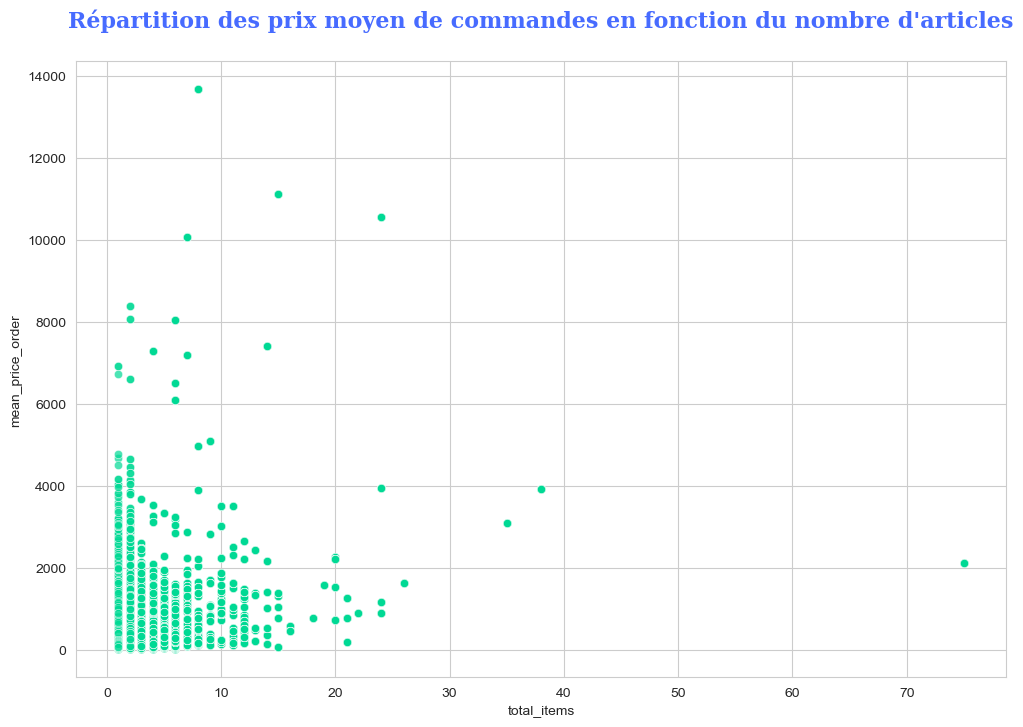

In [26]:
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(data=clients, y="mean_price_order", x="total_items",
                color="#00d994", alpha=0.7)
plt.title(f"Répartition des prix moyen de commandes en fonction du nombre d'articles\n",
          fontdict=font_title, fontsize=16)
plt.show()

In [27]:
clients["customer_state"].unique()

array(['SP', 'SC', 'PA', 'PR', 'RJ', 'MA', 'ES', 'RS', 'MG', 'GO', 'DF',
       'BA', 'MT', 'SE', 'TO', 'PE', 'CE', 'AL', 'AC', 'PI', 'PB', 'RN',
       'AM', 'MS', 'AP', 'RO', 'RR'], dtype=object)

Les codes états ne sont pas très parlant. Nous allons donc utiliser Wikipedia pour modifier les codes états par leur nom :

In [28]:
wiki_url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
states_table = pd.read_html(wiki_url)[3].set_index("Code")
states_table.head(6)

,Flag and name,Capital,Largest city,Area(km2)[20],Population(February 2023)[21],"Density (perkm2, 2022)","GDP (R$millions, 2022)[22]",HDI(2022)[23]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,164123,916000,6.34,21000,0.719
AL,Alagoas,Maceió,Maceió,27779,3383000,125.52,73000,0.683
AP,Amapá,Macapá,Macapá,142829,873000,2.63,9000,0.740
AM,Amazonas,Manaus,Manaus,1559159,4226000,2.58,103000,0.733
BA,Bahia,Salvador,Salvador,564733,15063000,30.52,257000,0.714
CE,Ceará,Fortaleza,Fortaleza,148921,8934000,60.33,157000,0.735


In [29]:
clients = pd.merge(clients.reset_index(), states_table[["Flag and name"]],
                how="left",
                left_on="customer_state",
                right_on="Code")

clients.drop("customer_state", axis=1, inplace=True)

clients = clients.rename(columns={"Flag and name": "customer_state"})

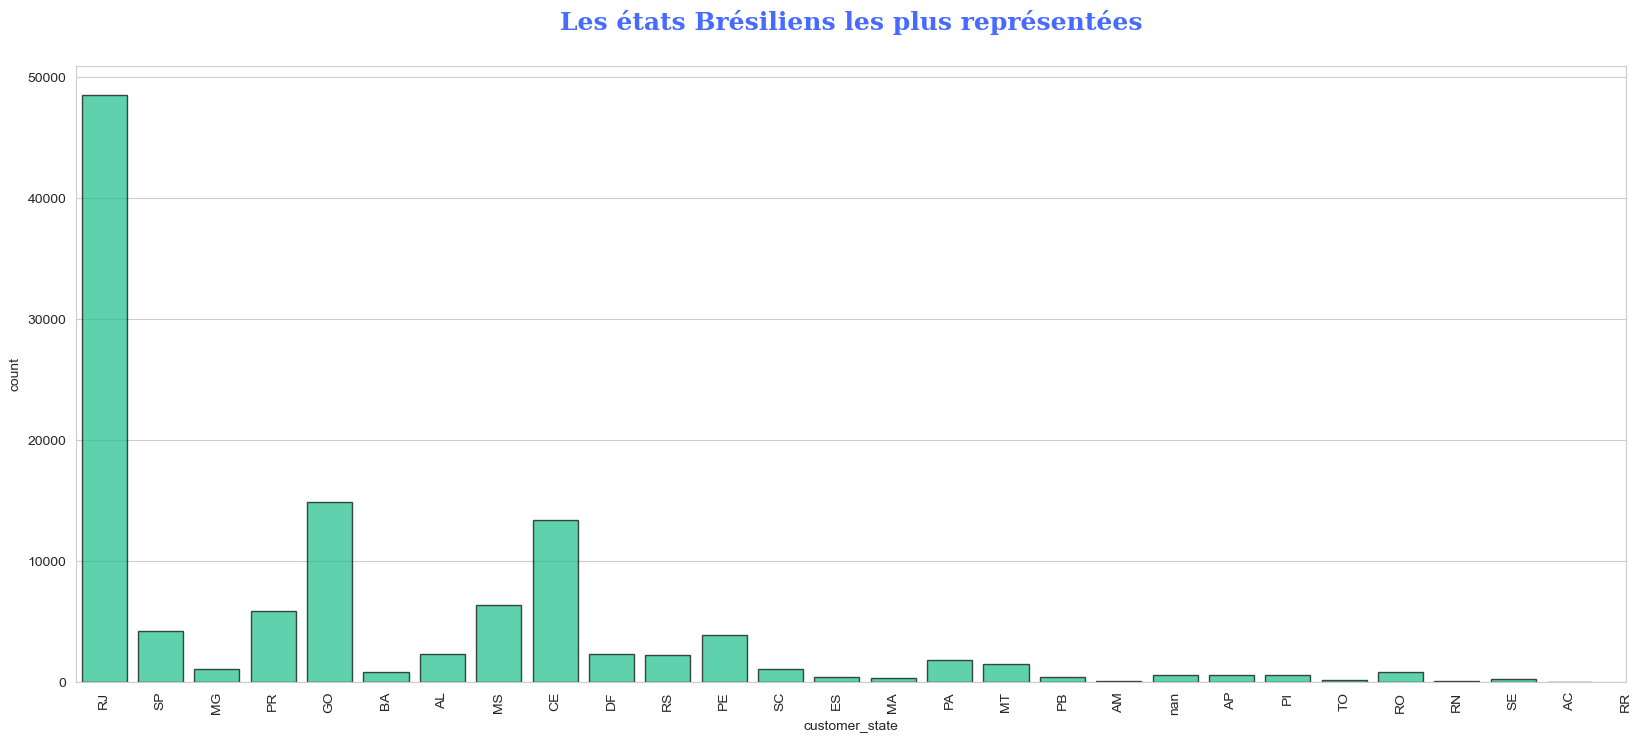

In [30]:
# Countplot of states repartition
fig = plt.figure(figsize=(20, 8))
sns.countplot(data=clients, x="customer_state",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, data["customer_state"].nunique()+1),
           data["customer_state"].unique(),
           rotation=90)
plt.title(f"Les états Brésiliens les plus représentées\n",
          fontdict=font_title)
plt.show()

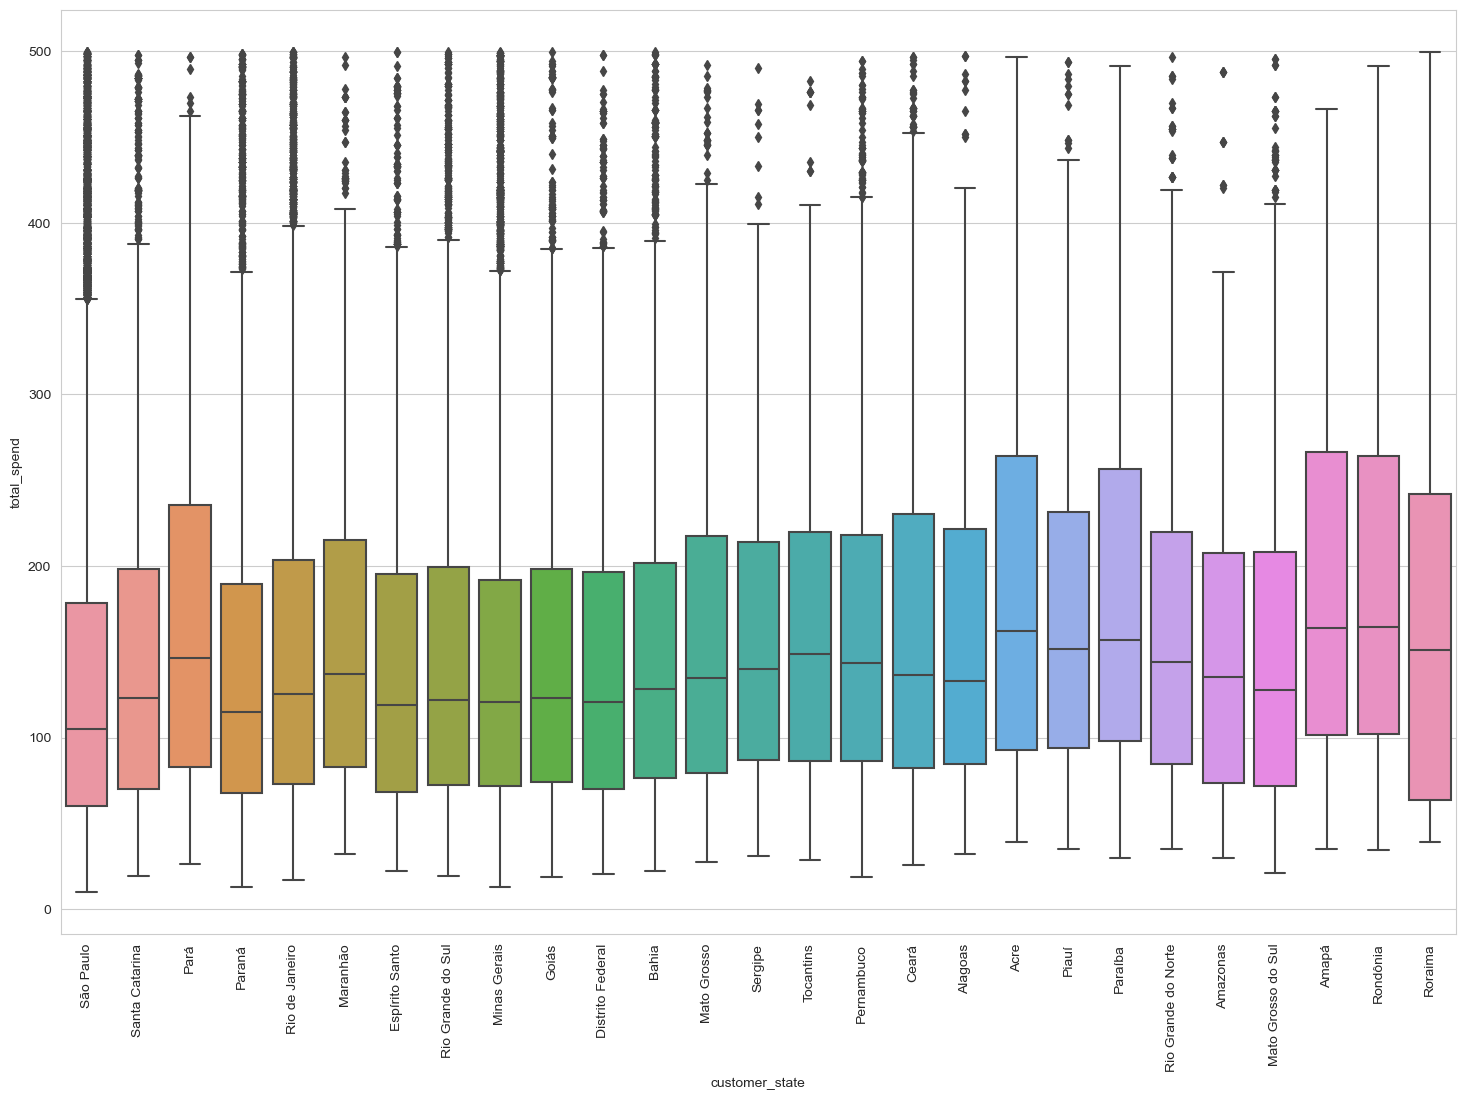

In [31]:
# Boxplots of total spend by state
fig = plt.figure(figsize=(18,12))
sns.boxplot(x="customer_state", y="total_spend", 
            data=clients[clients["total_spend"]<500])
plt.xticks(rotation=90)
plt.show()

On voit dans ces boxplots que l'état du client a un impact sur les variances et médianes des dépenses sur le site.

## Corrélations

Nous allons à présent regarder s'il existe des corrélations linéaires fortes dans le jeu de données:

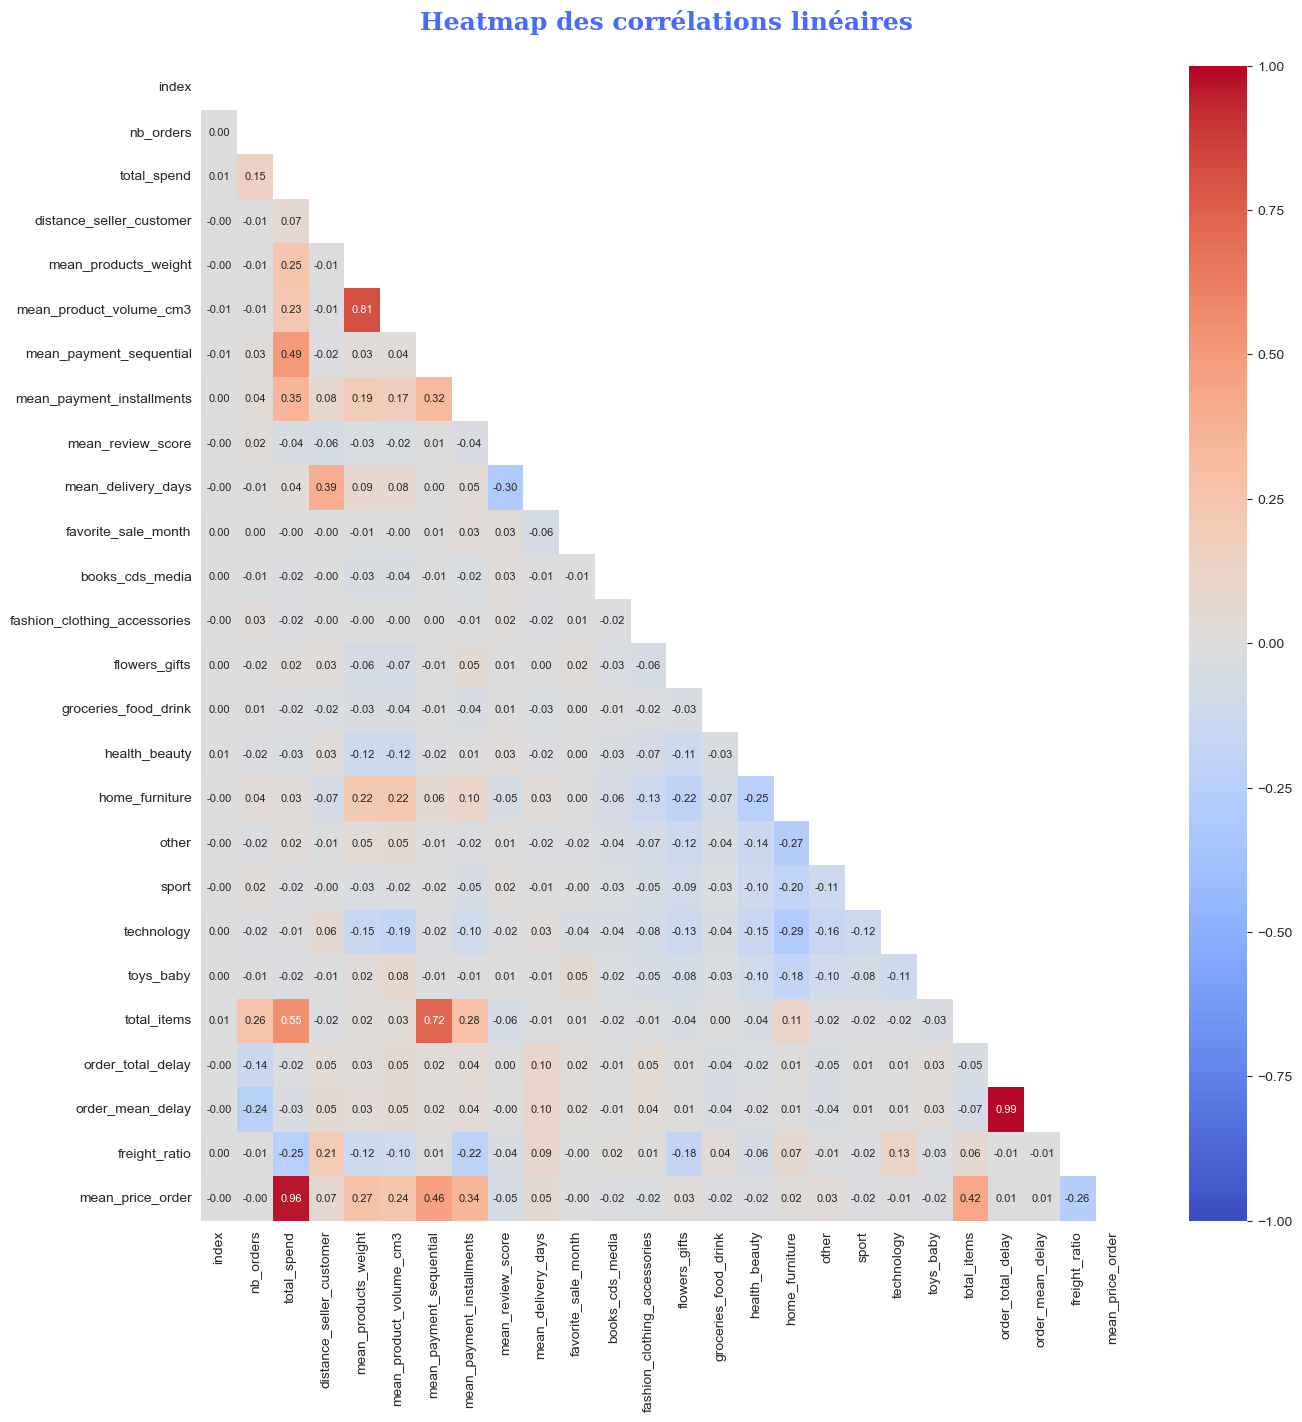

In [32]:
corr = clients.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

On remarque que le prix total est très fortement corrélé au prix moyen par commande (idem pour le nombre d'articles moyen et le nombre d'articles total). Cela est dû au fait que la majorité des clients n'ont commandé qu'une seule fois. On va conserver que l'un des paramètres, ici, order_mean_delay et mean_price order seront les plus représentatifs. 

On remarque également que le volume du produit est corrélé avec la masse du produit en général ce qui est logique pour la plupart des produits. On conservera uniquement le volume : mean_product_volume_cm3. 

In [33]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114740 entries, 0 to 114739
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   index                         114740 non-null  int64         
 1   customer_unique_id            114740 non-null  object        
 2   nb_orders                     114740 non-null  int64         
 3   total_spend                   114740 non-null  float64       
 4   distance_seller_customer      114740 non-null  float64       
 5   mean_products_weight          114740 non-null  float64       
 6   mean_product_volume_cm3       114740 non-null  float64       
 7   mean_payment_sequential       114740 non-null  float64       
 8   mean_payment_installments     114740 non-null  float64       
 9   mean_review_score             114740 non-null  float64       
 10  mean_delivery_days            114740 non-null  float64       
 11  favorite_sale

In [34]:
clients.to_csv("olist-customers-segmentation_version_1.csv")

## Export du dataset final pour classification non-supervisée
A partir de toutes ces features, nous allons modéliser les données pour une classification non-supervisée avec plusieurs modèles. Ces étapes seront réalisées dans un Notebook séparé : Segmentation des clients d'un site e-commerce. 

 Paramètres interessants à conserver pour RFM plus éléboré : 
 - customer_unique_id 
 
 *Sur les commandes et le moyen de paiement*
- 'nb_orders'(Fréquence),
- 'mean_price_order' (Montant),
- 'mean_payment_installments' (nombre d'échéances),
- 'order_mean_delay' (Récence),

*Sur les produits vendus*
- 'mean_product_volume_cm3'(Volume moyen des produits),
- 'mean_review_score'(Note moyenne),
- 'total_items'(Nomre total d'items),

*Sur les catégories de produits (voir les différentes catégories)*

*Sur la livraison*
- 'mean_delivery_days' (Délai de livraison moyenne),
- 'customer_state' (état du client),
- 'order_freight_ratio' (ratio du coùt du fret par rapport au coùt total),

*Autres paramètres*
- 'favorite_sale_month' (mois préféré),
- 'distance_seller_customer'(distance vendeur-acheteur)



In [35]:
clients_bis=clients.copy()
clients_bis=clients_bis.drop(columns=['total_spend', 'mean_products_weight','mean_payment_sequential','seller_state','order_total_delay'])

In [36]:
clients_bis.to_csv("olist-customers-segmentation.csv")